# Decision program using machine learning methods
## PostgreSQL, basic features

In [1]:
!pip install scikit-learn
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install torch
!pip install tqdm
!pip install dhg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.4 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 13.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
import dhg
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
import pickle


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.p

#### Distribution of the runtimes in orders of magnitude

For the original queries:

In [3]:
df = pd.read_csv('results/POS_Scala_comparison_TO_augment_server.csv')

df.loc[df['orig mean'] == 'TO', 'orig mean'] = 101
column = df['orig mean'].astype("float64")

count_0_01_orig = 0
count_0_1_orig = 0
count_1_orig = 0
count_10_orig = 0
count_100_orig = 0
count_TO_orig = 0

for value in column:
    if value <= 0.01:
        count_0_01_orig += 1
    elif value > 0.01 and value <= 0.1:
        count_0_1_orig += 1
    elif value > 0.1 and value <= 1:
        count_1_orig += 1
    elif value > 1 and value <= 10:
        count_10_orig += 1
    elif value > 10 and value <= 100:
        count_100_orig += 1
    else:
        count_TO_orig += 1
    

print("Number of instances with original runtime <= 0.01:", count_0_01_orig)
print("Number of instances with original runtime (0.01, 0.1]:", count_0_1_orig)
print("Number of instances with original runtime (0.1, 1]:", count_1_orig)
print("Number of instances with original runtime (1,10]:", count_10_orig)
print("Number of instances with original runtime (10,100]:", count_100_orig)
print("Number of instances with original runtime TO:", count_TO_orig)

Number of instances with original runtime <= 0.01: 115
Number of instances with original runtime (0.01, 0.1]: 797
Number of instances with original runtime (0.1, 1]: 1053
Number of instances with original runtime (1,10]: 434
Number of instances with original runtime (10,100]: 244
Number of instances with original runtime TO: 293


for the rewritten queries:

In [4]:
df.loc[df['rewr mean'] == 'TO', 'rewr mean'] = 101
column = df['rewr mean'].astype("float64")

count_0_01_rewr = 0
count_0_1_rewr = 0
count_1_rewr = 0
count_10_rewr = 0
count_100_rewr = 0
count_TO_rewr = 0

for value in column:
    if value <= 0.01:
        count_0_01_rewr += 1
    elif value > 0.01 and value <= 0.1:
        count_0_1_rewr += 1
    elif value > 0.1 and value <= 1:
        count_1_rewr += 1
    elif value > 1 and value <= 10:
        count_10_rewr += 1
    elif value > 10 and value <= 100:
        count_100_rewr += 1
    else:
        count_TO_rewr += 1
    

print("Number of instances with original runtime <= 0.01:", count_0_01_rewr)
print("Number of instances with original runtime (0.01, 0.1]:", count_0_1_rewr)
print("Number of instances with original runtime (0.1, 1]:", count_1_rewr)
print("Number of instances with original runtime (1,10]:", count_10_rewr)
print("Number of instances with original runtime (10,100]:", count_100_rewr)
print("Number of instances with original runtime TO:", count_TO_rewr)

Number of instances with original runtime <= 0.01: 1
Number of instances with original runtime (0.01, 0.1]: 522
Number of instances with original runtime (0.1, 1]: 1937
Number of instances with original runtime (1,10]: 227
Number of instances with original runtime (10,100]: 208
Number of instances with original runtime TO: 41


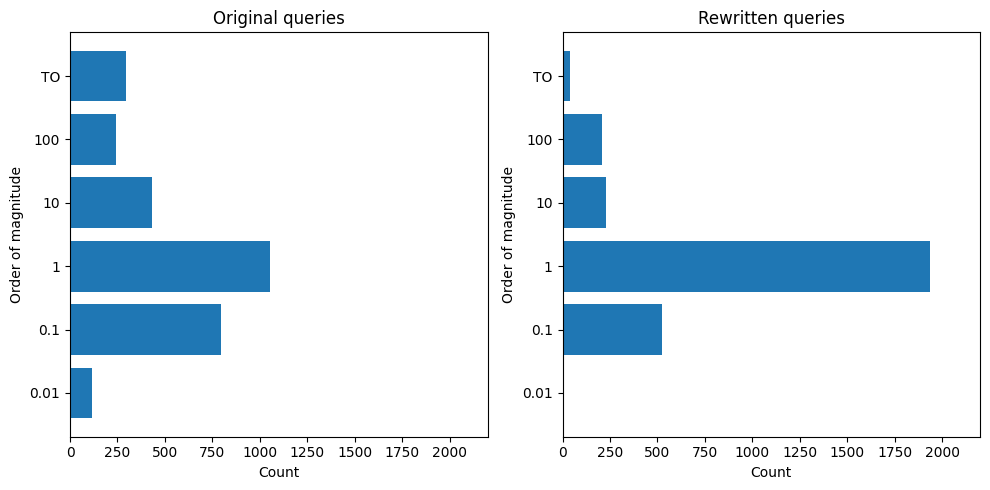

In [5]:
numbers_orig = [count_0_01_orig, count_0_1_orig, count_1_orig, count_10_orig, count_100_orig, count_TO_orig]
numbers_rewr = [count_0_01_rewr, count_0_1_rewr, count_1_rewr, count_10_rewr, count_100_rewr, count_TO_rewr]

# Indices for each number
indices = ["0.01", "0.1", "1", "10", "100", "TO"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original numbers
axs[0].barh(indices, numbers_orig)
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Order of magnitude')
axs[0].set_title('Original queries')
axs[0].set_xlim(0, 2200)

# Plot rewritten numbers
axs[1].barh(indices, numbers_rewr)
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Order of magnitude')
axs[1].set_title('Rewritten queries')
axs[1].set_xlim(0, 2200)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Import the data

In [6]:
file_path = 'results/features_times_POS.csv'
df = pd.read_csv(file_path)
df.head()

bench                query orig/rewr(mean) orig/rewr+rewr(mean)  orig mean  \
0  STATS              001-014            orig                 orig   0.030513   
1  STATS        001-014-augA1            orig                 orig   0.030952   
2  STATS        001-014-augA2            orig                 orig   0.030812   
3  STATS        001-014-augF1            orig                 orig   0.029663   
4  STATS  001-014-augF1-augA1            orig                 orig   0.030595   

   rewr mean  rewr mean+rewr  diff rewr-orig  diff rewr+rewr-orig  #relations  \
0   0.063829        1.989236        0.033316             1.958724           3   
1   0.043271        1.840104        0.012320             1.809152           3   
2   0.168679        1.987010        0.137867             1.956198           3   
3   0.156431        1.988726        0.126768             1.959062           3   
4   0.043383        1.898386        0.012788             1.867790           3   

   ...  max(branching factors)  mean(branching factors)  \
0  ...                       2                      2.0   
1  ...                       1                      1.0   
2  ...                       1                      1.0   
3  ...                       2                      2.0   
4  ...                       1                      1.0   

   median(branching factors)  q25(branching factors)  q75(branching factors)  \
0                        2.0                     2.0                     2.0   
1                        1.0                     1.0                     1.0   
2                        1.0                     1.0                     1.0   
3                        2.0                     2.0                     2.0   
4                        1.0                     1.0                     1.0   

   balancedness factor                          container counts list  \
0                  1.0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
1                  NaN  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
2                  NaN  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
3                  1.0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
4                  NaN  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   

   branching factors list                                         hypergraph  \
0                     [2]  b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...   
1                  [1, 1]  b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...   
2                  [1, 1]  b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...   
3                     [2]  b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...   
4                  [1, 1]  b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...   

                                                text  
0  SELECT MIN(u.Id) FROM comments as c, votes as ...  
1  SELECT MIN(c.id) FROM comments as c, votes as ...  
2  SELECT MIN(v.id) FROM comments as c, votes as ...  
3  SELECT MIN(u.Id) FROM comments as c, votes as ...  
4  SELECT MIN(c.id) FROM comments as c, votes as ...  

[5 rows x 31 columns]

In [7]:
df.dtypes

bench                         object
query                         object
orig/rewr(mean)               object
orig/rewr+rewr(mean)          object
orig mean                    float64
rewr mean                    float64
rewr mean+rewr               float64
diff rewr-orig               float64
diff rewr+rewr-orig          float64
#relations                     int64
#conditions                    int64
#filters                       int64
#joins                         int64
depth                          int64
min(container counts)          int64
max(container counts)          int64
mean(container counts)       float64
q25(container counts)        float64
median(container counts)     float64
q75(container counts)        float64
min(branching factors)         int64
max(branching factors)         int64
mean(branching factors)      float64
median(branching factors)    float64
q25(branching factors)       float64
q75(branching factors)       float64
balancedness factor          float64
c

Transform the hypergraph, which is saved as pickle object, back to a dhg hypergraph object.

In [8]:
df["hypergraph"] = df["hypergraph"].apply(lambda x: pickle.loads(eval(x)))

#### Delete those examples, where both methods gave a timeout

In [9]:
df[df["orig/rewr(mean)"] == "-"]

bench              query orig/rewr(mean) orig/rewr+rewr(mean)  orig mean  \
2071  SNAP        wiki-path05               -                    -      100.0   
2072  SNAP  wiki-path05-augA1               -                    -      100.0   
2073  SNAP  wiki-path05-augA2               -                    -      100.0   
2074  SNAP  wiki-path05-augA3               -                    -      100.0   
2075  SNAP  wiki-path05-augA4               -                    -      100.0   
2076  SNAP  wiki-path05-augA5               -                    -      100.0   
2077  SNAP        wiki-path06               -                    -      100.0   
2078  SNAP  wiki-path06-augA1               -                    -      100.0   
2079  SNAP  wiki-path06-augA2               -                    -      100.0   
2080  SNAP  wiki-path06-augA3               -                    -      100.0   
2081  SNAP  wiki-path06-augA4               -                    -      100.0   
2082  SNAP  wiki-path06-augA5               -                    -      100.0   
2083  SNAP  wiki-path06-augA6               -                    -      100.0   
2084  SNAP        wiki-path07               -                    -      100.0   
2085  SNAP  wiki-path07-augA1               -                    -      100.0   
2086  SNAP  wiki-path07-augA2               -                    -      100.0   
2087  SNAP  wiki-path07-augA3               -                    -      100.0   
2088  SNAP  wiki-path07-augA4               -                    -      100.0   
2089  SNAP  wiki-path07-augA5               -                    -      100.0   
2090  SNAP  wiki-path07-augA6               -                    -      100.0   
2091  SNAP  wiki-path07-augA7               -                    -      100.0   
2092  SNAP        wiki-path08               -                    -      100.0   
2093  SNAP  wiki-path08-augA1               -                    -      100.0   
2094  SNAP  wiki-path08-augA2               -                    -      100.0   
2095  SNAP  wiki-path08-augA3               -                    -      100.0   
2096  SNAP  wiki-path08-augA4               -                    -      100.0   
2097  SNAP  wiki-path08-augA5               -                    -      100.0   
2098  SNAP  wiki-path08-augA6               -                    -      100.0   
2099  SNAP  wiki-path08-augA7               -                    -      100.0   
2100  SNAP  wiki-path08-augA8               -                    -      100.0   
2112  SNAP        wiki-tree03               -                    -      100.0   
2113  SNAP  wiki-tree03-augA1               -                    -      100.0   
2114  SNAP  wiki-tree03-augA2               -                    -      100.0   
2115  SNAP  wiki-tree03-augA3               -                    -      100.0   
2116  SNAP  wiki-tree03-augA4               -                    -      100.0   
2117  SNAP  wiki-tree03-augA5               -                    -      100.0   
2118  SNAP  wiki-tree03-augA6               -                    -      100.0   
2119  SNAP  wiki-tree03-augA7               -                    -      100.0   

      rewr mean  rewr mean+rewr  diff rewr-orig  diff rewr+rewr-orig  \
2071      100.0           100.0             0.0                  0.0   
2072      100.0           100.0             0.0                  0.0   
2073      100.0           100.0             0.0                  0.0   
2074      100.0           100.0             0.0                  0.0   
2075      100.0           100.0             0.0                  0.0   
2076      100.0           100.0             0.0                  0.0   
2077      100.0           100.0             0.0                  0.0   
2078      100.0           100.0             0.0                  0.0   
2079      100.0           100.0             0.0                  0.0   
2080      100.0           100.0             0.0                  0.0   
2081      100.0           100.0             0.0      

For the SNAP dataset the wiki-path06, wiki-path07, wiki-path08 and wiki-tree03 (for all augmentation cases) did not finish the evaluation within our timeout (100 sec). Therefore, we cannot conclude which variante is the better one and we delete those 32 samples.

In [10]:
df = df[df["orig/rewr(mean)"] != "-"]
df.shape

(2898, 31)

#### Get the feature matrix

Get the features matrix X and the response variables y1 and y1, where once the rewritting time and the evaluation time are taken into consideration and once only the evaluation time. Additionally the response variables have to have numbers in it and we assign 1 = rewr and 0 = orig.

In [11]:
X = df.iloc[:, 9:26]
X.head()

#relations  #conditions  #filters  #joins  depth  min(container counts)  \
0           3            7         5       2      1                      1   
1           3            7         5       2      2                      1   
2           3            7         5       2      2                      1   
3           3            7         5       2      1                      1   
4           3            7         5       2      2                      1   

   max(container counts)  mean(container counts)  q25(container counts)  \
0                      3                1.133333                    1.0   
1                      3                1.133333                    1.0   
2                      3                1.133333                    1.0   
3                      3                1.133333                    1.0   
4                      3                1.133333                    1.0   

   median(container counts)  q75(container counts)  min(branching factors)  \
0                       1.0                    1.0                       2   
1                       1.0                    1.0                       1   
2                       1.0                    1.0                       1   
3                       1.0                    1.0                       2   
4                       1.0                    1.0                       1   

   max(branching factors)  mean(branching factors)  median(branching factors)  \
0                       2                      2.0                        2.0   
1                       1                      1.0                        1.0   
2                       1                      1.0                        1.0   
3                       2                      2.0                        2.0   
4                       1                      1.0                        1.0   

   q25(branching factors)  q75(branching factors)  
0                     2.0                     2.0  
1                     1.0                     1.0  
2                     1.0                     1.0  
3                     2.0                     2.0  
4                     1.0                     1.0

Get the feature matrix, which additionally includes the hypergraph information/representation.

In [12]:
X_hg = pd.concat([X, df.iloc[:,29]], axis = 1)
X_hg.head()

#relations  #conditions  #filters  #joins  depth  min(container counts)  \
0           3            7         5       2      1                      1   
1           3            7         5       2      2                      1   
2           3            7         5       2      2                      1   
3           3            7         5       2      1                      1   
4           3            7         5       2      2                      1   

   max(container counts)  mean(container counts)  q25(container counts)  \
0                      3                1.133333                    1.0   
1                      3                1.133333                    1.0   
2                      3                1.133333                    1.0   
3                      3                1.133333                    1.0   
4                      3                1.133333                    1.0   

   median(container counts)  q75(container counts)  min(branching factors)  \
0                       1.0                    1.0                       2   
1                       1.0                    1.0                       1   
2                       1.0                    1.0                       1   
3                       1.0                    1.0                       2   
4                       1.0                    1.0                       1   

   max(branching factors)  mean(branching factors)  median(branching factors)  \
0                       2                      2.0                        2.0   
1                       1                      1.0                        1.0   
2                       1                      1.0                        1.0   
3                       2                      2.0                        2.0   
4                       1                      1.0                        1.0   

   q25(branching factors)  q75(branching factors)  \
0                     2.0                     2.0   
1                     1.0                     1.0   
2                     1.0                     1.0   
3                     2.0                     2.0   
4                     1.0                     1.0   

                      hypergraph  
0  Hypergraph(num_v=17, num_e=3)  
1  Hypergraph(num_v=17, num_e=3)  
2  Hypergraph(num_v=17, num_e=3)  
3  Hypergraph(num_v=17, num_e=3)  
4  Hypergraph(num_v=17, num_e=3)

#### Log-transformations

This basic features do not need log transformations.

In [13]:
min_values = X.min()
max_values = X.max()
diff = max_values-min_values

pd.DataFrame({'Min': min_values, 'Max': max_values, 'Diff': diff})

Min   Max       Diff
#relations                 2.000000  11.0   9.000000
#conditions                2.000000  20.0  18.000000
#filters                   0.000000  16.0  16.000000
#joins                     1.000000  12.0  11.000000
depth                      1.000000   7.0   6.000000
min(container counts)      1.000000   1.0   0.000000
max(container counts)      2.000000   5.0   3.000000
mean(container counts)     1.047619   1.6   0.552381
q25(container counts)      1.000000   1.0   0.000000
median(container counts)   1.000000   1.0   0.000000
q75(container counts)      1.000000   1.5   0.500000
min(branching factors)     1.000000   6.0   5.000000
max(branching factors)     1.000000   6.0   5.000000
mean(branching factors)    1.000000   6.0   5.000000
median(branching factors)  1.000000   6.0   5.000000
q25(branching factors)     1.000000   6.0   5.000000
q75(branching factors)     1.000000   6.0   5.000000

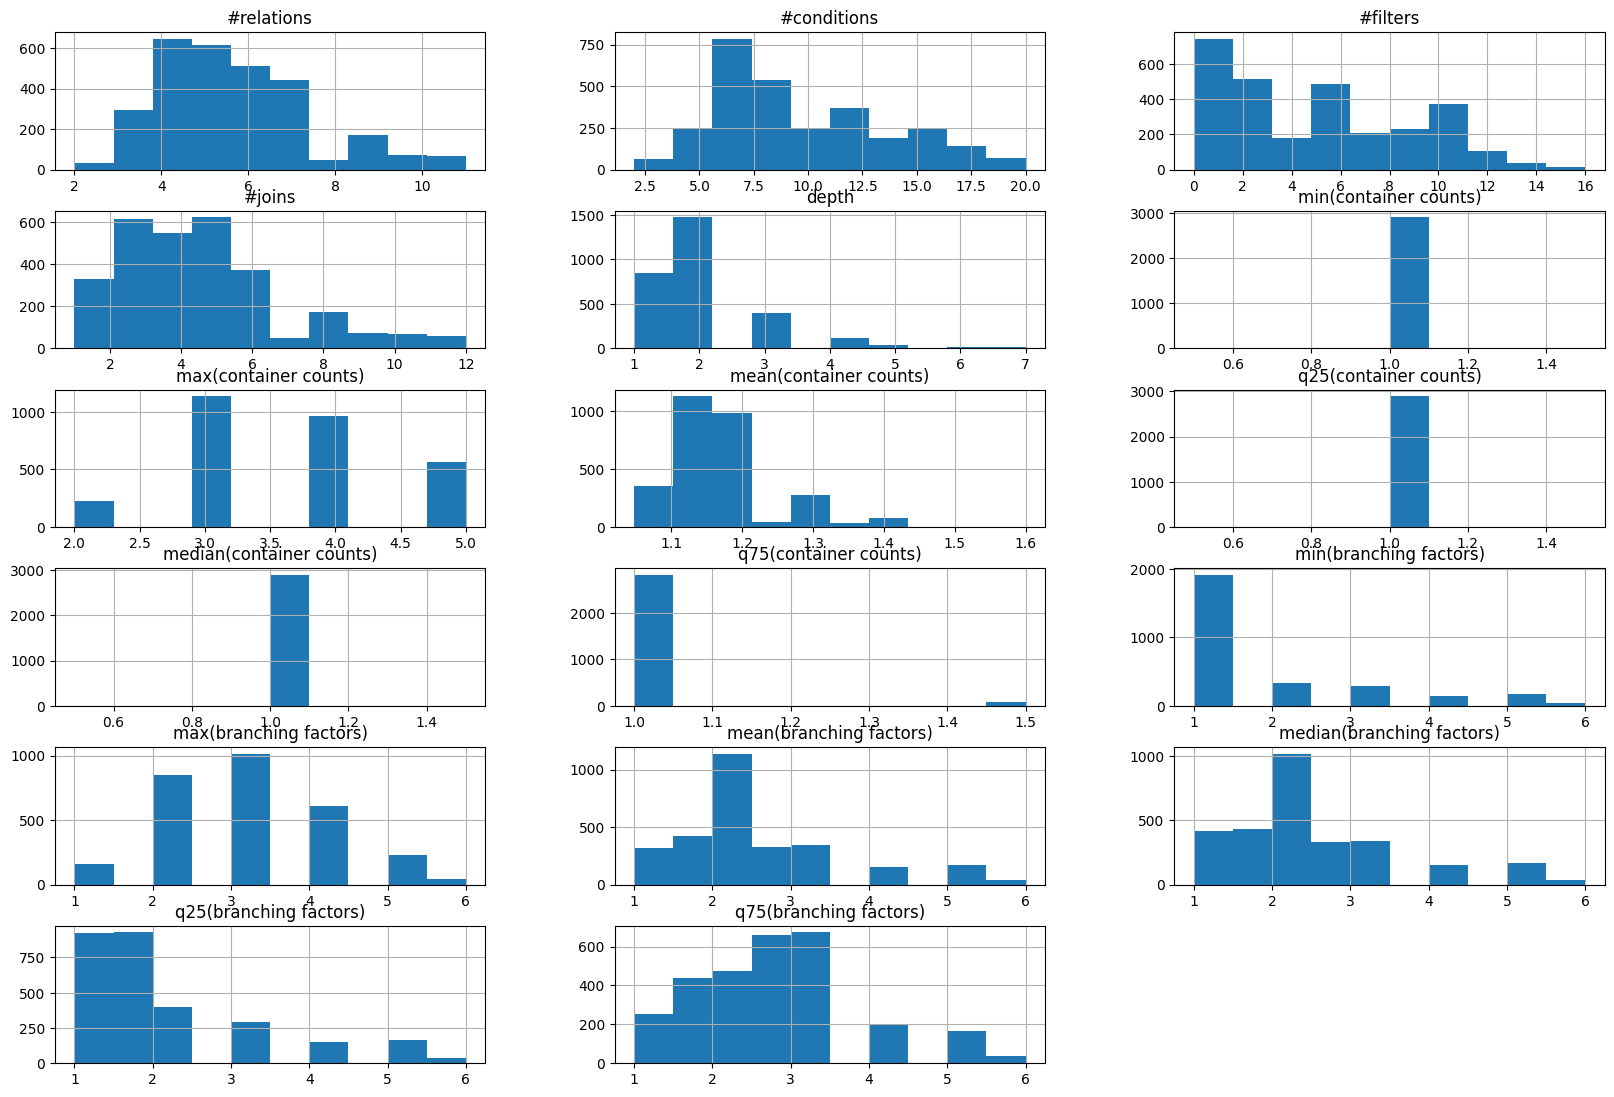

In [14]:
X.hist(layout=(11, 3), figsize=(20, 25))
plt.show()

#### Boxplots of running times for both cases (either original or rewritten)

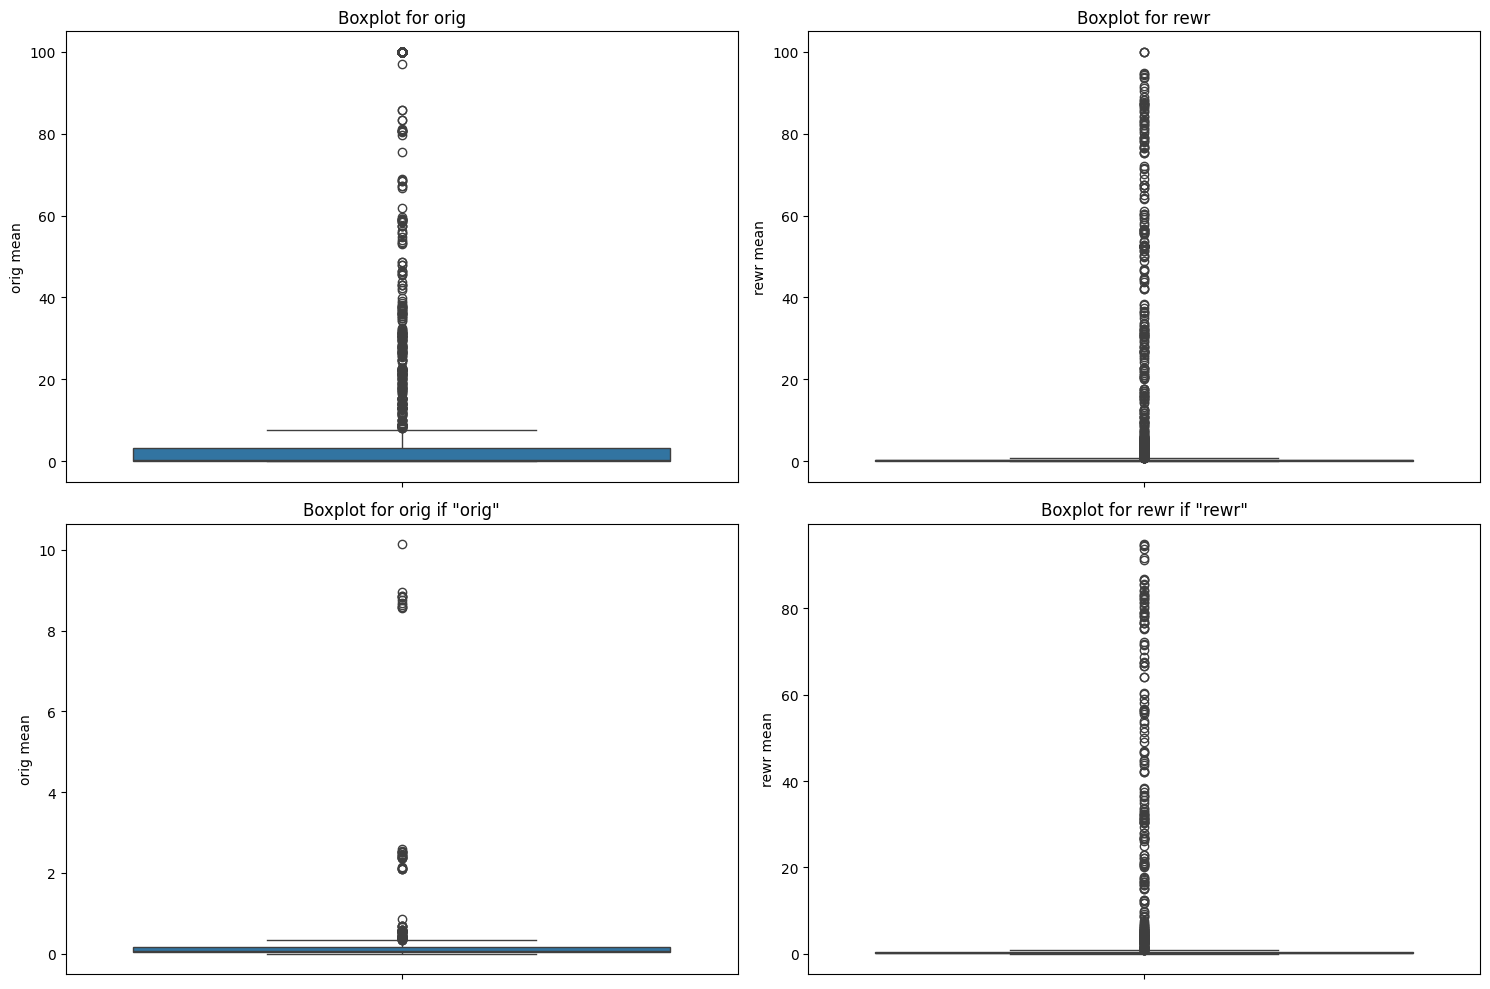

In [15]:
df_orig = df[df['orig/rewr(mean)'] == 'orig']
df_rewr = df[df['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y='orig mean', data=df, ax=axes[0,0])
axes[0,0].set_title(f'Boxplot for orig')

sns.boxplot(y='rewr mean', data=df, ax=axes[0,1])
axes[0,1].set_title(f'Boxplot for rewr')

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'Boxplot for orig if "orig"')

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'Boxplot for rewr if "rewr"')

plt.tight_layout()
plt.show()

The runtimes are highly skewed. Therefore, we log transform them

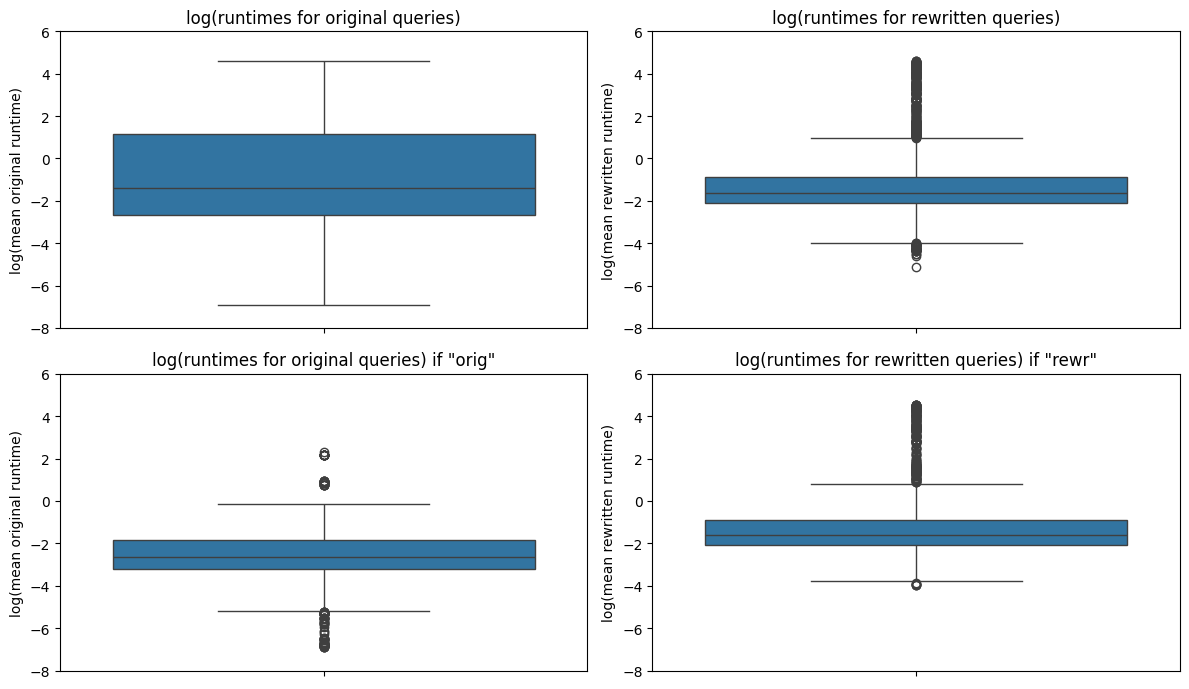

In [16]:
df_log = df.copy()
df_log["orig mean"] = np.log(df_log["orig mean"])
df_log["rewr mean"] = np.log(df_log["rewr mean"])

df_orig = df_log[df_log['orig/rewr(mean)'] == 'orig']
df_rewr = df_log[df_log['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(12,7))

sns.boxplot(y='orig mean', data=df_log, ax=axes[0,0])
axes[0,0].set_title(f'log(runtimes for original queries)')
axes[0,0].set_ylabel("log(mean original runtime)")
axes[0,0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_log, ax=axes[0,1])
axes[0,1].set_title(f'log(runtimes for rewritten queries)')
axes[0,1].set_ylabel("log(mean rewritten runtime)")
axes[0,1].set_ylim(-8, 6) 

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'log(runtimes for original queries) if "orig"')
axes[1,0].set_ylabel("log(mean original runtime)")
axes[1,0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'log(runtimes for rewritten queries) if "rewr"')
axes[1,1].set_ylabel("log(mean rewritten runtime)")
axes[1,1].set_ylim(-8, 6) 

plt.tight_layout()
plt.show()

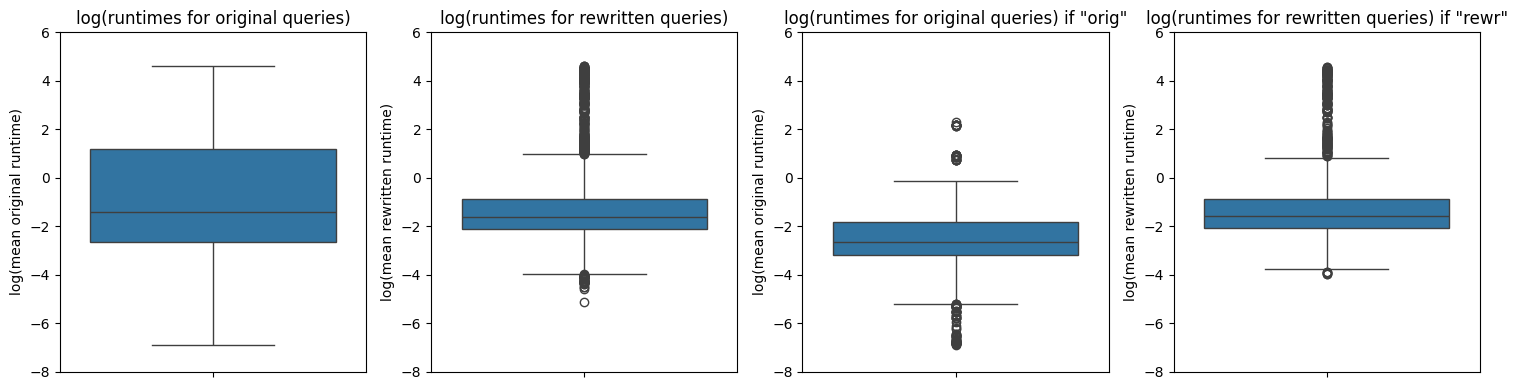

In [17]:
df_log = df.copy()
df_log["orig mean"] = np.log(df_log["orig mean"])
df_log["rewr mean"] = np.log(df_log["rewr mean"])

df_orig = df_log[df_log['orig/rewr(mean)'] == 'orig']
df_rewr = df_log[df_log['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(1,4, figsize=(15,4))

sns.boxplot(y='orig mean', data=df_log, ax=axes[0])
axes[0].set_title(f'log(runtimes for original queries)')
axes[0].set_ylabel("log(mean original runtime)")
axes[0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_log, ax=axes[1])
axes[1].set_title(f'log(runtimes for rewritten queries)')
axes[1].set_ylabel("log(mean rewritten runtime)")
axes[1].set_ylim(-8, 6) 

sns.boxplot(y='orig mean', data=df_orig, ax=axes[2])
axes[2].set_title(f'log(runtimes for original queries) if "orig"')
axes[2].set_ylabel("log(mean original runtime)")
axes[2].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[3])
axes[3].set_title(f'log(runtimes for rewritten queries) if "rewr"')
axes[3].set_ylabel("log(mean rewritten runtime)")
axes[3].set_ylim(-8, 6) 

plt.tight_layout()
plt.show()

#### Scatterplot of running times

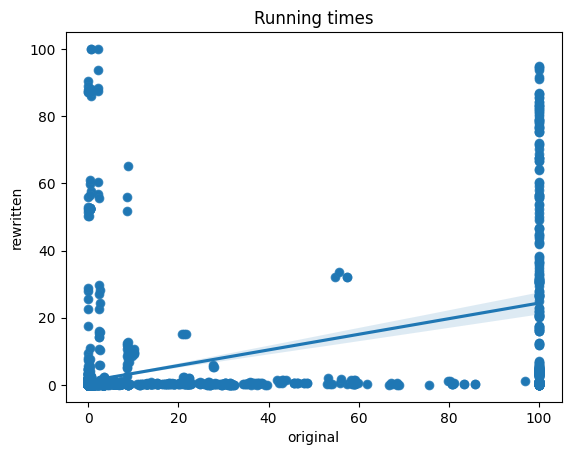

In [18]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df)
sns.regplot(x="orig mean", y="rewr mean", data=df) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

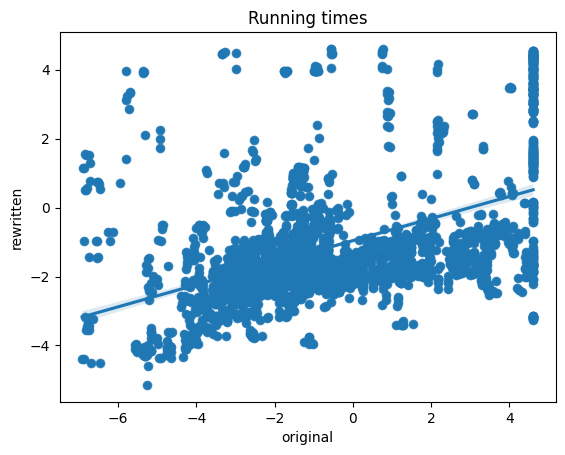

In [19]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df_log)
sns.regplot(x="orig mean", y="rewr mean", data=df_log) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

#### Classification response

Get the column(s) where we have "orig" or "rewr", depending on which method was faster. We now want to encode this as 0 (evaluating the original query faster) and 1 (evaluating the rewritten query faster).

In [20]:
mapping = {'orig': 0, 'rewr': 1}
y1 = df['orig/rewr(mean)'].map(mapping)
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr(mean), dtype: int64

The number of appearances of original and rewritten is very balanced.

In [21]:
y1.value_counts()

orig/rewr(mean)
1    1480
0    1418
Name: count, dtype: int64

In [22]:
count = y1.value_counts().tolist()[::-1] + ["-"]
count = pd.Series(count)
count.index = ["orig", "rewr", "equal"]
count

orig     1418
rewr     1480
equal       -
dtype: object

In [23]:
df["orig/rewr(mean)"].value_counts()

orig/rewr(mean)
rewr    1480
orig    1418
Name: count, dtype: int64

#### Classification response with three cases

In [24]:
condition = abs(df["diff rewr-orig"]) < 0.5
df["orig/rewr/equal 0.5"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.5'] = 'equal'

In [25]:
condition = abs(df["diff rewr-orig"]) < 0.1
df["orig/rewr/equal 0.1"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.1'] = 'equal'

In [26]:
condition = abs(df["diff rewr-orig"]) < 0.05
df["orig/rewr/equal 0.05"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.05'] = 'equal'

In [27]:
condition = abs(df["diff rewr-orig"]) < 0.01
df["orig/rewr/equal 0.01"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.01'] = 'equal'

In [28]:
count_05 = df["orig/rewr/equal 0.5"].value_counts()
count_01 = df["orig/rewr/equal 0.1"].value_counts()
count_005 = df["orig/rewr/equal 0.05"].value_counts()
count_001 = df["orig/rewr/equal 0.01"].value_counts()

In [29]:
count_001

orig/rewr/equal 0.01
rewr     1435
orig     1322
equal     141
Name: count, dtype: int64

In [30]:
counts = pd.concat([count_001, count_005, count_01, count_05], axis = 1)
counts.iloc[[0, 1]] = counts.iloc[[1, 0]].values
counts.index = ["orig", "rewr", "equal"]
counts = pd.concat([count, counts], axis = 1)
counts.columns = ["2 classes", "3 classes (0.01)", "3 classes (0.05)", "3 classes (0.1)", "3 classes (0.5)"]
counts

2 classes  3 classes (0.01)  3 classes (0.05)  3 classes (0.1)  \
orig       1418              1322              1007              706   
rewr       1480              1435              1336             1243   
equal         -               141               555              949   

       3 classes (0.5)  
orig               240  
rewr               989  
equal             1669

In [31]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_05 = df['orig/rewr/equal 0.5'].map(mapping1)
y1_equal_05.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.5, dtype: int64

In [32]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_01 = df['orig/rewr/equal 0.1'].map(mapping1)
y1_equal_01.head()

0    0
1    0
2   -1
3   -1
4    0
Name: orig/rewr/equal 0.1, dtype: int64

In [33]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_005 = df['orig/rewr/equal 0.05'].map(mapping1)
y1_equal_005.head()

0    0
1    0
2   -1
3   -1
4    0
Name: orig/rewr/equal 0.05, dtype: int64

In [34]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_001 = df['orig/rewr/equal 0.01'].map(mapping1)
y1_equal_001.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: orig/rewr/equal 0.01, dtype: int64

#### Regression response

We also have the time differences between the original and rewritten method and we want to use that as numerical response.

In [35]:
y1_diff = df["diff rewr-orig"]
#y1_diff = df["diff rewr+rewr-orig"]

We can see that the time difference has a wide range of values (or is skewed).

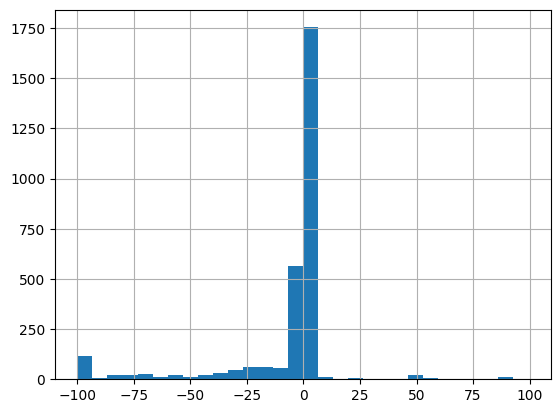

In [36]:
y1_diff.hist(bins = 30)
plt.show()

Therefore, we are going to transform it. As before with the features, we would like to apply a log transformation. Neverthless, since we have negative values this cannot be applied directly. We are going to multiple to log of the absolute values with the sign they had before. Additionally, since we have a lot of values close to zero, which leads to very low log values, we add 1 to the absolute values, which is a common method.   
$x = sgn(x) * log(|x| + 1)$

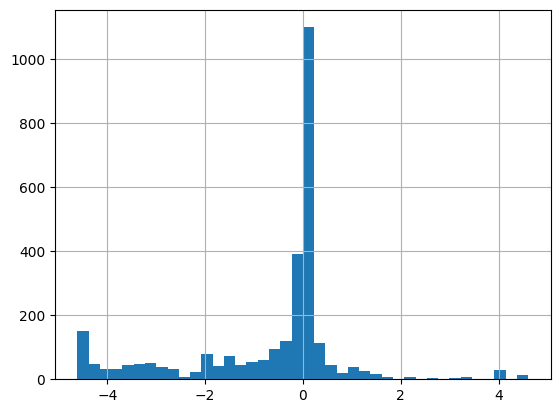

In [37]:
y1_diff_log = np.sign(y1_diff) * np.log(abs(y1_diff) +1)
y1_diff_log.hist(bins = 40)
plt.show()

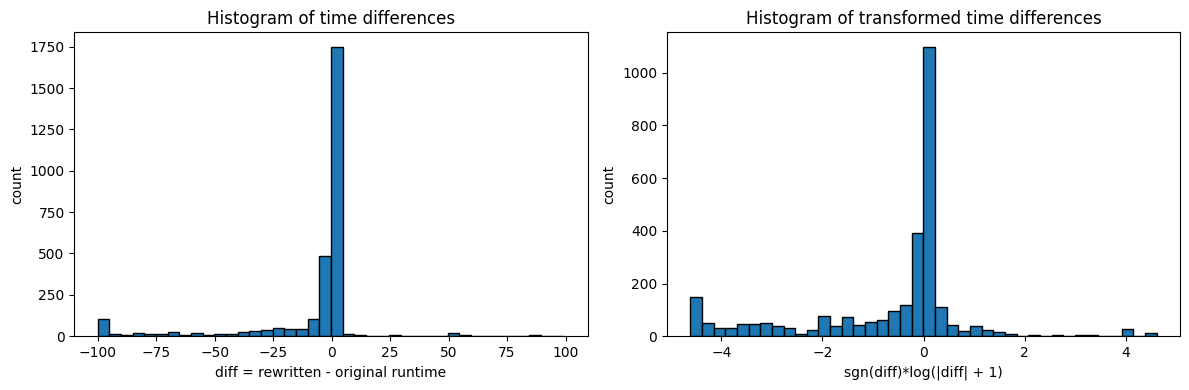

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(y1_diff, bins=40, edgecolor='black')
axs[0].set_title('Histogram of time differences')
axs[0].set_ylabel("count")
axs[0].set_xlabel("diff = rewritten - original runtime")

# Create the second histogram
y1_diff_log = np.sign(y1_diff) * np.log(abs(y1_diff) + 1)
axs[1].hist(y1_diff_log, bins=40, edgecolor='black')
axs[1].set_title('Histogram of transformed time differences')
axs[1].set_ylabel("count")
axs[1].set_xlabel("sgn(diff)*log(|diff| + 1)")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Train-validation-test split

We split the dataset such that each benchmark dataset is represented in the train and in the test set (stratification). We do a 80% train, 10% validation and 10% test split.

In [39]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=df["bench"], random_state=20)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, stratify=df.loc[X_test.index]["bench"], random_state=20)
X_train_hg = X_hg.loc[X_train.index]
X_val_hg = X_hg.loc[X_val.index]
X_test_hg = X_hg.loc[X_test.index]
y1_diff_log_train = y1_diff_log.loc[y1_train.index]
y1_diff_log_val = y1_diff_log.loc[y1_val.index]
y1_diff_log_test = y1_diff_log.loc[y1_test.index]
y1_equal_05_train = y1_equal_05.loc[y1_train.index]
y1_equal_05_val = y1_equal_05.loc[y1_val.index]
y1_equal_05_test = y1_equal_05.loc[y1_test.index]
y1_equal_01_train = y1_equal_01.loc[y1_train.index]
y1_equal_01_val = y1_equal_01.loc[y1_val.index]
y1_equal_01_test = y1_equal_01.loc[y1_test.index]
y1_equal_005_train = y1_equal_005.loc[y1_train.index]
y1_equal_005_val = y1_equal_005.loc[y1_val.index]
y1_equal_005_test = y1_equal_005.loc[y1_test.index]
y1_equal_001_train = y1_equal_001.loc[y1_train.index]
y1_equal_001_val = y1_equal_001.loc[y1_val.index]
y1_equal_001_test = y1_equal_001.loc[y1_test.index]

#### Cross-validation split

We take the same 10% as test set and use the rest for cross-validation.

In [40]:
X_train_cv = pd.concat([X_train, X_val], axis = 0)
y1_train_cv = pd.concat([y1_train, y1_val], axis = 0)
y1_diff_log_train_cv = pd.concat([y1_diff_log_train, y1_diff_log_val], axis = 0)
y1_equal_05_train_cv = pd.concat([y1_equal_05_train, y1_equal_05_val], axis = 0)
y1_equal_01_train_cv = pd.concat([y1_equal_01_train, y1_equal_01_val], axis = 0)
y1_equal_005_train_cv = pd.concat([y1_equal_005_train, y1_equal_005_val], axis = 0)
y1_equal_001_train_cv = pd.concat([y1_equal_001_train, y1_equal_001_val], axis = 0)

## ML models

In [41]:
table_2_classes = pd.DataFrame(columns=['acc', 'rec', 'acc', 'rec'])
table_3_classes = pd.DataFrame(columns=['acc', 'rec-mic', 'rec_mac', 'acc', 'rec-mic', 'rec-mac'])
table_time_diff = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'MSE', 'MAE', 'R2'])

### k-Nearest Neighbors with two classes

Train-test split:

In [42]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_train)
y1_pred_knn = clf.predict(X_val)

In [43]:
accuracy = accuracy_score(y1_val, y1_pred_knn)
recall = recall_score(y1_val, y1_pred_knn)
conf_matrix = confusion_matrix(y1_val, y1_pred_knn)
conf_matrix

array([[110,  17],
       [ 42, 121]])

CV:

In [44]:
y1_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [45]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_knn_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_knn_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_knn_cv)
conf_matrix_cv

array([[1064,  210],
       [ 266, 1068]])

Adding the values to the result table:

In [46]:
table_2_classes.loc["5-NN"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc     rec
5-NN  0.796552  0.742331  0.817485  0.8006

### k-Nearest Neighbors with three classes

##### equal cut off: 0.5

Train-test split:

In [47]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_knn = clf.predict(X_val)

In [48]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_knn)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_knn)
conf_matrix

array([[ 22,   3,   0],
       [  6, 143,  20],
       [  1,  18,  77]])

CV:

In [49]:
y1_equal_05_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [50]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv)
conf_matrix_cv

array([[ 176,   42,    1],
       [  49, 1278,  162],
       [   9,  176,  715]])

Adding the values to the result table:

In [51]:
table_3_classes.loc["5-NN 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5  0.834483  0.834483  0.842746  0.831672  0.831672  0.818797

##### equal cut off: 0.1

Train-test split:

In [52]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_knn = clf.predict(X_val)

In [53]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_knn)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_knn)
conf_matrix

array([[ 49,   7,   3],
       [ 24,  61,  12],
       [ 13,  15, 106]])

CV:

In [54]:
y1_equal_01_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [55]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv)
conf_matrix_cv

array([[455, 124,  43],
       [198, 538, 121],
       [105, 109, 915]])

Adding the values to the result table:

In [56]:
table_3_classes.loc["5-NN 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5  0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1  0.744828  0.744828  0.750140  0.731595  0.731595  0.723245

##### equal cut off: 0.05

Train-test split:

In [57]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_knn = clf.predict(X_val)

In [58]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_knn)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_knn)
conf_matrix

array([[ 82,   2,   9],
       [ 28,  16,  12],
       [ 23,   9, 109]])

CV:

In [59]:
y1_equal_005_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [60]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv)
conf_matrix_cv

array([[734,  77,  88],
       [201, 176, 123],
       [171,  81, 957]])

Adding the values to the result table:

In [61]:
table_3_classes.loc["5-NN 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5   0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1   0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05  0.713793  0.713793  0.646828  0.715874  0.715874  0.653342

##### equal cut off: 0.01

Train-test split:

In [62]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_knn = clf.predict(X_val)

In [63]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_knn)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_knn)
conf_matrix

array([[103,   0,  16],
       [ 15,   0,   4],
       [ 39,   1, 112]])

CV:

In [64]:
y1_equal_001_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [65]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv)
conf_matrix_cv

array([[1004,   14,  168],
       [  72,   10,   47],
       [ 271,   11, 1011]])

Adding the values to the result table:

In [66]:
table_3_classes.loc["5-NN 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5   0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1   0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05  0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01  0.741379  0.741379  0.534129  0.776457  0.776457  0.568655

### k-Nearest Neighbors with time difference

Train-test split:

In [67]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y1_diff_log_train)
y1_pred_knn = model.predict(X_val)

In [68]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_knn)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_knn)
r2 = r2_score(y1_diff_log_val, y1_pred_knn)

CV:

In [69]:
y1_pred_knn_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [70]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_knn_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_knn_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_knn_cv)

Adding the values to the result table:

In [71]:
table_time_diff.loc["5-NN"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN  0.585035  0.464176  0.787007  0.739192  0.515487  0.732997

### Decision tree with two classes

Train-test split:

In [72]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [73]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
recall = recall_score(y1_val, y1_pred_dec_tree)
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[118,   9],
       [ 42, 121]])

CV:

In [74]:
y1_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [75]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_dec_tree_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_dec_tree_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_dec_tree_cv)
conf_matrix_cv

array([[1102,  172],
       [ 276, 1058]])

Adding the values to the result table:

In [76]:
table_2_classes.loc["Decision tree"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc       rec
5-NN           0.796552  0.742331  0.817485  0.800600
Decision tree  0.824138  0.742331  0.828221  0.793103

### Decision tree with three classes

##### equal cut off: 0.5

Train-test split:

In [77]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_val)

In [78]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_dec_tree)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_dec_tree)
conf_matrix

array([[ 21,   4,   0],
       [  4, 151,  14],
       [  0,  18,  78]])

CV:

In [79]:
y1_equal_05_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [80]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv)
conf_matrix_cv

array([[ 165,   52,    2],
       [  38, 1323,  128],
       [   7,  183,  710]])

Adding the values to the result table:

In [81]:
table_3_classes.loc["Decision tree 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5           0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1           0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05          0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01          0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5  0.862069  0.862069  0.848664  0.842791  0.842791  0.810276

##### equal cut off: 0.1

Train-test split:

In [82]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_val)

In [83]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_dec_tree)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_dec_tree)
conf_matrix

array([[ 43,  14,   2],
       [ 13,  73,  11],
       [  5,  20, 109]])

CV:

In [84]:
y1_equal_01_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [85]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv)
conf_matrix_cv

array([[421, 156,  45],
       [143, 604, 110],
       [ 56, 152, 921]])

Adding the values to the result table:

In [86]:
table_3_classes.loc["Decision tree 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5           0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1           0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05          0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01          0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5  0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1  0.775862  0.775862  0.764941  0.746166  0.746166  0.732466

##### equal cut off: 0.05

Train-test split:

In [87]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [88]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

array([[ 80,   5,   8],
       [ 22,  21,  13],
       [ 17,  12, 112]])

CV:

In [89]:
y1_equal_005_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [90]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv)
conf_matrix_cv

array([[726,  75,  98],
       [191, 185, 124],
       [145,  85, 979]])

Adding the values to the result table:

In [91]:
table_3_classes.loc["Decision tree 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441

##### equal cut off: 0.01

Train-test split:

In [92]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [93]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

array([[107,   2,  10],
       [ 15,   0,   4],
       [ 36,   2, 114]])

CV:

In [94]:
y1_equal_001_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [95]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv)
conf_matrix_cv

array([[1019,   12,  155],
       [  70,   14,   45],
       [ 257,   20, 1016]])

Adding the values to the result table:

In [96]:
table_3_classes.loc["Decision tree 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496

### Decision tree with time difference

Train-test split:

In [97]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [98]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_dec_tree)
r2 = r2_score(y1_diff_log_val, y1_pred_dec_tree)

CV:

In [99]:
y1_pred_dec_tree_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [100]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_dec_tree_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_dec_tree_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_dec_tree_cv)

Adding the values to the result table:

In [101]:
table_time_diff.loc["Decision tree"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN           0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree  0.580937  0.452845  0.788499  0.672141  0.480212  0.757216

### Random forest with two classes

Train-test split:

In [102]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_train)
y1_pred_rand_forest = clf.predict(X_val)

In [103]:
accuracy = accuracy_score(y1_val, y1_pred_rand_forest)
recall = recall_score(y1_val, y1_pred_rand_forest)
conf_matrix = confusion_matrix(y1_val, y1_pred_rand_forest)
conf_matrix

array([[115,  12],
       [ 38, 125]])

CV:

In [104]:
y1_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [105]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_rand_forest_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_rand_forest_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_rand_forest_cv)
conf_matrix_cv

array([[1075,  199],
       [ 256, 1078]])

Adding the values to the result table:

In [106]:
table_2_classes.loc["Random forest"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc       rec
5-NN           0.796552  0.742331  0.817485  0.800600
Decision tree  0.824138  0.742331  0.828221  0.793103
Random forest  0.827586  0.766871  0.825537  0.808096

### Random forest with three classes

##### equal cut off: 0.5

Train-test split:

In [107]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_rand_forest = clf.predict(X_val)

In [108]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_rand_forest)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_rand_forest)
conf_matrix

array([[ 20,   4,   1],
       [  4, 145,  20],
       [  0,  16,  80]])

CV:

In [109]:
y1_equal_05_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [110]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv)
conf_matrix_cv

array([[ 157,   58,    4],
       [  32, 1309,  148],
       [   5,  169,  726]])

Adding the values to the result table:

In [111]:
table_3_classes.loc["Random forest 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892

##### equal cut off: 0.1

Train-test split:

In [112]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_rand_forest = clf.predict(X_val)

In [113]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_rand_forest)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_rand_forest)
conf_matrix

array([[ 42,  14,   3],
       [ 10,  72,  15],
       [  4,  18, 112]])

CV:

In [114]:
y1_equal_01_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [115]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv)
conf_matrix_cv

array([[406, 163,  53],
       [125, 606, 126],
       [ 44, 139, 946]])

Adding the values to the result table:

In [116]:
table_3_classes.loc["Random forest 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587

##### equal cut off: 0.05

Train-test split:

In [117]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_rand_forest = clf.predict(X_val)

In [118]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_rand_forest)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_rand_forest)
conf_matrix

array([[ 76,   7,  10],
       [ 18,  21,  17],
       [ 14,  12, 115]])

CV:

In [119]:
y1_equal_005_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [120]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv)
conf_matrix_cv

array([[ 701,   87,  111],
       [ 175,  182,  143],
       [ 127,   82, 1000]])

Adding the values to the result table:

In [121]:
table_3_classes.loc["Random forest 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962

##### equal cut off: 0.01

Train-test split:

In [122]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_rand_forest = clf.predict(X_val)

In [123]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_rand_forest)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_rand_forest)
conf_matrix

array([[103,   2,  14],
       [ 12,   1,   6],
       [ 30,   2, 120]])

CV:

In [124]:
y1_equal_001_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [125]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv)
conf_matrix_cv

array([[ 991,   16,  179],
       [  63,   14,   52],
       [ 225,   21, 1047]])

Adding the values to the result table:

In [126]:
table_3_classes.loc["Random forest 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618

### Random forest with time difference

Train-test split:

In [127]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_val)

In [128]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_rand_forest)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_rand_forest)
r2 = r2_score(y1_diff_log_val, y1_pred_rand_forest)

CV:

In [129]:
y1_pred_rand_forest_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [130]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_rand_forest_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_rand_forest_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_rand_forest_cv)

Adding the values to the result table:

In [131]:
table_time_diff.loc["Random forest"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN           0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree  0.580937  0.452845  0.788499  0.672141  0.480212  0.757216
Random forest  0.555977  0.449528  0.797586  0.653397  0.477467  0.763987

### SVM (Support Vector Machine) with two classes, linear kernel

Train-test split:

In [132]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [133]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[ 86,  41],
       [ 46, 117]])

CV:

In [134]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [135]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[781, 493],
       [366, 968]])

Adding the values to the result table:

In [136]:
table_2_classes.loc["SVM linear"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc       rec
5-NN           0.796552  0.742331  0.817485  0.800600
Decision tree  0.824138  0.742331  0.828221  0.793103
Random forest  0.827586  0.766871  0.825537  0.808096
SVM linear     0.700000  0.717791  0.670629  0.725637

### SVM with three classes, linear kernel

##### equal cut off: 0.5

Train-test split:

In [137]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [138]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 22,   2,   1],
       [  5, 159,   5],
       [  0,  65,  31]])

CV:

In [139]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [140]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[ 182,   28,    9],
       [  52, 1388,   49],
       [   4,  604,  292]])

Adding the values to the result table:

In [141]:
table_3_classes.loc["SVM linear 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888

##### equal cut off: 0.1

Train-test split:

In [142]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [143]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[ 25,   7,  27],
       [  5,  61,  31],
       [  1,  23, 110]])

CV:

In [144]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [145]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[235, 103, 284],
       [ 32, 481, 344],
       [ 18, 189, 922]])

Adding the values to the result table:

In [146]:
table_3_classes.loc["SVM linear 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242

##### equal cut off: 0.05

Train-test split:

In [147]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [148]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[ 40,   8,  45],
       [  8,  19,  29],
       [ 14,  11, 116]])

CV:

In [149]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [150]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[349, 106, 444],
       [ 69, 184, 247],
       [117, 112, 980]])

Adding the values to the result table:

In [151]:
table_3_classes.loc["SVM linear 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265

##### equal cut off: 0.01

Train-test split:

In [152]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [153]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[ 75,   0,  44],
       [ 10,   0,   9],
       [ 37,   0, 115]])

CV:

In [154]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [155]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[725,   0, 461],
       [ 75,   0,  54],
       [336,   0, 957]])

Adding the values to the result table:

In [156]:
table_3_classes.loc["SVM linear 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479

### SVM with time difference, linear kernel

Train-test split:

In [157]:
model = SVR(kernel='linear')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [158]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [159]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [160]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [161]:
table_time_diff.loc["SVM linear"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN           0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree  0.580937  0.452845  0.788499  0.672141  0.480212  0.757216
Random forest  0.555977  0.449528  0.797586  0.653397  0.477467  0.763987
SVM linear     1.777780  0.831371  0.352766  2.020316  0.881668  0.270243

### SVM (Support Vector Machine) with two classes, polynomial kernel

Train-test split:

In [162]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [163]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[ 86,  41],
       [ 55, 108]])

CV:

In [164]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [165]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[821, 453],
       [396, 938]])

Adding the values to the result table:

In [166]:
table_2_classes.loc["SVM poly"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc       rec
5-NN           0.796552  0.742331  0.817485  0.800600
Decision tree  0.824138  0.742331  0.828221  0.793103
Random forest  0.827586  0.766871  0.825537  0.808096
SVM linear     0.700000  0.717791  0.670629  0.725637
SVM poly       0.668966  0.662577  0.674463  0.703148

### SVM with three classes, polynomial kernel

##### equal cut off: 0.5

Train-test split:

In [167]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [168]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 11,  13,   1],
       [  1, 159,   9],
       [  0,  59,  37]])

CV:

In [169]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [170]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[  84,  132,    3],
       [  19, 1422,   48],
       [   4,  540,  356]])

Adding the values to the result table:

In [171]:
table_3_classes.loc["SVM poly 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040

##### equal cut off: 0.1

Train-test split:

In [172]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [173]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[30,  9, 20],
       [ 6, 74, 17],
       [ 2, 57, 75]])

CV:

In [174]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [175]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[265, 134, 223],
       [ 53, 613, 191],
       [ 34, 424, 671]])

Adding the values to the result table:

In [176]:
table_3_classes.loc["SVM poly 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554

##### equal cut off: 0.05

Train-test split:

In [177]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [178]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[ 47,   0,  46],
       [  9,   5,  42],
       [ 12,   2, 127]])

CV:

In [179]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [180]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[ 437,    6,  456],
       [  86,   46,  368],
       [  84,   13, 1112]])

Adding the values to the result table:

In [181]:
table_3_classes.loc["SVM poly 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288

##### equal cut off: 0.01

Train-test split:

In [182]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [183]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[ 67,   0,  52],
       [  8,   0,  11],
       [ 26,   0, 126]])

CV:

In [184]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [185]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[ 650,    0,  536],
       [  47,    0,   82],
       [ 192,    0, 1101]])

Adding the values to the result table:

In [186]:
table_3_classes.loc["SVM poly 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288
SVM poly 0.01       0.665517  0.665517  0.463991  0.671396  0.671396  0.466523

### SVM with time difference, polynomial kernel

Train-test split:

In [187]:
model = SVR(kernel='poly')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [188]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [189]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [190]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [191]:
table_time_diff.loc["SVM poly"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN           0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree  0.580937  0.452845  0.788499  0.672141  0.480212  0.757216
Random forest  0.555977  0.449528  0.797586  0.653397  0.477467  0.763987
SVM linear     1.777780  0.831371  0.352766  2.020316  0.881668  0.270243
SVM poly       1.795520  0.773865  0.346308  1.964595  0.818809  0.290370

### SVM (Support Vector Machine) with two classes, rbf kernel

Train-test split:

In [192]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [193]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[ 76,  51],
       [ 33, 130]])

CV:

In [194]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [195]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[ 724,  550],
       [ 245, 1089]])

Adding the values to the result table:

In [196]:
table_2_classes.loc["SVM rbf"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

acc       rec       acc       rec
5-NN           0.796552  0.742331  0.817485  0.800600
Decision tree  0.824138  0.742331  0.828221  0.793103
Random forest  0.827586  0.766871  0.825537  0.808096
SVM linear     0.700000  0.717791  0.670629  0.725637
SVM poly       0.668966  0.662577  0.674463  0.703148
SVM rbf        0.710345  0.797546  0.695169  0.816342

### SVM with three classes, rbf kernel

##### equal cut off: 0.5

Train-test split:

In [197]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [198]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 12,  12,   1],
       [  1, 165,   3],
       [  0,  67,  29]])

CV:

In [199]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [200]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[ 113,  103,    3],
       [  19, 1456,   14],
       [   4,  616,  280]])

Adding the values to the result table:

In [201]:
table_3_classes.loc["SVM rbf 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288
SVM poly 0.01       0.665517  0.665517  0.463991  0.671396  0.671396  0.466523
SVM rbf 0.5         0.710345  0.710345  0.586138  0.708972  0.708972  0.601643

##### equal cut off: 0.1

Train-test split:

In [202]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [203]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[22, 11, 26],
       [ 3, 69, 25],
       [ 1, 46, 87]])

CV:

In [204]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [205]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[218, 108, 296],
       [ 37, 537, 283],
       [ 18, 300, 811]])

Adding the values to the result table:

In [206]:
table_3_classes.loc["SVM rbf 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288
SVM poly 0.01       0.665517  0.665517  0.463991  0.671396  0.671396  0.466523
SVM rbf 0.5         0.710345  0.710345  0.586138  0.708972  0.708972  0.601643
SVM rbf 0.1         0.613793  0.613793  0.577825  0.600460  0.600460  0.565141

##### equal cut off: 0.05

Train-test split:

In [207]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [208]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[ 51,   5,  37],
       [ 15,  19,  22],
       [ 13,   9, 119]])

CV:

In [209]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [210]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[ 479,   45,  375],
       [ 117,  158,  225],
       [ 107,   75, 1027]])

Adding the values to the result table:

In [211]:
table_3_classes.loc["SVM rbf 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288
SVM poly 0.01       0.665517  0.665517  0.463991  0.671396  0.671396  0.466523
SVM rbf 0.5         0.710345  0.710345  0.586138  0.708972  0.708972  0.601643
SVM rbf 0.1         0.613793  0.613793  0.577825  0.600460  0.600460  0.565141
SVM rbf 0.05        0.651724  0.651724  0.577215  0.638037  0.638037  0.566092

##### equal cut off: 0.01

Train-test split:

In [212]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [213]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[ 69,   0,  50],
       [  9,   0,  10],
       [ 27,   0, 125]])

CV:

In [214]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [215]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[ 648,    0,  538],
       [  40,    0,   89],
       [ 187,    0, 1106]])

Adding the values to the result table:

In [216]:
table_3_classes.loc["SVM rbf 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

acc   rec-mic   rec_mac       acc   rec-mic   rec-mac
5-NN 0.5            0.834483  0.834483  0.842746  0.831672  0.831672  0.818797
5-NN 0.1            0.744828  0.744828  0.750140  0.731595  0.731595  0.723245
5-NN 0.05           0.713793  0.713793  0.646828  0.715874  0.715874  0.653342
5-NN 0.01           0.741379  0.741379  0.534129  0.776457  0.776457  0.568655
Decision tree 0.5   0.862069  0.862069  0.848664  0.842791  0.842791  0.810276
Decision tree 0.1   0.775862  0.775862  0.764941  0.746166  0.746166  0.732466
Decision tree 0.05  0.734483  0.734483  0.676514  0.724693  0.724693  0.662441
Decision tree 0.01  0.762069  0.762069  0.549720  0.785660  0.785660  0.584496
Random forest 0.5   0.844828  0.844828  0.830440  0.840491  0.840491  0.800892
Random forest 0.1   0.779310  0.779310  0.763318  0.750767  0.750767  0.732587
Random forest 0.05  0.731034  0.731034  0.669269  0.722009  0.722009  0.656962
Random forest 0.01  0.772414  0.772414  0.569217  0.786810  0.786810  0.584618
SVM linear 0.5      0.731034  0.731034  0.714582  0.713957  0.713957  0.695888
SVM linear 0.1      0.675862  0.675862  0.624497  0.628067  0.628067  0.585242
SVM linear 0.05     0.603448  0.603448  0.530696  0.580138  0.580138  0.522265
SVM linear 0.01     0.655172  0.655172  0.462277  0.644939  0.644939  0.450479
SVM poly 0.5        0.713793  0.713793  0.588748  0.713957  0.713957  0.578040
SVM poly 0.1        0.617241  0.617241  0.610354  0.593942  0.593942  0.578554
SVM poly 0.05       0.617241  0.617241  0.498457  0.611580  0.611580  0.499288
SVM poly 0.01       0.665517  0.665517  0.463991  0.671396  0.671396  0.466523
SVM rbf 0.5         0.710345  0.710345  0.586138  0.708972  0.708972  0.601643
SVM rbf 0.1         0.613793  0.613793  0.577825  0.600460  0.600460  0.565141
SVM rbf 0.05        0.651724  0.651724  0.577215  0.638037  0.638037  0.566092
SVM rbf 0.01        0.668966  0.668966  0.467400  0.672546  0.672546  0.467250

### SVM with time difference, rbf kernel

Train-test split:

In [217]:
model = SVR(kernel='rbf')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [218]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [219]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [220]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [221]:
table_time_diff.loc["SVM rbf"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN           0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree  0.580937  0.452845  0.788499  0.672141  0.480212  0.757216
Random forest  0.555977  0.449528  0.797586  0.653397  0.477467  0.763987
SVM linear     1.777780  0.831371  0.352766  2.020316  0.881668  0.270243
SVM poly       1.795520  0.773865  0.346308  1.964595  0.818809  0.290370
SVM rbf        1.644689  0.747691  0.401221  1.826137  0.802379  0.340382

### Deep MLP with two classes

In [749]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [750]:
def MLP_classification(X_training, y_training, X_validation, y_validation, type, text):
    custom_dataset = CustomDataset(X_training, y_training)
    trainloader = DataLoader(custom_dataset, batch_size=100, shuffle=True)

    mlp = MLPClassifier(random_seed=20)

    loss_function = nn.CrossEntropyLoss()  
        
    optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

    val_data = torch.tensor(X_validation.values, dtype=torch.float32)
    val_targets = torch.tensor(y_validation.values, dtype=torch.float32)
    
    best_val_loss = float('inf')
    best_model_state = None
    
    for epoch in range(300):
        print(f'Starting Epoch {epoch+1}')
    
        current_loss = 0.0
    
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
    
            optimizer.zero_grad()
    
            outputs = mlp(inputs)
    
            targets = targets.long()  # Convert target tensor to torch.long data type
            loss = loss_function(outputs, targets)
    
            loss.backward()
    
            optimizer.step()
    
            current_loss += loss.item()
    
        print(current_loss/len(trainloader))
    
        mlp.eval()
        with torch.no_grad():
            val_outputs = mlp(val_data).squeeze()
            val_targets = val_targets.long()
            val_loss = loss_function(val_outputs, val_targets).item()
            #print(f'Validation loss: {val_loss}')
    
        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = deepcopy(mlp.state_dict())
            print(f'New best model found at epoch {epoch+1} with validation loss {best_val_loss}')
    
    print("Training has completed")


    mlp2 = MLPClassifier(random_seed=20)
    mlp2.load_state_dict(best_model_state)
    
    mlp2.eval() 
    
    with torch.no_grad():
        outputs = mlp2(val_data).squeeze()
        predicted_labels = torch.argmax(outputs, dim=1).numpy()
    
    predicted_labels = np.array(predicted_labels)
    val_targets = np.array(val_targets)

    if type == "2_class":
        accuracy = accuracy_score(val_targets, predicted_labels)
        recall = recall_score(val_targets, predicted_labels)
        conf_matrix = confusion_matrix(val_targets, predicted_labels)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(val_targets, predicted_labels)
        recall_micro = recall_score(val_targets, predicted_labels, average='micro')
        recall_macro = recall_score(val_targets, predicted_labels, average='macro')
        conf_matrix = confusion_matrix(val_targets, predicted_labels)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

#### 3-layer MLP
*  Loss: Cross-Entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 2

In [224]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 2)
            
        )

    def forward(self, x):
        return self.layers(x)

In [225]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-5-2")

Starting Epoch 1
0.7577323665221533
New best model found at epoch 1 with validation loss 0.658542811870575
Starting Epoch 2
0.6506970524787903
Starting Epoch 3
0.6442310164372126
Starting Epoch 4
0.6216678842902184
Starting Epoch 5
0.6239227627714475
New best model found at epoch 5 with validation loss 0.6455430388450623
Starting Epoch 6
0.6198397452632586
New best model found at epoch 6 with validation loss 0.6297549605369568
Starting Epoch 7
0.610798659423987
New best model found at epoch 7 with validation loss 0.6038540005683899
Starting Epoch 8
0.6099989836414655
Starting Epoch 9
0.6012604832649231
Starting Epoch 10
0.5886927942434946
Starting Epoch 11
0.5893765389919281
Starting Epoch 12
0.5864687810341517
New best model found at epoch 12 with validation loss 0.5953618288040161
Starting Epoch 13
0.5861944506565729
Starting Epoch 14
0.573922031869491
New best model found at epoch 14 with validation loss 0.5762601494789124
Starting Epoch 15
0.5707520494858423
New best model found at

##### 3-layer MLP: Version 2
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 2

In [226]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [227]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-10-2")

Starting Epoch 1
0.9130351742108663
New best model found at epoch 1 with validation loss 0.702664315700531
Starting Epoch 2
0.6876882587869962
Starting Epoch 3
0.664328488210837
Starting Epoch 4
0.6546459173162779
New best model found at epoch 4 with validation loss 0.6823270320892334
Starting Epoch 5
0.6446176618337631
New best model found at epoch 5 with validation loss 0.6460940837860107
Starting Epoch 6
0.6379607369502386
Starting Epoch 7
0.6369501277804375
Starting Epoch 8
0.6372990608215332
New best model found at epoch 8 with validation loss 0.6240490078926086
Starting Epoch 9
0.614732692639033
Starting Epoch 10
0.6096040482322375
Starting Epoch 11
0.6149040833115578
Starting Epoch 12
0.6007321129242579
New best model found at epoch 12 with validation loss 0.6044496893882751
Starting Epoch 13
0.5992620488007864
Starting Epoch 14
0.5948011775811514
Starting Epoch 15
0.6072787468632063
New best model found at epoch 15 with validation loss 0.5987141132354736
Starting Epoch 16
0.593

##### 3-layer MLP: Version 3
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 2

In [228]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [229]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-20-2")

Starting Epoch 1
0.8409677048524221
New best model found at epoch 1 with validation loss 0.6856363415718079
Starting Epoch 2
0.6577543914318085
New best model found at epoch 2 with validation loss 0.6561053991317749
Starting Epoch 3
0.6398347864548365
New best model found at epoch 3 with validation loss 0.6520537734031677
Starting Epoch 4
0.6360599771142006
New best model found at epoch 4 with validation loss 0.6392252445220947
Starting Epoch 5
0.6340099895993868
Starting Epoch 6
0.626983679831028
New best model found at epoch 6 with validation loss 0.6331554651260376
Starting Epoch 7
0.6224177852272987
New best model found at epoch 7 with validation loss 0.623582124710083
Starting Epoch 8
0.6184703608353933
Starting Epoch 9
0.6111479699611664
New best model found at epoch 9 with validation loss 0.6226702928543091
Starting Epoch 10
0.6085950757066408
New best model found at epoch 10 with validation loss 0.6069110035896301
Starting Epoch 11
0.6027174691359202
New best model found at epo

##### 3-layer MLP: Version 4
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 2

In [230]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [231]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-25-2")

Starting Epoch 1
1.056535581747691
New best model found at epoch 1 with validation loss 0.682576596736908
Starting Epoch 2
0.6582989891370138
New best model found at epoch 2 with validation loss 0.6776378750801086
Starting Epoch 3
0.6512863710522652
New best model found at epoch 3 with validation loss 0.6480798125267029
Starting Epoch 4
0.6398239880800247
Starting Epoch 5
0.6281846587856611
Starting Epoch 6
0.628223384420077
Starting Epoch 7
0.6242606515685717
New best model found at epoch 7 with validation loss 0.6397546529769897
Starting Epoch 8
0.6174123585224152
Starting Epoch 9
0.6227420369784037
New best model found at epoch 9 with validation loss 0.6145129203796387
Starting Epoch 10
0.6039947792887688
Starting Epoch 11
0.5974622443318367
New best model found at epoch 11 with validation loss 0.6143253445625305
Starting Epoch 12
0.5855084272722403
New best model found at epoch 12 with validation loss 0.6127384305000305
Starting Epoch 13
0.5873107885320982
New best model found at e

##### 3-layer MLP: Version 5
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 2

In [232]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [233]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-2")

Starting Epoch 1
1.2941348453362782
New best model found at epoch 1 with validation loss 0.7180968523025513
Starting Epoch 2
0.694221518933773
New best model found at epoch 2 with validation loss 0.7131860256195068
Starting Epoch 3
0.679537425438563
New best model found at epoch 3 with validation loss 0.665014922618866
Starting Epoch 4
0.6659479190905889
Starting Epoch 5
0.6711709251006445
Starting Epoch 6
0.6519819473226866
Starting Epoch 7
0.6437194223205248
Starting Epoch 8
0.6405301317572594
Starting Epoch 9
0.6408194079995155
New best model found at epoch 9 with validation loss 0.6368392705917358
Starting Epoch 10
0.628428541123867
New best model found at epoch 10 with validation loss 0.631764829158783
Starting Epoch 11
0.6222408364216486
New best model found at epoch 11 with validation loss 0.6157258749008179
Starting Epoch 12
0.61732467263937
New best model found at epoch 12 with validation loss 0.612261176109314
Starting Epoch 13
0.6110590199629465
Starting Epoch 14
0.606554806

##### 3-layer MLP: Version 6
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 2

In [234]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [235]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-2")

Starting Epoch 1
1.3118604123592377
New best model found at epoch 1 with validation loss 0.6903735399246216
Starting Epoch 2
0.6783065547545751
Starting Epoch 3
0.6733089089393616
New best model found at epoch 3 with validation loss 0.6751603484153748
Starting Epoch 4
0.6650274768471718
New best model found at epoch 4 with validation loss 0.660770833492279
Starting Epoch 5
0.6539983650048574
Starting Epoch 6
0.6403171792626381
Starting Epoch 7
0.6364937648177147
New best model found at epoch 7 with validation loss 0.6294013857841492
Starting Epoch 8
0.6265085190534592
Starting Epoch 9
0.6165121992429098
New best model found at epoch 9 with validation loss 0.6166507005691528
Starting Epoch 10
0.6113334794839224
New best model found at epoch 10 with validation loss 0.603916347026825
Starting Epoch 11
0.618360901872317
Starting Epoch 12
0.603388878206412
Starting Epoch 13
0.5986250427862009
New best model found at epoch 13 with validation loss 0.5989580154418945
Starting Epoch 14
0.595882

#### 4-layer MLP
*  Loss: Cross-entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 2

In [236]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [237]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-10-5-2")

Starting Epoch 1
0.7511581058303515
New best model found at epoch 1 with validation loss 0.6796544194221497
Starting Epoch 2
0.6594660356640816
Starting Epoch 3
0.650652510424455
Starting Epoch 4
0.6471426164110502
New best model found at epoch 4 with validation loss 0.6578267216682434
Starting Epoch 5
0.6361126949389776
New best model found at epoch 5 with validation loss 0.6287627816200256
Starting Epoch 6
0.628760407368342
Starting Epoch 7
0.6252719312906265
Starting Epoch 8
0.6126954406499863
Starting Epoch 9
0.6157105391224226
Starting Epoch 10
0.6027044405539831
New best model found at epoch 10 with validation loss 0.6229204535484314
Starting Epoch 11
0.6130070661505064
New best model found at epoch 11 with validation loss 0.6131994128227234
Starting Epoch 12
0.5981674393018087
New best model found at epoch 12 with validation loss 0.6126320362091064
Starting Epoch 13
0.5840132782856623
New best model found at epoch 13 with validation loss 0.6082940697669983
Starting Epoch 14
0.59

##### 4-layer MLP: Version 2
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 2

In [238]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [239]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-20-10-2")

Starting Epoch 1
0.811152346432209
New best model found at epoch 1 with validation loss 0.6759429574012756
Starting Epoch 2
0.654383972287178
Starting Epoch 3
0.6476124996940295
New best model found at epoch 3 with validation loss 0.6570412516593933
Starting Epoch 4
0.634350873529911
Starting Epoch 5
0.6462343508998553
Starting Epoch 6
0.6357344215114912
Starting Epoch 7
0.6253508379062017
Starting Epoch 8
0.6252683872977892
Starting Epoch 9
0.6221030652523041
New best model found at epoch 9 with validation loss 0.6465039253234863
Starting Epoch 10
0.6219025030732155
New best model found at epoch 10 with validation loss 0.6438145637512207
Starting Epoch 11
0.6107239425182343
Starting Epoch 12
0.6043862402439117
New best model found at epoch 12 with validation loss 0.631077766418457
Starting Epoch 13
0.6196833153565725
Starting Epoch 14
0.6037345851461092
New best model found at epoch 14 with validation loss 0.6164027452468872
Starting Epoch 15
0.5956530049443245
Starting Epoch 16
0.596

##### 4-layer MLP: Version 3
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 2

In [240]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [241]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-20-2")

Starting Epoch 1
1.0246997624635696
New best model found at epoch 1 with validation loss 0.6827359795570374
Starting Epoch 2
0.6861921201149622
Starting Epoch 3
0.6788135891159376
Starting Epoch 4
0.674351304769516
Starting Epoch 5
0.6702713569005331
New best model found at epoch 5 with validation loss 0.6717570424079895
Starting Epoch 6
0.6682783911625544
Starting Epoch 7
0.6581543361147245
New best model found at epoch 7 with validation loss 0.649364173412323
Starting Epoch 8
0.6463199928402901
Starting Epoch 9
0.6394105479121208
New best model found at epoch 9 with validation loss 0.6362305879592896
Starting Epoch 10
0.6295299579699835
New best model found at epoch 10 with validation loss 0.6282970905303955
Starting Epoch 11
0.6172838434576988
New best model found at epoch 11 with validation loss 0.6164372563362122
Starting Epoch 12
0.6164274116357168
Starting Epoch 13
0.603326790034771
New best model found at epoch 13 with validation loss 0.5870110988616943
Starting Epoch 14
0.6045

##### 4-layer MLP: Version 4
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 2

In [242]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [243]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-10-2")

Starting Epoch 1
0.9949453423420588
New best model found at epoch 1 with validation loss 0.6905537843704224
Starting Epoch 2
0.6934948116540909
Starting Epoch 3
0.6932915449142456
Starting Epoch 4
0.6935579801599184
Starting Epoch 5
0.6935117617249489
Starting Epoch 6
0.6933389777938525
Starting Epoch 7
0.6933151433865229
New best model found at epoch 7 with validation loss 0.6902695298194885
Starting Epoch 8
0.6935042614738146
Starting Epoch 9
0.6932052100698153
Starting Epoch 10
0.6931954473257065
Starting Epoch 11
0.6932797133922577
Starting Epoch 12
0.6932238166530927
Starting Epoch 13
0.6933362185955048
Starting Epoch 14
0.693313866853714
Starting Epoch 15
0.693228580057621
Starting Epoch 16
0.6933829858899117
Starting Epoch 17
0.6933700988690058
Starting Epoch 18
0.6932271247108778
Starting Epoch 19
0.6932770709196726
Starting Epoch 20
0.6933298259973526
Starting Epoch 21
0.6932350372274717
Starting Epoch 22
0.6932783151666323
Starting Epoch 23
0.6933222512404124
Starting Epoch 2

##### 4-layer MLP: Version 5
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 2

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [245]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-40-2")

Starting Epoch 1
1.3755877887209256
New best model found at epoch 1 with validation loss 0.7013855576515198
Starting Epoch 2
0.6860586802164713
New best model found at epoch 2 with validation loss 0.6811152696609497
Starting Epoch 3
0.6703496699531873
Starting Epoch 4
0.6580481256047884
Starting Epoch 5
0.6475968658924103
New best model found at epoch 5 with validation loss 0.6678087115287781
Starting Epoch 6
0.6373723049958547
New best model found at epoch 6 with validation loss 0.6613527536392212
Starting Epoch 7
0.6368778174122175
New best model found at epoch 7 with validation loss 0.6171362996101379
Starting Epoch 8
0.6215494722127914
Starting Epoch 9
0.6164358903964361
Starting Epoch 10
0.6040411864717802
Starting Epoch 11
0.603697324792544
New best model found at epoch 11 with validation loss 0.5996365547180176
Starting Epoch 12
0.5997822384039561
New best model found at epoch 12 with validation loss 0.5938984751701355
Starting Epoch 13
0.6059283092617989
New best model found at

##### 4-layer MLP: Version 6
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 2

In [246]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [247]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-20-2")

Starting Epoch 1
0.9527656783660253
New best model found at epoch 1 with validation loss 0.6931998133659363
Starting Epoch 2
0.6864335959156355
Starting Epoch 3
0.6794439976414045
New best model found at epoch 3 with validation loss 0.6798081994056702
Starting Epoch 4
0.6673035199443499
New best model found at epoch 4 with validation loss 0.6757763028144836
Starting Epoch 5
0.6596522430578867
New best model found at epoch 5 with validation loss 0.6552660465240479
Starting Epoch 6
0.646571603914102
Starting Epoch 7
0.6374647840857506
New best model found at epoch 7 with validation loss 0.6439234018325806
Starting Epoch 8
0.6335249145825704
Starting Epoch 9
0.6424222911397616
Starting Epoch 10
0.6130746901035309
Starting Epoch 11
0.6214592307806015
Starting Epoch 12
0.5984445673724016
Starting Epoch 13
0.6066845878958702
New best model found at epoch 13 with validation loss 0.5717694163322449
Starting Epoch 14
0.5923511932293574
Starting Epoch 15
0.5911888380845388
Starting Epoch 16
0.56

##### 4-layer MLP: Version 7
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 2

In [248]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [249]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-80-50-2")

Starting Epoch 1
1.8247990012168884
New best model found at epoch 1 with validation loss 0.6484158635139465
Starting Epoch 2
0.6190467874209086
Starting Epoch 3
0.6318789745370547
New best model found at epoch 3 with validation loss 0.6255489587783813
Starting Epoch 4
0.623050332069397
New best model found at epoch 4 with validation loss 0.5864934325218201
Starting Epoch 5
0.5950667684276899
Starting Epoch 6
0.5903290783365568
Starting Epoch 7
0.5819255585471789
Starting Epoch 8
0.5876141488552094
New best model found at epoch 8 with validation loss 0.5796197056770325
Starting Epoch 9
0.5650476478040218
Starting Epoch 10
0.5655869469046593
New best model found at epoch 10 with validation loss 0.5729526281356812
Starting Epoch 11
0.5654628686606884
New best model found at epoch 11 with validation loss 0.5379416346549988
Starting Epoch 12
0.5506282473603884
Starting Epoch 13
0.5423886962234974
Starting Epoch 14
0.5508635900914669
Starting Epoch 15
0.5551663773755232
Starting Epoch 16
0.5

In [250]:
table_2_classes

acc       rec       acc       rec
5-NN             0.796552  0.742331  0.817485    0.8006
Decision tree    0.824138  0.742331  0.828221  0.793103
Random forest    0.827586  0.766871  0.825537  0.808096
SVM linear       0.700000  0.717791  0.670629  0.725637
SVM poly         0.668966  0.662577  0.674463  0.703148
SVM rbf          0.710345  0.797546  0.695169  0.816342
MLP: 17-5-2      0.751724  0.766871         -         -
MLP: 17-10-2     0.720690  0.865031         -         -
MLP: 17-20-2     0.751724  0.865031         -         -
MLP: 17-25-2     0.751724  0.779141         -         -
MLP: 17-40-2     0.768966  0.840491         -         -
MLP: 17-60-2     0.782759  0.889571         -         -
MLP: 17-10-5-2   0.727586  0.840491         -         -
MLP: 17-20-10-2  0.755172  0.785276         -         -
MLP: 17-40-20-2  0.789655  0.822086         -         -
MLP: 17-40-10-2  0.562069  1.000000         -         -
MLP: 17-60-40-2  0.796552  0.852761         -         -
MLP: 17-60-20-2  0.765517  0.834356         -         -
MLP: 17-80-50-2  0.786207  0.785276         -         -

best performing model until now: 4 layers, 17-60-40-2

##### 4-layer MLP, smaller feature dataset: Version 1
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the median

In [252]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [253]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [254]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [255]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [256]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-median: 7-60-40-2")

Starting Epoch 1
1.4293468669056892
New best model found at epoch 1 with validation loss 0.7016146183013916
Starting Epoch 2
0.670631671945254
New best model found at epoch 2 with validation loss 0.6688080430030823
Starting Epoch 3
0.6458170066277186
Starting Epoch 4
0.6360400145252546
New best model found at epoch 4 with validation loss 0.6310082077980042
Starting Epoch 5
0.6403393844763438
Starting Epoch 6
0.6358774205048879
New best model found at epoch 6 with validation loss 0.6243925094604492
Starting Epoch 7
0.6156829372048378
New best model found at epoch 7 with validation loss 0.6207976937294006
Starting Epoch 8
0.6183819572130839
New best model found at epoch 8 with validation loss 0.6013630032539368
Starting Epoch 9
0.621947760383288
Starting Epoch 10
0.6165485655268034
Starting Epoch 11
0.6103936533133189
Starting Epoch 12
0.6077935720483462
Starting Epoch 13
0.6091862420241038
Starting Epoch 14
0.6093343844016393
New best model found at epoch 14 with validation loss 0.59714

##### 4-layer MLP, smaller feature dataset: Version 2
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the mean

In [257]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [258]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [259]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'mean(container counts)', 'mean(branching factors)'],
      dtype='object')

In [260]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [261]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-mean: 7-60-40-2")

Starting Epoch 1
1.4530284975965817
New best model found at epoch 1 with validation loss 0.6918343901634216
Starting Epoch 2
0.6673058693607649
New best model found at epoch 2 with validation loss 0.6719568371772766
Starting Epoch 3
0.6522542834281921
Starting Epoch 4
0.6477937797705332
New best model found at epoch 4 with validation loss 0.6374001502990723
Starting Epoch 5
0.6507944464683533
Starting Epoch 6
0.641152448952198
New best model found at epoch 6 with validation loss 0.6345764398574829
Starting Epoch 7
0.6219940409064293
New best model found at epoch 7 with validation loss 0.617000162601471
Starting Epoch 8
0.625783863166968
New best model found at epoch 8 with validation loss 0.6066055297851562
Starting Epoch 9
0.6274904012680054
Starting Epoch 10
0.6223655020197233
Starting Epoch 11
0.6159683043758074
Starting Epoch 12
0.6140816907087961
New best model found at epoch 12 with validation loss 0.604266881942749
Starting Epoch 13
0.6157840713858604
Starting Epoch 14
0.6203171

##### 4-layer MLP, smaller feature dataset: Version 3
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the min

In [262]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [263]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [264]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'min(branching factors)'],
      dtype='object')

In [265]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [266]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-min: 7-60-40-2")

Starting Epoch 1
1.423565186560154
New best model found at epoch 1 with validation loss 0.6789454817771912
Starting Epoch 2
0.6467300703128179
New best model found at epoch 2 with validation loss 0.6435338854789734
Starting Epoch 3
0.6305179769794146
Starting Epoch 4
0.6240604718526205
New best model found at epoch 4 with validation loss 0.6430168151855469
Starting Epoch 5
0.6393685638904572
Starting Epoch 6
0.6297983452677727
Starting Epoch 7
0.6143413757284483
New best model found at epoch 7 with validation loss 0.6155163049697876
Starting Epoch 8
0.6153876334428787
New best model found at epoch 8 with validation loss 0.595354437828064
Starting Epoch 9
0.6227924153208733
Starting Epoch 10
0.6166036104162534
Starting Epoch 11
0.6108532001574835
Starting Epoch 12
0.6079193130135536
New best model found at epoch 12 with validation loss 0.5946773290634155
Starting Epoch 13
0.6110501562555631
Starting Epoch 14
0.6146441201368967
Starting Epoch 15
0.610519972940286
Starting Epoch 16
0.6063

##### 4-layer MLP, smaller feature dataset: Version 4
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the max

In [267]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [268]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [269]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'max(container counts)', 'max(branching factors)'],
      dtype='object')

In [270]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [271]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-max: 7-60-40-2")

Starting Epoch 1
1.5087151279052098
New best model found at epoch 1 with validation loss 0.6873447299003601
Starting Epoch 2
0.6587439974149069
New best model found at epoch 2 with validation loss 0.6555469632148743
Starting Epoch 3
0.6463700731595358
New best model found at epoch 3 with validation loss 0.6492680907249451
Starting Epoch 4
0.627873974541823
Starting Epoch 5
0.6302972063422203
New best model found at epoch 5 with validation loss 0.6206479072570801
Starting Epoch 6
0.6177638471126556
Starting Epoch 7
0.6007692689696947
New best model found at epoch 7 with validation loss 0.6079040169715881
Starting Epoch 8
0.5882398958007494
New best model found at epoch 8 with validation loss 0.584998369216919
Starting Epoch 9
0.6051159823934237
Starting Epoch 10
0.5806386023759842
Starting Epoch 11
0.5792469680309296
Starting Epoch 12
0.5743582795063654
New best model found at epoch 12 with validation loss 0.5827817916870117
Starting Epoch 13
0.5823209409912428
Starting Epoch 14
0.57044

##### 4-layer MLP, smaller feature dataset: Version 5
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [272]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [273]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [274]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q25(container counts)', 'q25(branching factors)'],
      dtype='object')

In [275]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [276]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-q25: 7-60-40-2")

Starting Epoch 1
1.432289443910122
New best model found at epoch 1 with validation loss 0.6845178604125977
Starting Epoch 2
0.6652228956421217
New best model found at epoch 2 with validation loss 0.6696066856384277
Starting Epoch 3
0.649874875942866
New best model found at epoch 3 with validation loss 0.6634210348129272
Starting Epoch 4
0.6357401783267657
New best model found at epoch 4 with validation loss 0.6375834345817566
Starting Epoch 5
0.6400540148218473
Starting Epoch 6
0.6351651897033056
Starting Epoch 7
0.6164184734225273
New best model found at epoch 7 with validation loss 0.6232256293296814
Starting Epoch 8
0.621211439371109
New best model found at epoch 8 with validation loss 0.6040175557136536
Starting Epoch 9
0.6257527768611908
Starting Epoch 10
0.6217500244577726
Starting Epoch 11
0.6120356842875481
Starting Epoch 12
0.6095533991853396
New best model found at epoch 12 with validation loss 0.5950227975845337
Starting Epoch 13
0.6122544631361961
Starting Epoch 14
0.612520

##### 4-layer MLP, smaller feature dataset: Version 6
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [277]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [278]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [279]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q75(container counts)', 'q75(branching factors)'],
      dtype='object')

In [280]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [281]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-q75: 7-60-40-2")

Starting Epoch 1
1.393247867623965
New best model found at epoch 1 with validation loss 0.6820549368858337
Starting Epoch 2
0.6636697997649511
New best model found at epoch 2 with validation loss 0.6736406087875366
Starting Epoch 3
0.6466473117470741
Starting Epoch 4
0.6340722143650055
New best model found at epoch 4 with validation loss 0.6333340406417847
Starting Epoch 5
0.6306281238794327
New best model found at epoch 5 with validation loss 0.6194978952407837
Starting Epoch 6
0.6241875017682711
Starting Epoch 7
0.6082273448506991
New best model found at epoch 7 with validation loss 0.6121259927749634
Starting Epoch 8
0.6070800324281057
Starting Epoch 9
0.6120409145951271
Starting Epoch 10
0.605482337375482
New best model found at epoch 10 with validation loss 0.607028067111969
Starting Epoch 11
0.6013878857096037
Starting Epoch 12
0.6006007815400759
Starting Epoch 13
0.5983169376850128
Starting Epoch 14
0.5991565063595772
New best model found at epoch 14 with validation loss 0.60558

##### 4-layer MLP, custom layer
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 2 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [282]:
custom_dataset = CustomDataset(X_train, y1_train)
trainloader = DataLoader(custom_dataset, batch_size=100, shuffle=True)

In [283]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [284]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [285]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [286]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP, custom: 7-60-40-2")

Starting Epoch 1
0.8095194026827812
New best model found at epoch 1 with validation loss 0.6859912276268005
Starting Epoch 2
0.6431048934658369
New best model found at epoch 2 with validation loss 0.6177880764007568
Starting Epoch 3
0.6295729254682859
Starting Epoch 4
0.6129687875509262
New best model found at epoch 4 with validation loss 0.6110777258872986
Starting Epoch 5
0.5997975543141365
Starting Epoch 6
0.5850032307207584
New best model found at epoch 6 with validation loss 0.5896679162979126
Starting Epoch 7
0.5761376060545444
Starting Epoch 8
0.5655528952678045
New best model found at epoch 8 with validation loss 0.58115154504776
Starting Epoch 9
0.5609036919971307
Starting Epoch 10
0.5465706499914328
New best model found at epoch 10 with validation loss 0.5262467265129089
Starting Epoch 11
0.5394222599764665
Starting Epoch 12
0.5214012041687965
Starting Epoch 13
0.5435686049362024
Starting Epoch 14
0.5127988494932652
Starting Epoch 15
0.531745101014773
Starting Epoch 16
0.5134

In [287]:
table_2_classes

acc       rec       acc       rec
5-NN                          0.796552  0.742331  0.817485    0.8006
Decision tree                 0.824138  0.742331  0.828221  0.793103
Random forest                 0.827586  0.766871  0.825537  0.808096
SVM linear                    0.700000  0.717791  0.670629  0.725637
SVM poly                      0.668966  0.662577  0.674463  0.703148
SVM rbf                       0.710345  0.797546  0.695169  0.816342
MLP: 17-5-2                   0.751724  0.766871         -         -
MLP: 17-10-2                  0.720690  0.865031         -         -
MLP: 17-20-2                  0.751724  0.865031         -         -
MLP: 17-25-2                  0.751724  0.779141         -         -
MLP: 17-40-2                  0.768966  0.840491         -         -
MLP: 17-60-2                  0.782759  0.889571         -         -
MLP: 17-10-5-2                0.727586  0.840491         -         -
MLP: 17-20-10-2               0.755172  0.785276         -         -
MLP: 17-40-20-2               0.789655  0.822086         -         -
MLP: 17-40-10-2               0.562069  1.000000         -         -
MLP: 17-60-40-2               0.796552  0.852761         -         -
MLP: 17-60-20-2               0.765517  0.834356         -         -
MLP: 17-80-50-2               0.786207  0.785276         -         -
MLP, small-median: 7-60-40-2  0.700000  0.785276         -         -
MLP, small-mean: 7-60-40-2    0.675862  0.779141         -         -
MLP, small-min: 7-60-40-2     0.696552  0.822086         -         -
MLP, small-max: 7-60-40-2     0.789655  0.809816         -         -
MLP, small-q25: 7-60-40-2     0.710345  0.760736         -         -
MLP, small-q75: 7-60-40-2     0.706897  0.901840         -         -
MLP, custom: 7-60-40-2        0.789655  0.803681         -         -

### Deep MLP with three classes

In [288]:
y1_equal_05_train_mlp = y1_equal_05_train + 1
y1_equal_05_val_mlp = y1_equal_05_val + 1
y1_equal_01_train_mlp = y1_equal_01_train + 1
y1_equal_01_val_mlp = y1_equal_01_val + 1
y1_equal_005_train_mlp = y1_equal_005_train + 1
y1_equal_005_val_mlp = y1_equal_005_val + 1
y1_equal_001_train_mlp = y1_equal_001_train + 1
y1_equal_001_val_mlp = y1_equal_001_val + 1

In [289]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

#### 3-layer MLP
*  Loss: Cross-Entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 3

In [290]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 3)
            
        )

    def forward(self, x):
        return self.layers(x)

In [291]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-5-3")

Starting Epoch 1
1.0253862192233403
New best model found at epoch 1 with validation loss 0.8892208933830261
Starting Epoch 2
0.8517209216952324
Starting Epoch 3
0.8448804790774981
New best model found at epoch 3 with validation loss 0.8353723287582397
Starting Epoch 4
0.8354757403333982
New best model found at epoch 4 with validation loss 0.8308760523796082
Starting Epoch 5
0.8207683463891348
Starting Epoch 6
0.8253684490919113
New best model found at epoch 6 with validation loss 0.827116847038269
Starting Epoch 7
0.8185687338312467
Starting Epoch 8
0.8163556456565857
New best model found at epoch 8 with validation loss 0.8230305314064026
Starting Epoch 9
0.8096334487199783
Starting Epoch 10
0.8081568156679472
Starting Epoch 11
0.8118253995974859
Starting Epoch 12
0.8068077539404234
Starting Epoch 13
0.8042820990085602
Starting Epoch 14
0.7971968526641527
New best model found at epoch 14 with validation loss 0.822687029838562
Starting Epoch 15
0.79439810415109
Starting Epoch 16
0.79498

In [292]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-5-3")

Starting Epoch 1
1.1805899838606517
New best model found at epoch 1 with validation loss 1.0533987283706665
Starting Epoch 2
1.0728989044825237
New best model found at epoch 2 with validation loss 1.0512399673461914
Starting Epoch 3
1.0730058302481968
Starting Epoch 4
1.0733854671319325
Starting Epoch 5
1.0728891789913177
New best model found at epoch 5 with validation loss 1.0507007837295532
Starting Epoch 6
1.0349197313189507
New best model found at epoch 6 with validation loss 1.0022766590118408
Starting Epoch 7
1.0239619091153145
Starting Epoch 8
1.0201728170116742
New best model found at epoch 8 with validation loss 0.9945423007011414
Starting Epoch 9
1.014857530593872
New best model found at epoch 9 with validation loss 0.9888932704925537
Starting Epoch 10
1.0046671777963638
Starting Epoch 11
1.0081077367067337
New best model found at epoch 11 with validation loss 0.9845209717750549
Starting Epoch 12
1.0071530292431514
New best model found at epoch 12 with validation loss 0.98450

In [293]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-5-3")

Starting Epoch 1
1.1633837223052979
New best model found at epoch 1 with validation loss 1.0091344118118286
Starting Epoch 2
1.008486807346344
New best model found at epoch 2 with validation loss 1.0066843032836914
Starting Epoch 3
1.0009851902723312
New best model found at epoch 3 with validation loss 0.9979907870292664
Starting Epoch 4
1.0066301772991817
Starting Epoch 5
1.004440945883592
Starting Epoch 6
0.9961804449558258
Starting Epoch 7
0.9899556736151377
Starting Epoch 8
0.9925043086210886
New best model found at epoch 8 with validation loss 0.9892992973327637
Starting Epoch 9
0.9881035958727201
New best model found at epoch 9 with validation loss 0.9848926663398743
Starting Epoch 10
0.9864273990194002
Starting Epoch 11
0.9883303418755531
Starting Epoch 12
0.9891986474394798
Starting Epoch 13
0.9882706180214882
Starting Epoch 14
0.9873790840307871
New best model found at epoch 14 with validation loss 0.9798091650009155
Starting Epoch 15
0.9846122314532598
Starting Epoch 16
0.983

In [294]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-5-3")

Starting Epoch 1
1.0742055748899777
New best model found at epoch 1 with validation loss 0.9019588232040405
Starting Epoch 2
0.8621142730116844
New best model found at epoch 2 with validation loss 0.8766994476318359
Starting Epoch 3
0.8269939546783766
New best model found at epoch 3 with validation loss 0.8699687123298645
Starting Epoch 4
0.833117663860321
Starting Epoch 5
0.839301901559035
Starting Epoch 6
0.8168545613686243
New best model found at epoch 6 with validation loss 0.8636589050292969
Starting Epoch 7
0.822127935787042
Starting Epoch 8
0.815171055495739
New best model found at epoch 8 with validation loss 0.86148601770401
Starting Epoch 9
0.8170131693283716
Starting Epoch 10
0.8062017560005188
Starting Epoch 11
0.8092550014456114
New best model found at epoch 11 with validation loss 0.8598188161849976
Starting Epoch 12
0.8057130128145218
New best model found at epoch 12 with validation loss 0.8543944358825684
Starting Epoch 13
0.8090830196936926
Starting Epoch 14
0.81225091

##### 3-layer MLP: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 3

In [295]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [296]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-10-3")

Starting Epoch 1
0.9427901605765024
New best model found at epoch 1 with validation loss 0.8310625553131104
Starting Epoch 2
0.8133776808778445
Starting Epoch 3
0.8082616130510966
Starting Epoch 4
0.7963416501879692
New best model found at epoch 4 with validation loss 0.8008775115013123
Starting Epoch 5
0.8059297526876131
Starting Epoch 6
0.7949070682128271
New best model found at epoch 6 with validation loss 0.7989383339881897
Starting Epoch 7
0.7750934312740961
New best model found at epoch 7 with validation loss 0.7928273677825928
Starting Epoch 8
0.778754303852717
Starting Epoch 9
0.7772392282883326
Starting Epoch 10
0.7742126559217771
New best model found at epoch 10 with validation loss 0.7774859666824341
Starting Epoch 11
0.7621948892871538
Starting Epoch 12
0.7709083532293638
New best model found at epoch 12 with validation loss 0.7733259797096252
Starting Epoch 13
0.7518480569124222
Starting Epoch 14
0.754645362496376
Starting Epoch 15
0.7541026100516319
Starting Epoch 16
0.75

In [297]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-10-3")

Starting Epoch 1
1.0820907404025395
New best model found at epoch 1 with validation loss 1.0017107725143433
Starting Epoch 2
1.0123478323221207
Starting Epoch 3
1.0090391288201015
New best model found at epoch 3 with validation loss 0.9762391448020935
Starting Epoch 4
0.9965970565875372
Starting Epoch 5
0.9934550523757935
Starting Epoch 6
0.9947048872709274
Starting Epoch 7
0.9876967122157415
New best model found at epoch 7 with validation loss 0.9660519361495972
Starting Epoch 8
0.9823764314254125
Starting Epoch 9
0.9829694678386053
New best model found at epoch 9 with validation loss 0.9595091938972473
Starting Epoch 10
0.9809331571062406
Starting Epoch 11
0.9746876036127409
New best model found at epoch 11 with validation loss 0.9533491730690002
Starting Epoch 12
0.9803043976426125
Starting Epoch 13
0.977399525543054
Starting Epoch 14
0.9787969663739204
New best model found at epoch 14 with validation loss 0.9490389823913574
Starting Epoch 15
0.9821174045403799
Starting Epoch 16
0.9

In [298]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-10-3")

Starting Epoch 1
1.0974194332957268
New best model found at epoch 1 with validation loss 1.0125263929367065
Starting Epoch 2
1.0157966290911038
Starting Epoch 3
1.0003063852588336
New best model found at epoch 3 with validation loss 1.010369062423706
Starting Epoch 4
0.9984304184714953
New best model found at epoch 4 with validation loss 0.9982213377952576
Starting Epoch 5
0.9929439624150594
Starting Epoch 6
0.9948283284902573
Starting Epoch 7
0.9934263875087103
Starting Epoch 8
0.9872246732314428
New best model found at epoch 8 with validation loss 0.9951111078262329
Starting Epoch 9
0.9923355852564176
Starting Epoch 10
0.9890807742873827
New best model found at epoch 10 with validation loss 0.9930517673492432
Starting Epoch 11
0.9810041015346845
New best model found at epoch 11 with validation loss 0.9778160452842712
Starting Epoch 12
0.9829645156860352
New best model found at epoch 12 with validation loss 0.9774878025054932
Starting Epoch 13
0.9792943100134531
Starting Epoch 14
0.98

In [299]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-10-3")

Starting Epoch 1
0.8766378959019979
New best model found at epoch 1 with validation loss 0.8718937039375305
Starting Epoch 2
0.8462455396850904
Starting Epoch 3
0.8482168167829514
Starting Epoch 4
0.8377432301640511
Starting Epoch 5
0.8378682235876719
Starting Epoch 6
0.840841660896937
Starting Epoch 7
0.8415789728363355
Starting Epoch 8
0.8357248231768608
New best model found at epoch 8 with validation loss 0.8706490397453308
Starting Epoch 9
0.8385615920027097
Starting Epoch 10
0.8378854567805926
Starting Epoch 11
0.8370931719740232
New best model found at epoch 11 with validation loss 0.8688217401504517
Starting Epoch 12
0.8352335567275683
Starting Epoch 13
0.8327736953894297
Starting Epoch 14
0.8386540909608206
Starting Epoch 15
0.8342741504311562
Starting Epoch 16
0.8348398332794508
Starting Epoch 17
0.8401198064287504
Starting Epoch 18
0.8369625955820084
Starting Epoch 19
0.8305769438544909
Starting Epoch 20
0.8324535166223844
Starting Epoch 21
0.8379569351673126
Starting Epoch 2

##### 3-layer MLP: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 3

In [300]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [301]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-20-3")

Starting Epoch 1
1.1203629995385807
New best model found at epoch 1 with validation loss 0.838908314704895
Starting Epoch 2
0.7989525745312372
New best model found at epoch 2 with validation loss 0.8234776258468628
Starting Epoch 3
0.7887934247652689
New best model found at epoch 3 with validation loss 0.7890850305557251
Starting Epoch 4
0.7573166787624359
Starting Epoch 5
0.7359307234485944
New best model found at epoch 5 with validation loss 0.7381799221038818
Starting Epoch 6
0.7211180801192919
Starting Epoch 7
0.7050116807222366
Starting Epoch 8
0.6927878508965174
New best model found at epoch 8 with validation loss 0.7077264785766602
Starting Epoch 9
0.6979100232323011
Starting Epoch 10
0.6706149329741796
New best model found at epoch 10 with validation loss 0.6826226711273193
Starting Epoch 11
0.6705180704593658
Starting Epoch 12
0.6668412586053213
Starting Epoch 13
0.6534401029348373
New best model found at epoch 13 with validation loss 0.6658456921577454
Starting Epoch 14
0.654

In [302]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-20-3")

Starting Epoch 1
1.3612705667813618
New best model found at epoch 1 with validation loss 0.9964190125465393
Starting Epoch 2
0.9797947953144709
New best model found at epoch 2 with validation loss 0.9716438055038452
Starting Epoch 3
0.9543454373876253
New best model found at epoch 3 with validation loss 0.9094945192337036
Starting Epoch 4
0.9305975412329038
Starting Epoch 5
0.9156892945369085
New best model found at epoch 5 with validation loss 0.8602821826934814
Starting Epoch 6
0.8957302321990331
Starting Epoch 7
0.8968416427572569
Starting Epoch 8
0.8719664762417475
Starting Epoch 9
0.8706014802058538
New best model found at epoch 9 with validation loss 0.8332196474075317
Starting Epoch 10
0.867359404762586
Starting Epoch 11
0.849380205074946
Starting Epoch 12
0.8405730600158373
New best model found at epoch 12 with validation loss 0.823752760887146
Starting Epoch 13
0.8422986070315043
Starting Epoch 14
0.8476994410157204
Starting Epoch 15
0.8254880011081696
Starting Epoch 16
0.8248

In [303]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-20-3")

Starting Epoch 1
1.2297416850924492
New best model found at epoch 1 with validation loss 0.9669797420501709
Starting Epoch 2
0.9686989684899648
Starting Epoch 3
0.9565208181738853
Starting Epoch 4
0.944968136648337
Starting Epoch 5
0.930983655154705
New best model found at epoch 5 with validation loss 0.9105935096740723
Starting Epoch 6
0.9144962728023529
Starting Epoch 7
0.9057785347104073
New best model found at epoch 7 with validation loss 0.9020131230354309
Starting Epoch 8
0.8907391528288523
Starting Epoch 9
0.8780581007401148
New best model found at epoch 9 with validation loss 0.8612928986549377
Starting Epoch 10
0.8722737232844034
Starting Epoch 11
0.861350471774737
Starting Epoch 12
0.8656453440586726
New best model found at epoch 12 with validation loss 0.8518581986427307
Starting Epoch 13
0.8526707043250402
Starting Epoch 14
0.8637286747495333
Starting Epoch 15
0.845501221716404
Starting Epoch 16
0.8403346166014671
Starting Epoch 17
0.8398824060956637
New best model found at

In [304]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-20-3")

Starting Epoch 1
1.127243883907795
New best model found at epoch 1 with validation loss 0.8395718932151794
Starting Epoch 2
0.7957317729791006
Starting Epoch 3
0.7825519268711408
New best model found at epoch 3 with validation loss 0.8269186019897461
Starting Epoch 4
0.7835161909461021
New best model found at epoch 4 with validation loss 0.8137162327766418
Starting Epoch 5
0.7657803272207578
Starting Epoch 6
0.7651182139913241
New best model found at epoch 6 with validation loss 0.7799279093742371
Starting Epoch 7
0.7596927757064501
Starting Epoch 8
0.7463472783565521
Starting Epoch 9
0.7357384711503983
New best model found at epoch 9 with validation loss 0.7603411078453064
Starting Epoch 10
0.7333689952890078
Starting Epoch 11
0.7241504813234011
Starting Epoch 12
0.725460780163606
New best model found at epoch 12 with validation loss 0.7423775792121887
Starting Epoch 13
0.7074704033633074
Starting Epoch 14
0.7259133656819662
Starting Epoch 15
0.7083518306414286
Starting Epoch 16
0.704

##### 3-layer MLP: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 3

In [305]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [306]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-25-3")

Starting Epoch 1
1.4125589455167453
New best model found at epoch 1 with validation loss 1.0136795043945312
Starting Epoch 2
0.8260312601923943
New best model found at epoch 2 with validation loss 0.7957679629325867
Starting Epoch 3
0.7846422319610914
Starting Epoch 4
0.7552055517832438
New best model found at epoch 4 with validation loss 0.7474876046180725
Starting Epoch 5
0.7326562255620956
New best model found at epoch 5 with validation loss 0.717336893081665
Starting Epoch 6
0.7062006518244743
Starting Epoch 7
0.6866442908843359
New best model found at epoch 7 with validation loss 0.6924407482147217
Starting Epoch 8
0.6820419306556383
Starting Epoch 9
0.6625759328405062
Starting Epoch 10
0.6571835925181707
Starting Epoch 11
0.659508171180884
New best model found at epoch 11 with validation loss 0.6916905641555786
Starting Epoch 12
0.6522311891118685
Starting Epoch 13
0.6477256516615549
Starting Epoch 14
0.6362228455642859
New best model found at epoch 14 with validation loss 0.6641

In [307]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-25-3")

Starting Epoch 1
1.2525760531425476
New best model found at epoch 1 with validation loss 1.0935529470443726
Starting Epoch 2
1.0267516771952312
New best model found at epoch 2 with validation loss 1.020049810409546
Starting Epoch 3
1.0034937312205632
New best model found at epoch 3 with validation loss 0.9913121461868286
Starting Epoch 4
0.982542542119821
New best model found at epoch 4 with validation loss 0.9602164626121521
Starting Epoch 5
0.9673647210001945
Starting Epoch 6
0.9546161368489265
New best model found at epoch 6 with validation loss 0.9214377403259277
Starting Epoch 7
0.938878575960795
New best model found at epoch 7 with validation loss 0.9157727360725403
Starting Epoch 8
0.9252349063754082
New best model found at epoch 8 with validation loss 0.8956875801086426
Starting Epoch 9
0.9162417401870092
Starting Epoch 10
0.905515119433403
Starting Epoch 11
0.9071619932850202
New best model found at epoch 11 with validation loss 0.8666278123855591
Starting Epoch 12
0.909784888

In [308]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-25-3")

Starting Epoch 1
1.2368560681740444
New best model found at epoch 1 with validation loss 1.0307501554489136
Starting Epoch 2
0.983651819328467
New best model found at epoch 2 with validation loss 0.9888980984687805
Starting Epoch 3
0.9690512642264366
New best model found at epoch 3 with validation loss 0.9617118835449219
Starting Epoch 4
0.9546211386720339
New best model found at epoch 4 with validation loss 0.9507586359977722
Starting Epoch 5
0.9527367378274599
Starting Epoch 6
0.9382522826393446
New best model found at epoch 6 with validation loss 0.9505074620246887
Starting Epoch 7
0.9279458994666735
Starting Epoch 8
0.9267012899120649
New best model found at epoch 8 with validation loss 0.9337499141693115
Starting Epoch 9
0.9172448366880417
New best model found at epoch 9 with validation loss 0.9302435517311096
Starting Epoch 10
0.9119440590341886
Starting Epoch 11
0.9167986512184143
New best model found at epoch 11 with validation loss 0.9183186292648315
Starting Epoch 12
0.910105

In [309]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-25-3")

Starting Epoch 1
1.0820537606875102
New best model found at epoch 1 with validation loss 0.9595847129821777
Starting Epoch 2
0.8322155773639679
New best model found at epoch 2 with validation loss 0.8884341716766357
Starting Epoch 3
0.826026347776254
New best model found at epoch 3 with validation loss 0.859463632106781
Starting Epoch 4
0.8154507055878639
Starting Epoch 5
0.8177395214637121
Starting Epoch 6
0.8052139108379682
New best model found at epoch 6 with validation loss 0.8539057374000549
Starting Epoch 7
0.8036937564611435
New best model found at epoch 7 with validation loss 0.8465489745140076
Starting Epoch 8
0.8142450774709383
Starting Epoch 9
0.806187185148398
Starting Epoch 10
0.8122651502490044
Starting Epoch 11
0.8037191480398178
New best model found at epoch 11 with validation loss 0.8334261775016785
Starting Epoch 12
0.8017772609988848
Starting Epoch 13
0.7908213585615158
Starting Epoch 14
0.7946768005688986
New best model found at epoch 14 with validation loss 0.83286

##### 3-layer MLP: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 3

In [310]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [311]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-3")

Starting Epoch 1
1.639835889140765
New best model found at epoch 1 with validation loss 0.9896559119224548
Starting Epoch 2
0.808893675605456
New best model found at epoch 2 with validation loss 0.8569871783256531
Starting Epoch 3
0.7498608703414599
New best model found at epoch 3 with validation loss 0.7992873191833496
Starting Epoch 4
0.7169872795542082
New best model found at epoch 4 with validation loss 0.7262400984764099
Starting Epoch 5
0.7105896025896072
Starting Epoch 6
0.7003654986619949
New best model found at epoch 6 with validation loss 0.7163184881210327
Starting Epoch 7
0.6765318190058073
Starting Epoch 8
0.6719633390506109
New best model found at epoch 8 with validation loss 0.6951367855072021
Starting Epoch 9
0.6653016159931818
New best model found at epoch 9 with validation loss 0.6802090406417847
Starting Epoch 10
0.6556359132130941
Starting Epoch 11
0.6502914329369863
Starting Epoch 12
0.6502373516559601
Starting Epoch 13
0.6460901300112406
New best model found at ep

In [312]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-3")

Starting Epoch 1
1.6378805190324783
New best model found at epoch 1 with validation loss 1.0547401905059814
Starting Epoch 2
1.0250932549436886
New best model found at epoch 2 with validation loss 0.9896360039710999
Starting Epoch 3
0.9671249638001124
New best model found at epoch 3 with validation loss 0.9219545722007751
Starting Epoch 4
0.9344117442766825
Starting Epoch 5
0.9273051271835963
New best model found at epoch 5 with validation loss 0.9061101675033569
Starting Epoch 6
0.9101983333627383
Starting Epoch 7
0.8879897346099218
New best model found at epoch 7 with validation loss 0.905612587928772
Starting Epoch 8
0.8781341835856438
New best model found at epoch 8 with validation loss 0.8434596061706543
Starting Epoch 9
0.8746506149570147
Starting Epoch 10
0.8719997977217039
Starting Epoch 11
0.8710172126690546
Starting Epoch 12
0.860887366036574
New best model found at epoch 12 with validation loss 0.8427000045776367
Starting Epoch 13
0.8530773669481277
Starting Epoch 14
0.84555

In [313]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-3")

Starting Epoch 1
1.4571473350127537
New best model found at epoch 1 with validation loss 1.081208348274231
Starting Epoch 2
0.9948633586366972
New best model found at epoch 2 with validation loss 1.0204052925109863
Starting Epoch 3
0.9649943709373474
New best model found at epoch 3 with validation loss 0.9566428065299988
Starting Epoch 4
0.950766459107399
Starting Epoch 5
0.940160391231378
Starting Epoch 6
0.9291809077064196
Starting Epoch 7
0.9095705971121788
Starting Epoch 8
0.9101081093152364
New best model found at epoch 8 with validation loss 0.9214057922363281
Starting Epoch 9
0.9033982257048289
New best model found at epoch 9 with validation loss 0.8958084583282471
Starting Epoch 10
0.8898588567972183
Starting Epoch 11
0.8909197549025217
New best model found at epoch 11 with validation loss 0.88410484790802
Starting Epoch 12
0.894876686235269
Starting Epoch 13
0.8792158712943395
New best model found at epoch 13 with validation loss 0.8790533542633057
Starting Epoch 14
0.87311527

In [314]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-3")

Starting Epoch 1
1.565616178015868
New best model found at epoch 1 with validation loss 1.0096089839935303
Starting Epoch 2
0.832578661541144
New best model found at epoch 2 with validation loss 0.8854202032089233
Starting Epoch 3
0.8076773136854172
New best model found at epoch 3 with validation loss 0.8479019999504089
Starting Epoch 4
0.8063636645674706
Starting Epoch 5
0.7890612830718359
New best model found at epoch 5 with validation loss 0.8292341828346252
Starting Epoch 6
0.7824964225292206
New best model found at epoch 6 with validation loss 0.8201289772987366
Starting Epoch 7
0.7635460123419762
Starting Epoch 8
0.7614553769429525
New best model found at epoch 8 with validation loss 0.8113614320755005
Starting Epoch 9
0.7557057018081347
New best model found at epoch 9 with validation loss 0.7891637086868286
Starting Epoch 10
0.7475478822986285
Starting Epoch 11
0.7489150489370028
New best model found at epoch 11 with validation loss 0.7776663899421692
Starting Epoch 12
0.7416599

##### 3-layer MLP: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 3

In [315]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [316]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-3")

Starting Epoch 1
1.3321107029914856
New best model found at epoch 1 with validation loss 0.8363550305366516
Starting Epoch 2
0.8130335037906965
New best model found at epoch 2 with validation loss 0.786203920841217
Starting Epoch 3
0.7785215278466543
New best model found at epoch 3 with validation loss 0.7802227735519409
Starting Epoch 4
0.749289537469546
New best model found at epoch 4 with validation loss 0.726628303527832
Starting Epoch 5
0.7353279143571854
Starting Epoch 6
0.7247467115521431
New best model found at epoch 6 with validation loss 0.7007049322128296
Starting Epoch 7
0.6963512500127157
New best model found at epoch 7 with validation loss 0.6934484243392944
Starting Epoch 8
0.6933845405777296
New best model found at epoch 8 with validation loss 0.6841523051261902
Starting Epoch 9
0.6877096047004064
Starting Epoch 10
0.6698979114492735
New best model found at epoch 10 with validation loss 0.6802180409431458
Starting Epoch 11
0.6632419675588608
Starting Epoch 12
0.66136028

In [317]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-3")

Starting Epoch 1
1.5109971885879834
New best model found at epoch 1 with validation loss 0.9824797511100769
Starting Epoch 2
0.9868059232831001
New best model found at epoch 2 with validation loss 0.9773287177085876
Starting Epoch 3
0.9577335442105929
New best model found at epoch 3 with validation loss 0.9473852515220642
Starting Epoch 4
0.9393297756711642
New best model found at epoch 4 with validation loss 0.9163825511932373
Starting Epoch 5
0.9268308927615484
New best model found at epoch 5 with validation loss 0.8972759246826172
Starting Epoch 6
0.9146432628234228
New best model found at epoch 6 with validation loss 0.875458300113678
Starting Epoch 7
0.900432805220286
Starting Epoch 8
0.8997744545340538
Starting Epoch 9
0.8983684505025545
New best model found at epoch 9 with validation loss 0.864761233329773
Starting Epoch 10
0.8878592525919279
Starting Epoch 11
0.8878179167707761
Starting Epoch 12
0.8729219883680344
Starting Epoch 13
0.8799563447634379
Starting Epoch 14
0.8672639

In [318]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-3")

Starting Epoch 1
1.574006202320258
New best model found at epoch 1 with validation loss 0.983134925365448
Starting Epoch 2
0.9746992488702139
Starting Epoch 3
0.9624363953868548
Starting Epoch 4
0.9581584086020788
New best model found at epoch 4 with validation loss 0.9526646137237549
Starting Epoch 5
0.9318003803491592
New best model found at epoch 5 with validation loss 0.9350961446762085
Starting Epoch 6
0.9232310255368551
New best model found at epoch 6 with validation loss 0.9247139692306519
Starting Epoch 7
0.9135904982686043
Starting Epoch 8
0.9026041030883789
New best model found at epoch 8 with validation loss 0.8956815600395203
Starting Epoch 9
0.9075691948334376
Starting Epoch 10
0.897267758846283
Starting Epoch 11
0.9027041892210642
Starting Epoch 12
0.8812104910612106
Starting Epoch 13
0.8834153811136881
Starting Epoch 14
0.87453014900287
Starting Epoch 15
0.8825849940379461
Starting Epoch 16
0.8700856690605482
New best model found at epoch 16 with validation loss 0.844158

In [319]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-3")

Starting Epoch 1
1.4704029833277066
New best model found at epoch 1 with validation loss 0.8646913766860962
Starting Epoch 2
0.8193026607235273
Starting Epoch 3
0.8008682280778885
Starting Epoch 4
0.8044988190134367
New best model found at epoch 4 with validation loss 0.8225318789482117
Starting Epoch 5
0.7826662212610245
New best model found at epoch 5 with validation loss 0.8188672065734863
Starting Epoch 6
0.77604873975118
Starting Epoch 7
0.7775989100337029
Starting Epoch 8
0.757339412967364
New best model found at epoch 8 with validation loss 0.7793765664100647
Starting Epoch 9
0.7531673113505045
Starting Epoch 10
0.746253713965416
New best model found at epoch 10 with validation loss 0.7659196853637695
Starting Epoch 11
0.7622474109133085
Starting Epoch 12
0.7317740966876348
Starting Epoch 13
0.735343836247921
Starting Epoch 14
0.7357101490100225
Starting Epoch 15
0.7315530280272166
Starting Epoch 16
0.7168634111682574
New best model found at epoch 16 with validation loss 0.75015

#### 4-layer MLP
*  Loss: Cross-entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 3

In [320]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [321]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-10-5-3")

Starting Epoch 1
0.9263887032866478
New best model found at epoch 1 with validation loss 0.849328875541687
Starting Epoch 2
0.8507631868124008
New best model found at epoch 2 with validation loss 0.8241323232650757
Starting Epoch 3
0.8208156352241834
Starting Epoch 4
0.8198288281758627
New best model found at epoch 4 with validation loss 0.8095811009407043
Starting Epoch 5
0.8126464113593102
Starting Epoch 6
0.8166397710641226
Starting Epoch 7
0.7966992184519768
New best model found at epoch 7 with validation loss 0.8045263886451721
Starting Epoch 8
0.7992363423109055
New best model found at epoch 8 with validation loss 0.7938494682312012
Starting Epoch 9
0.7926107421517372
Starting Epoch 10
0.7897928381959597
New best model found at epoch 10 with validation loss 0.7829355001449585
Starting Epoch 11
0.7791380286216736
New best model found at epoch 11 with validation loss 0.773106575012207
Starting Epoch 12
0.7677789777517319
Starting Epoch 13
0.7817869881788889
Starting Epoch 14
0.7710

In [322]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-10-5-3")

Starting Epoch 1
1.1084602276484172
New best model found at epoch 1 with validation loss 1.0490614175796509
Starting Epoch 2
1.0628799051046371
Starting Epoch 3
1.0361608887712161
New best model found at epoch 3 with validation loss 1.021571159362793
Starting Epoch 4
1.019558424750964
Starting Epoch 5
1.0218536406755447
Starting Epoch 6
1.0139772941668828
New best model found at epoch 6 with validation loss 1.009462594985962
Starting Epoch 7
1.011345495780309
New best model found at epoch 7 with validation loss 1.0054905414581299
Starting Epoch 8
1.0120710109670956
New best model found at epoch 8 with validation loss 1.0023473501205444
Starting Epoch 9
1.0067742243409157
New best model found at epoch 9 with validation loss 0.9986416697502136
Starting Epoch 10
1.0096524904171627
Starting Epoch 11
1.0069026326139767
Starting Epoch 12
1.0096380611260731
Starting Epoch 13
1.003375840683778
New best model found at epoch 13 with validation loss 0.9940875768661499
Starting Epoch 14
1.00297137

In [323]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-10-5-3")

Starting Epoch 1
1.0563960894942284
New best model found at epoch 1 with validation loss 1.0363508462905884
Starting Epoch 2
1.0259700467189152
New best model found at epoch 2 with validation loss 1.0241442918777466
Starting Epoch 3
1.0122214357058208
Starting Epoch 4
1.0050264572103818
New best model found at epoch 4 with validation loss 1.0181562900543213
Starting Epoch 5
1.0044357751806576
New best model found at epoch 5 with validation loss 1.0119049549102783
Starting Epoch 6
0.9944473604361216
New best model found at epoch 6 with validation loss 1.003153681755066
Starting Epoch 7
0.9885823850830396
Starting Epoch 8
0.9865487068891525
New best model found at epoch 8 with validation loss 0.9955660104751587
Starting Epoch 9
0.9801282758514086
Starting Epoch 10
0.9873880371451378
New best model found at epoch 10 with validation loss 0.9935799241065979
Starting Epoch 11
0.9806035136183103
Starting Epoch 12
0.9767150431871414
Starting Epoch 13
0.9794237638513247
New best model found at 

In [324]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-10-5-3")

Starting Epoch 1
0.9025034755468369
New best model found at epoch 1 with validation loss 0.8777624368667603
Starting Epoch 2
0.8481550614039103
Starting Epoch 3
0.8419749637444814
Starting Epoch 4
0.8475989600022634
New best model found at epoch 4 with validation loss 0.8759430646896362
Starting Epoch 5
0.8391454443335533
Starting Epoch 6
0.8386843676368395
Starting Epoch 7
0.8411491612593333
Starting Epoch 8
0.8375868300596873
Starting Epoch 9
0.8307392622033755
Starting Epoch 10
0.8333403542637825
Starting Epoch 11
0.8374468882878622
Starting Epoch 12
0.8360870331525803
Starting Epoch 13
0.8316865265369415
Starting Epoch 14
0.8274426534771919
Starting Epoch 15
0.8273035461703936
Starting Epoch 16
0.8371051177382469
Starting Epoch 17
0.8277131045858065
Starting Epoch 18
0.8249425242344538
Starting Epoch 19
0.825036309659481
Starting Epoch 20
0.8295091638962427
Starting Epoch 21
0.8334921225905418
Starting Epoch 22
0.8258507351080576
Starting Epoch 23
0.8265979786713918
Starting Epoch 

##### 4-layer MLP: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 3

In [325]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [326]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-20-10-3")

Starting Epoch 1
0.9362637996673584
New best model found at epoch 1 with validation loss 0.8681647181510925
Starting Epoch 2
0.7956929604212443
New best model found at epoch 2 with validation loss 0.8132995963096619
Starting Epoch 3
0.7419978181521097
New best model found at epoch 3 with validation loss 0.7778798937797546
Starting Epoch 4
0.7306316395600637
New best model found at epoch 4 with validation loss 0.6988451480865479
Starting Epoch 5
0.6961417173345884
New best model found at epoch 5 with validation loss 0.6718910336494446
Starting Epoch 6
0.6959679325421652
Starting Epoch 7
0.6728213230768839
Starting Epoch 8
0.663120890657107
Starting Epoch 9
0.6552760998407999
New best model found at epoch 9 with validation loss 0.6516156792640686
Starting Epoch 10
0.6658566817641258
Starting Epoch 11
0.6581172148386637
Starting Epoch 12
0.6554746751983961
Starting Epoch 13
0.6544972956180573
Starting Epoch 14
0.6472455387314161
Starting Epoch 15
0.6394628882408142
New best model found at

In [327]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-20-10-3")

Starting Epoch 1
1.2141572932402294
New best model found at epoch 1 with validation loss 1.0226536989212036
Starting Epoch 2
0.9936948865652084
New best model found at epoch 2 with validation loss 0.9640789031982422
Starting Epoch 3
0.9706540107727051
Starting Epoch 4
0.942921370267868
Starting Epoch 5
0.9336984381079674
New best model found at epoch 5 with validation loss 0.9439616203308105
Starting Epoch 6
0.9132846469680468
New best model found at epoch 6 with validation loss 0.8868767023086548
Starting Epoch 7
0.8855670765042305
Starting Epoch 8
0.8812678133447965
New best model found at epoch 8 with validation loss 0.8668946623802185
Starting Epoch 9
0.8764992132782936
Starting Epoch 10
0.8515444050232569
Starting Epoch 11
0.8593972846865654
New best model found at epoch 11 with validation loss 0.8535794019699097
Starting Epoch 12
0.8569347709417343
Starting Epoch 13
0.8369104241331419
Starting Epoch 14
0.8496895059943199
New best model found at epoch 14 with validation loss 0.837

In [328]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-20-10-3")

Starting Epoch 1
1.0872429286440213
New best model found at epoch 1 with validation loss 0.971092700958252
Starting Epoch 2
0.9797406047582626
New best model found at epoch 2 with validation loss 0.9643101096153259
Starting Epoch 3
0.9546908612052599
Starting Epoch 4
0.9332385336359342
New best model found at epoch 4 with validation loss 0.9061613082885742
Starting Epoch 5
0.9419269040226936
Starting Epoch 6
0.9204218958814939
Starting Epoch 7
0.9203718180457751
Starting Epoch 8
0.9001673807700475
Starting Epoch 9
0.8964164381225904
New best model found at epoch 9 with validation loss 0.8836764693260193
Starting Epoch 10
0.8776472608248392
Starting Epoch 11
0.8923655077815056
New best model found at epoch 11 with validation loss 0.8796425461769104
Starting Epoch 12
0.8820158292849859
New best model found at epoch 12 with validation loss 0.8794105648994446
Starting Epoch 13
0.8719868237773577
Starting Epoch 14
0.8655990213155746
New best model found at epoch 14 with validation loss 0.87

In [329]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-20-10-3")

Starting Epoch 1
0.8851980989178022
New best model found at epoch 1 with validation loss 0.8807475566864014
Starting Epoch 2
0.8071988448500633
New best model found at epoch 2 with validation loss 0.8429446816444397
Starting Epoch 3
0.7944436992208163
Starting Epoch 4
0.780640276769797
New best model found at epoch 4 with validation loss 0.8256317973136902
Starting Epoch 5
0.7842337290445963
New best model found at epoch 5 with validation loss 0.8020824193954468
Starting Epoch 6
0.7650005792578062
New best model found at epoch 6 with validation loss 0.7960495352745056
Starting Epoch 7
0.7597940241297086
Starting Epoch 8
0.7390462532639503
Starting Epoch 9
0.7320586418112119
New best model found at epoch 9 with validation loss 0.7578223943710327
Starting Epoch 10
0.7279125824570656
Starting Epoch 11
0.7334172328313192
New best model found at epoch 11 with validation loss 0.7493356466293335
Starting Epoch 12
0.710878367225329
Starting Epoch 13
0.7142088189721107
Starting Epoch 14
0.70910

##### 4-layer MLP: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 3

In [330]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [331]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-20-3")

Starting Epoch 1
1.116784895459811
New best model found at epoch 1 with validation loss 0.8885334134101868
Starting Epoch 2
0.8494584783911705
Starting Epoch 3
0.8144421751300494
New best model found at epoch 3 with validation loss 0.8609508275985718
Starting Epoch 4
0.795231486360232
New best model found at epoch 4 with validation loss 0.8078319430351257
Starting Epoch 5
0.7725650568803152
Starting Epoch 6
0.7529448916514715
Starting Epoch 7
0.7322936654090881
New best model found at epoch 7 with validation loss 0.7468838691711426
Starting Epoch 8
0.714074894785881
Starting Epoch 9
0.708678163588047
Starting Epoch 10
0.7096804430087408
New best model found at epoch 10 with validation loss 0.7162616848945618
Starting Epoch 11
0.6805188034971555
Starting Epoch 12
0.6766476705670357
Starting Epoch 13
0.6538004825512568
New best model found at epoch 13 with validation loss 0.6896185278892517
Starting Epoch 14
0.6436373318235079
Starting Epoch 15
0.6458598151803017
Starting Epoch 16
0.6307

In [332]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-20-3")

Starting Epoch 1
1.2080517063538234
New best model found at epoch 1 with validation loss 1.027289628982544
Starting Epoch 2
0.9992733920613924
New best model found at epoch 2 with validation loss 0.9786231517791748
Starting Epoch 3
0.9463779628276825
New best model found at epoch 3 with validation loss 0.9709367156028748
Starting Epoch 4
0.9177539149920145
New best model found at epoch 4 with validation loss 0.9593189358711243
Starting Epoch 5
0.9050077845652899
New best model found at epoch 5 with validation loss 0.8984668850898743
Starting Epoch 6
0.9085798139373461
Starting Epoch 7
0.8959594244758288
Starting Epoch 8
0.8710306858023008
New best model found at epoch 8 with validation loss 0.8692446947097778
Starting Epoch 9
0.8714568068583807
Starting Epoch 10
0.8688982079426447
Starting Epoch 11
0.8636111120382944
Starting Epoch 12
0.8718055759867033
New best model found at epoch 12 with validation loss 0.8182550072669983
Starting Epoch 13
0.8361274972558022
Starting Epoch 14
0.8353

In [333]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-20-3")

Starting Epoch 1
1.4825287088751793
New best model found at epoch 1 with validation loss 1.0262290239334106
Starting Epoch 2
1.018179493645827
New best model found at epoch 2 with validation loss 1.0138323307037354
Starting Epoch 3
1.0034387161334355
New best model found at epoch 3 with validation loss 1.0044889450073242
Starting Epoch 4
0.9899971932172775
Starting Epoch 5
0.9909117047985395
New best model found at epoch 5 with validation loss 1.002814769744873
Starting Epoch 6
0.9917614559332529
Starting Epoch 7
0.9848731632033983
New best model found at epoch 7 with validation loss 0.9856181144714355
Starting Epoch 8
0.9744580263892809
Starting Epoch 9
0.9860378950834274
Starting Epoch 10
0.9749804437160492
Starting Epoch 11
0.962916411459446
Starting Epoch 12
0.9578177183866501
New best model found at epoch 12 with validation loss 0.9574531316757202
Starting Epoch 13
0.9494820609688759
Starting Epoch 14
0.9444154923160871
New best model found at epoch 14 with validation loss 0.94141

In [334]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-20-3")

Starting Epoch 1
1.0765283803145091
New best model found at epoch 1 with validation loss 0.8687082529067993
Starting Epoch 2
0.8374939213196436
New best model found at epoch 2 with validation loss 0.8672242164611816
Starting Epoch 3
0.8162829776604971
New best model found at epoch 3 with validation loss 0.8627694249153137
Starting Epoch 4
0.808933436870575
Starting Epoch 5
0.8097473432620367
New best model found at epoch 5 with validation loss 0.8526418209075928
Starting Epoch 6
0.8129012982050577
Starting Epoch 7
0.7988134349385897
New best model found at epoch 7 with validation loss 0.8372480869293213
Starting Epoch 8
0.7810182323058447
Starting Epoch 9
0.7836817701657613
New best model found at epoch 9 with validation loss 0.8227841258049011
Starting Epoch 10
0.7723202308019003
Starting Epoch 11
0.7718204235037168
Starting Epoch 12
0.7639961540699005
New best model found at epoch 12 with validation loss 0.7837690114974976
Starting Epoch 13
0.7401199837525686
Starting Epoch 14
0.7452

##### 4-layer MLP: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 3

In [335]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [336]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-10-3")

Starting Epoch 1
1.074760523935159
New best model found at epoch 1 with validation loss 0.8164347410202026
Starting Epoch 2
0.8051260486245155
New best model found at epoch 2 with validation loss 0.7758885622024536
Starting Epoch 3
0.76065660516421
Starting Epoch 4
0.7229884838064512
New best model found at epoch 4 with validation loss 0.7058123350143433
Starting Epoch 5
0.6966126610835394
Starting Epoch 6
0.6746231292684873
New best model found at epoch 6 with validation loss 0.6822372674942017
Starting Epoch 7
0.6568751633167267
Starting Epoch 8
0.6470503856738409
New best model found at epoch 8 with validation loss 0.6661291718482971
Starting Epoch 9
0.6646466255187988
Starting Epoch 10
0.6430744752287865
New best model found at epoch 10 with validation loss 0.6594532132148743
Starting Epoch 11
0.6227020919322968
New best model found at epoch 11 with validation loss 0.6572474241256714
Starting Epoch 12
0.6153431758284569
Starting Epoch 13
0.6220955749352773
Starting Epoch 14
0.60844

In [337]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-10-3")

Starting Epoch 1
1.1817796329657237
New best model found at epoch 1 with validation loss 1.0269261598587036
Starting Epoch 2
1.013400820394357
New best model found at epoch 2 with validation loss 1.0003845691680908
Starting Epoch 3
0.9915569101770719
New best model found at epoch 3 with validation loss 0.9533935785293579
Starting Epoch 4
0.9669807900985082
Starting Epoch 5
0.9495328540603319
Starting Epoch 6
0.9339632665117582
New best model found at epoch 6 with validation loss 0.9357302188873291
Starting Epoch 7
0.9263355160752932
New best model found at epoch 7 with validation loss 0.91429603099823
Starting Epoch 8
0.915858156979084
Starting Epoch 9
0.9158306742707888
Starting Epoch 10
0.9064462234576544
New best model found at epoch 10 with validation loss 0.9009002447128296
Starting Epoch 11
0.8970114936431249
Starting Epoch 12
0.9070374891161919
Starting Epoch 13
0.9019987831513087
Starting Epoch 14
0.9070432061950365
Starting Epoch 15
0.8827293862899145
New best model found at e

In [338]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-10-3")

Starting Epoch 1
1.1219187080860138
New best model found at epoch 1 with validation loss 1.0093799829483032
Starting Epoch 2
0.9939327215154966
New best model found at epoch 2 with validation loss 1.0071330070495605
Starting Epoch 3
0.9872213179866473
New best model found at epoch 3 with validation loss 0.9990015625953674
Starting Epoch 4
0.9727978532512983
New best model found at epoch 4 with validation loss 0.9840449690818787
Starting Epoch 5
0.9664156138896942
Starting Epoch 6
0.9613508606950442
New best model found at epoch 6 with validation loss 0.9751732349395752
Starting Epoch 7
0.9546460459629694
New best model found at epoch 7 with validation loss 0.9629258513450623
Starting Epoch 8
0.9500383660197258
Starting Epoch 9
0.9451050957043966
Starting Epoch 10
0.9374152546127638
New best model found at epoch 10 with validation loss 0.9428717494010925
Starting Epoch 11
0.9311339681347212
Starting Epoch 12
0.9337797413269678
Starting Epoch 13
0.9212549229462942
New best model found at

In [339]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-10-3")

Starting Epoch 1
1.0316357091069221
New best model found at epoch 1 with validation loss 0.8933548331260681
Starting Epoch 2
0.8426364238063494
New best model found at epoch 2 with validation loss 0.8904603123664856
Starting Epoch 3
0.8386526852846146
New best model found at epoch 3 with validation loss 0.8890779614448547
Starting Epoch 4
0.8278394291798273
Starting Epoch 5
0.8212698275844256
New best model found at epoch 5 with validation loss 0.8676634430885315
Starting Epoch 6
0.8200490027666092
New best model found at epoch 6 with validation loss 0.8512547016143799
Starting Epoch 7
0.8038829366366068
Starting Epoch 8
0.8079462697108587
New best model found at epoch 8 with validation loss 0.8420554399490356
Starting Epoch 9
0.796724391480287
Starting Epoch 10
0.7856896097461382
Starting Epoch 11
0.786762240032355
New best model found at epoch 11 with validation loss 0.8314651250839233
Starting Epoch 12
0.7771534845232964
Starting Epoch 13
0.7723700279990832
New best model found at e

##### 4-layer MLP: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 3

In [340]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [341]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-40-3")

Starting Epoch 1
1.3348164682586987
New best model found at epoch 1 with validation loss 0.8058047890663147
Starting Epoch 2
0.7606851483384768
New best model found at epoch 2 with validation loss 0.7410789132118225
Starting Epoch 3
0.7256244868040085
New best model found at epoch 3 with validation loss 0.6986244320869446
Starting Epoch 4
0.6768961027264595
Starting Epoch 5
0.6622679854432741
New best model found at epoch 5 with validation loss 0.6834010481834412
Starting Epoch 6
0.6394111240903536
New best model found at epoch 6 with validation loss 0.6416951417922974
Starting Epoch 7
0.6234869658946991
Starting Epoch 8
0.6381286531686783
New best model found at epoch 8 with validation loss 0.6268489360809326
Starting Epoch 9
0.6075427333513895
Starting Epoch 10
0.6211944669485092
Starting Epoch 11
0.5995833054184914
New best model found at epoch 11 with validation loss 0.6224538087844849
Starting Epoch 12
0.5817281094690164
Starting Epoch 13
0.5741616065303484
New best model found at

In [342]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-40-3")

Starting Epoch 1
1.781620795528094
New best model found at epoch 1 with validation loss 1.0069189071655273
Starting Epoch 2
0.9883472646276156
New best model found at epoch 2 with validation loss 0.9945528507232666
Starting Epoch 3
0.9694474264979362
Starting Epoch 4
0.9522723058859507
New best model found at epoch 4 with validation loss 0.8955978155136108
Starting Epoch 5
0.9272811089952787
New best model found at epoch 5 with validation loss 0.8922608494758606
Starting Epoch 6
0.9114143575231234
Starting Epoch 7
0.8983914107084274
Starting Epoch 8
0.8936944007873535
Starting Epoch 9
0.8939342424273491
Starting Epoch 10
0.8720000833272934
Starting Epoch 11
0.8808903644482294
New best model found at epoch 11 with validation loss 0.8686767816543579
Starting Epoch 12
0.8492303888003031
New best model found at epoch 12 with validation loss 0.8495243787765503
Starting Epoch 13
0.8605388427774111
Starting Epoch 14
0.8404141664505005
Starting Epoch 15
0.8429853295286497
New best model found 

In [343]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-40-3")

Starting Epoch 1
2.2673313294847808
New best model found at epoch 1 with validation loss 0.989674985408783
Starting Epoch 2
0.9869209006428719
Starting Epoch 3
0.9628474712371826
Starting Epoch 4
0.9467389260729154
Starting Epoch 5
0.9407695059974989
New best model found at epoch 5 with validation loss 0.9720873832702637
Starting Epoch 6
0.9170558129747709
Starting Epoch 7
0.9067949379483858
Starting Epoch 8
0.9051028341054916
Starting Epoch 9
0.9080712969104449
New best model found at epoch 9 with validation loss 0.9493294358253479
Starting Epoch 10
0.8860429003834724
New best model found at epoch 10 with validation loss 0.9002169966697693
Starting Epoch 11
0.8924681643644968
New best model found at epoch 11 with validation loss 0.8953467011451721
Starting Epoch 12
0.8559177170197169
Starting Epoch 13
0.8688112845023473
Starting Epoch 14
0.8513226161400477
Starting Epoch 15
0.8651408677299818
New best model found at epoch 15 with validation loss 0.8687108755111694
Starting Epoch 16
0.

In [344]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-40-3")

Starting Epoch 1
2.2938689639170966
New best model found at epoch 1 with validation loss 0.8564653396606445
Starting Epoch 2
0.7996986558039983
Starting Epoch 3
0.8016453435023626
Starting Epoch 4
0.774833636979262
New best model found at epoch 4 with validation loss 0.8081933259963989
Starting Epoch 5
0.7654236182570457
Starting Epoch 6
0.7579616904258728
Starting Epoch 7
0.7376032148798307
Starting Epoch 8
0.749595619738102
Starting Epoch 9
0.7473937446872393
New best model found at epoch 9 with validation loss 0.7763292193412781
Starting Epoch 10
0.725321389734745
Starting Epoch 11
0.736679362754027
New best model found at epoch 11 with validation loss 0.7723534107208252
Starting Epoch 12
0.7104695911208788
New best model found at epoch 12 with validation loss 0.7709226608276367
Starting Epoch 13
0.7174447576204935
Starting Epoch 14
0.7100759943326315
Starting Epoch 15
0.7180191949009895
Starting Epoch 16
0.7041495765248934
Starting Epoch 17
0.7188933715224266
Starting Epoch 18
0.70

##### 4-layers MLP: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 3

In [345]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [346]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-20-3")

Starting Epoch 1
1.226932888229688
New best model found at epoch 1 with validation loss 0.8654776215553284
Starting Epoch 2
0.7958949208259583
New best model found at epoch 2 with validation loss 0.7949703335762024
Starting Epoch 3
0.7579985186457634
New best model found at epoch 3 with validation loss 0.7622779011726379
Starting Epoch 4
0.700507308046023
New best model found at epoch 4 with validation loss 0.761685311794281
Starting Epoch 5
0.6949045459429423
Starting Epoch 6
0.7004054809610049
New best model found at epoch 6 with validation loss 0.7387010455131531
Starting Epoch 7
0.6629545638958613
New best model found at epoch 7 with validation loss 0.6607659459114075
Starting Epoch 8
0.6347921142975489
Starting Epoch 9
0.6294085246821245
New best model found at epoch 9 with validation loss 0.6223874688148499
Starting Epoch 10
0.6145894527435303
Starting Epoch 11
0.6221277738610903
Starting Epoch 12
0.6029579391082128
Starting Epoch 13
0.6054742832978567
Starting Epoch 14
0.5945859

In [347]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-20-3")

Starting Epoch 1
1.3650831828514736
New best model found at epoch 1 with validation loss 1.00821053981781
Starting Epoch 2
1.0323414479692776
Starting Epoch 3
0.9983074938257536
New best model found at epoch 3 with validation loss 0.9894316792488098
Starting Epoch 4
0.9686134457588196
Starting Epoch 5
0.9616785297791163
New best model found at epoch 5 with validation loss 0.9380164742469788
Starting Epoch 6
0.924618865052859
Starting Epoch 7
0.9186532472570738
New best model found at epoch 7 with validation loss 0.906595766544342
Starting Epoch 8
0.9028177162011465
New best model found at epoch 8 with validation loss 0.8843376636505127
Starting Epoch 9
0.8968363503615061
New best model found at epoch 9 with validation loss 0.8791525959968567
Starting Epoch 10
0.8890242204070091
Starting Epoch 11
0.8907388895750046
New best model found at epoch 11 with validation loss 0.85085129737854
Starting Epoch 12
0.8723582302530607
Starting Epoch 13
0.8733698005477587
Starting Epoch 14
0.858572592

In [348]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-20-3")

Starting Epoch 1
1.240318129460017
New best model found at epoch 1 with validation loss 1.0265599489212036
Starting Epoch 2
1.0053092986345291
Starting Epoch 3
0.978906107445558
New best model found at epoch 3 with validation loss 0.9825733304023743
Starting Epoch 4
0.9504035289088885
Starting Epoch 5
0.9367416749397913
New best model found at epoch 5 with validation loss 0.9803783297538757
Starting Epoch 6
0.9130526085694631
New best model found at epoch 6 with validation loss 0.9260908365249634
Starting Epoch 7
0.922101783255736
New best model found at epoch 7 with validation loss 0.8901546001434326
Starting Epoch 8
0.900754893819491
New best model found at epoch 8 with validation loss 0.8830410838127136
Starting Epoch 9
0.9030034268895785
Starting Epoch 10
0.8977817644675573
Starting Epoch 11
0.8960928246378899
Starting Epoch 12
0.8730022559563319
New best model found at epoch 12 with validation loss 0.8795319199562073
Starting Epoch 13
0.8734568580985069
Starting Epoch 14
0.8600892

In [349]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-20-3")

Starting Epoch 1
1.153855803112189
New best model found at epoch 1 with validation loss 0.9397262334823608
Starting Epoch 2
0.80518988519907
New best model found at epoch 2 with validation loss 0.842382550239563
Starting Epoch 3
0.7842664023240408
Starting Epoch 4
0.7816538463036219
New best model found at epoch 4 with validation loss 0.8226009011268616
Starting Epoch 5
0.7671708290775617
Starting Epoch 6
0.7598635057608286
New best model found at epoch 6 with validation loss 0.7998167872428894
Starting Epoch 7
0.7625752737124761
Starting Epoch 8
0.7574902102351189
New best model found at epoch 8 with validation loss 0.7994076609611511
Starting Epoch 9
0.7467747454841932
Starting Epoch 10
0.7499402239918709
Starting Epoch 11
0.7664645065863928
Starting Epoch 12
0.7381235112746557
New best model found at epoch 12 with validation loss 0.791572093963623
Starting Epoch 13
0.7320407455166181
New best model found at epoch 13 with validation loss 0.7808919548988342
Starting Epoch 14
0.7344339

##### 4-layer MLP: Version 7, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 3

In [350]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [351]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-80-50-3")

Starting Epoch 1
1.7112173264225323
New best model found at epoch 1 with validation loss 0.8789436221122742
Starting Epoch 2
0.7889692112803459
New best model found at epoch 2 with validation loss 0.737506091594696
Starting Epoch 3
0.7325651446978251
Starting Epoch 4
0.7394316097100576
Starting Epoch 5
0.7006715734799703
New best model found at epoch 5 with validation loss 0.722533106803894
Starting Epoch 6
0.6654888391494751
New best model found at epoch 6 with validation loss 0.6967293620109558
Starting Epoch 7
0.6506912633776665
Starting Epoch 8
0.6513852899273237
New best model found at epoch 8 with validation loss 0.6530863642692566
Starting Epoch 9
0.6355618139108022
Starting Epoch 10
0.614080953101317
New best model found at epoch 10 with validation loss 0.6394125819206238
Starting Epoch 11
0.6002122561136881
New best model found at epoch 11 with validation loss 0.6060906648635864
Starting Epoch 12
0.6039182258148988
Starting Epoch 13
0.6031809151172638
Starting Epoch 14
0.59393

In [352]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-80-50-3")

Starting Epoch 1
1.7667867715160053
New best model found at epoch 1 with validation loss 0.9618661999702454
Starting Epoch 2
0.9884703954060873
New best model found at epoch 2 with validation loss 0.9494150876998901
Starting Epoch 3
0.9429163858294487
Starting Epoch 4
0.935217835009098
New best model found at epoch 4 with validation loss 0.9296392798423767
Starting Epoch 5
0.9079214408993721
Starting Epoch 6
0.9035897453625997
Starting Epoch 7
0.894245058298111
Starting Epoch 8
0.8786619727810224
New best model found at epoch 8 with validation loss 0.8731982707977295
Starting Epoch 9
0.8747055033842722
Starting Epoch 10
0.8402458801865578
Starting Epoch 11
0.8429156492153803
New best model found at epoch 11 with validation loss 0.8521903157234192
Starting Epoch 12
0.8351296087106069
Starting Epoch 13
0.8209339131911596
New best model found at epoch 13 with validation loss 0.8346724510192871
Starting Epoch 14
0.832049717505773
Starting Epoch 15
0.8292808309197426
New best model found at

In [353]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-80-50-3")

Starting Epoch 1
2.0572776844104133
New best model found at epoch 1 with validation loss 0.9542552828788757
Starting Epoch 2
0.9591405664881071
New best model found at epoch 2 with validation loss 0.9534991979598999
Starting Epoch 3
0.9222701912124952
Starting Epoch 4
0.9138456483681997
New best model found at epoch 4 with validation loss 0.9044204354286194
Starting Epoch 5
0.9098972454667091
Starting Epoch 6
0.8905829464395841
Starting Epoch 7
0.8874026586612066
Starting Epoch 8
0.8694344013929367
Starting Epoch 9
0.871992769340674
New best model found at epoch 9 with validation loss 0.8774093389511108
Starting Epoch 10
0.8373508428533872
Starting Epoch 11
0.8453621342778206
Starting Epoch 12
0.8309631620844206
New best model found at epoch 12 with validation loss 0.8221544623374939
Starting Epoch 13
0.8225320825974146
Starting Epoch 14
0.8253927181164423
Starting Epoch 15
0.825146829088529
New best model found at epoch 15 with validation loss 0.8217825889587402
Starting Epoch 16
0.80

In [354]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-80-50-3")

Starting Epoch 1
2.450239467124144
New best model found at epoch 1 with validation loss 0.9036917090415955
Starting Epoch 2
0.8598278885086378
Starting Epoch 3
0.8300297359625498
New best model found at epoch 3 with validation loss 0.8593170046806335
Starting Epoch 4
0.8225496684511503
Starting Epoch 5
0.8187529171506563
Starting Epoch 6
0.7979314451416334
Starting Epoch 7
0.7858962267637253
New best model found at epoch 7 with validation loss 0.8126291036605835
Starting Epoch 8
0.7499888638655344
Starting Epoch 9
0.7517508715391159
Starting Epoch 10
0.7501475165287653
Starting Epoch 11
0.7518221884965897
New best model found at epoch 11 with validation loss 0.778645932674408
Starting Epoch 12
0.737607461710771
New best model found at epoch 12 with validation loss 0.7768367528915405
Starting Epoch 13
0.7286295890808105
Starting Epoch 14
0.7349567239483198
Starting Epoch 15
0.7169812967379888
Starting Epoch 16
0.715527685980002
Starting Epoch 17
0.7215539067983627
Starting Epoch 18
0.71

In [355]:
pd.set_option('display.max_rows', None)
table_3_classes[:76]

acc   rec-mic   rec_mac       acc   rec-mic  \
5-NN 0.5              0.834483  0.834483  0.842746  0.831672  0.831672   
5-NN 0.1              0.744828  0.744828  0.750140  0.731595  0.731595   
5-NN 0.05             0.713793  0.713793  0.646828  0.715874  0.715874   
5-NN 0.01             0.741379  0.741379  0.534129  0.776457  0.776457   
Decision tree 0.5     0.862069  0.862069  0.848664  0.842791  0.842791   
Decision tree 0.1     0.775862  0.775862  0.764941  0.746166  0.746166   
Decision tree 0.05    0.734483  0.734483  0.676514  0.724693  0.724693   
Decision tree 0.01    0.762069  0.762069  0.549720   0.78566   0.78566   
Random forest 0.5     0.844828  0.844828  0.830440  0.840491  0.840491   
Random forest 0.1     0.779310  0.779310  0.763318  0.750767  0.750767   
Random forest 0.05    0.731034  0.731034  0.669269  0.722009  0.722009   
Random forest 0.01    0.772414  0.772414  0.569217   0.78681   0.78681   
SVM linear 0.5        0.731034  0.731034  0.714582  0.713957  0.713957   
SVM linear 0.1        0.675862  0.675862  0.624497  0.628067  0.628067   
SVM linear 0.05       0.603448  0.603448  0.530696  0.580138  0.580138   
SVM linear 0.01       0.655172  0.655172  0.462277  0.644939  0.644939   
SVM poly 0.5          0.713793  0.713793  0.588748  0.713957  0.713957   
SVM poly 0.1          0.617241  0.617241  0.610354  0.593942  0.593942   
SVM poly 0.05         0.617241  0.617241  0.498457   0.61158   0.61158   
SVM poly 0.01         0.665517  0.665517  0.463991  0.671396  0.671396   
SVM rbf 0.5           0.710345  0.710345  0.586138  0.708972  0.708972   
SVM rbf 0.1           0.613793  0.613793  0.577825   0.60046   0.60046   
SVM rbf 0.05          0.651724  0.651724  0.577215  0.638037  0.638037   
SVM rbf 0.01          0.668966  0.668966  0.467400  0.672546  0.672546   
MLP 0.5: 17-5-3       0.617241  0.617241  0.416050         -         -   
MLP 0.1: 17-5-3       0.468966  0.468966  0.426553         -         -   
MLP 0.05: 17-5-3      0.544828  0.544828  0.459642         -         -   
MLP 0.01: 17-5-3      0.668966  0.668966  0.466792         -         -   
MLP 0.5: 17-10-3      0.717241  0.717241  0.712691         -         -   
MLP 0.1: 17-10-3      0.544828  0.544828  0.487913         -         -   
MLP 0.05: 17-10-3     0.600000  0.600000  0.535725         -         -   
MLP 0.01: 17-10-3     0.665517  0.665517  0.462166         -         -   
MLP 0.5: 17-20-3      0.727586  0.727586  0.692663         -         -   
MLP 0.1: 17-20-3      0.675862  0.675862  0.632719         -         -   
MLP 0.05: 17-20-3     0.662069  0.662069  0.596220         -         -   
MLP 0.01: 17-20-3     0.724138  0.724138  0.512218         -         -   
MLP 0.5: 17-25-3      0.779310  0.779310  0.750332         -         -   
MLP 0.1: 17-25-3      0.693103  0.693103  0.676460         -         -   
MLP 0.05: 17-25-3     0.675862  0.675862  0.604600         -         -   
MLP 0.01: 17-25-3     0.662069  0.662069  0.461190         -         -   
MLP 0.5: 17-40-3      0.782759  0.782759  0.777164         -         -   
MLP 0.1: 17-40-3      0.665517  0.665517  0.628418         -         -   
MLP 0.05: 17-40-3     0.658621  0.658621  0.584311         -         -   
MLP 0.01: 17-40-3     0.717241  0.717241  0.505400         -         -   
MLP 0.5: 17-60-3      0.779310  0.779310  0.759331         -         -   
MLP 0.1: 17-60-3      0.679310  0.679310  0.638053         -         -   
MLP 0.05: 17-60-3     0.696552  0.696552  0.615269         -         -   
MLP 0.01: 17-60-3     0.724138  0.724138  0.511610         -         -   
MLP 0.5: 17-10-5-3    0.689655  0.689655  0.475055         -         -   
MLP 0.1: 17-10-5-3    0.486207  0.486207  0.472190         -         -   
MLP 0.05: 17-10-5-3   0.548276  0.548276  0.492727         -         -   
MLP 0.01: 17-10-5-3   0.686207  0.686207  0.471676         -         -   
MLP 0.5: 17-20-10-3   0.775862  0.775862  0.773219         -         -   
MLP 0.1: 17-20-10-3   0.727586 

In [356]:
df1 = table_3_classes.iloc[::4][6:19]
df1

acc   rec-mic   rec_mac acc rec-mic rec-mac
MLP 0.5: 17-5-3      0.617241  0.617241  0.416050   -       -       -
MLP 0.5: 17-10-3     0.717241  0.717241  0.712691   -       -       -
MLP 0.5: 17-20-3     0.727586  0.727586  0.692663   -       -       -
MLP 0.5: 17-25-3     0.779310  0.779310  0.750332   -       -       -
MLP 0.5: 17-40-3     0.782759  0.782759  0.777164   -       -       -
MLP 0.5: 17-60-3     0.779310  0.779310  0.759331   -       -       -
MLP 0.5: 17-10-5-3   0.689655  0.689655  0.475055   -       -       -
MLP 0.5: 17-20-10-3  0.775862  0.775862  0.773219   -       -       -
MLP 0.5: 17-40-20-3  0.786207  0.786207  0.790497   -       -       -
MLP 0.5: 17-40-10-3  0.782759  0.782759  0.783163   -       -       -
MLP 0.5: 17-60-40-3  0.789655  0.789655  0.790108   -       -       -
MLP 0.5: 17-60-20-3  0.782759  0.782759  0.780164   -       -       -
MLP 0.5: 17-80-50-3  0.786207  0.786207  0.761776   -       -       -

In [357]:
df2 = table_3_classes.iloc[1::4][6:19]
df2

acc   rec-mic   rec_mac acc rec-mic rec-mac
MLP 0.1: 17-5-3      0.468966  0.468966  0.426553   -       -       -
MLP 0.1: 17-10-3     0.544828  0.544828  0.487913   -       -       -
MLP 0.1: 17-20-3     0.675862  0.675862  0.632719   -       -       -
MLP 0.1: 17-25-3     0.693103  0.693103  0.676460   -       -       -
MLP 0.1: 17-40-3     0.665517  0.665517  0.628418   -       -       -
MLP 0.1: 17-60-3     0.679310  0.679310  0.638053   -       -       -
MLP 0.1: 17-10-5-3   0.486207  0.486207  0.472190   -       -       -
MLP 0.1: 17-20-10-3  0.727586  0.727586  0.693747   -       -       -
MLP 0.1: 17-40-20-3  0.744828  0.744828  0.710298   -       -       -
MLP 0.1: 17-40-10-3  0.731034  0.731034  0.703508   -       -       -
MLP 0.1: 17-60-40-3  0.748276  0.748276  0.731759   -       -       -
MLP 0.1: 17-60-20-3  0.737931  0.737931  0.700894   -       -       -
MLP 0.1: 17-80-50-3  0.727586  0.727586  0.710823   -       -       -

In [358]:
df3 = table_3_classes.iloc[2::4][6:19]
df3

acc   rec-mic   rec_mac acc rec-mic rec-mac
MLP 0.05: 17-5-3      0.544828  0.544828  0.459642   -       -       -
MLP 0.05: 17-10-3     0.600000  0.600000  0.535725   -       -       -
MLP 0.05: 17-20-3     0.662069  0.662069  0.596220   -       -       -
MLP 0.05: 17-25-3     0.675862  0.675862  0.604600   -       -       -
MLP 0.05: 17-40-3     0.658621  0.658621  0.584311   -       -       -
MLP 0.05: 17-60-3     0.696552  0.696552  0.615269   -       -       -
MLP 0.05: 17-10-5-3   0.548276  0.548276  0.492727   -       -       -
MLP 0.05: 17-20-10-3  0.665517  0.665517  0.592916   -       -       -
MLP 0.05: 17-40-20-3  0.651724  0.651724  0.585828   -       -       -
MLP 0.05: 17-40-10-3  0.579310  0.579310  0.558788   -       -       -
MLP 0.05: 17-60-40-3  0.696552  0.696552  0.615557   -       -       -
MLP 0.05: 17-60-20-3  0.713793  0.713793  0.638143   -       -       -
MLP 0.05: 17-80-50-3  0.713793  0.713793  0.635558   -       -       -

In [359]:
df4 = table_3_classes.iloc[3::4][6:19]
df4

acc   rec-mic   rec_mac acc rec-mic rec-mac
MLP 0.01: 17-5-3      0.668966  0.668966  0.466792   -       -       -
MLP 0.01: 17-10-3     0.665517  0.665517  0.462166   -       -       -
MLP 0.01: 17-20-3     0.724138  0.724138  0.512218   -       -       -
MLP 0.01: 17-25-3     0.662069  0.662069  0.461190   -       -       -
MLP 0.01: 17-40-3     0.717241  0.717241  0.505400   -       -       -
MLP 0.01: 17-60-3     0.724138  0.724138  0.511610   -       -       -
MLP 0.01: 17-10-5-3   0.686207  0.686207  0.471676   -       -       -
MLP 0.01: 17-20-10-3  0.727586  0.727586  0.515627   -       -       -
MLP 0.01: 17-40-20-3  0.724138  0.724138  0.509785   -       -       -
MLP 0.01: 17-40-10-3  0.672414  0.672414  0.466552   -       -       -
MLP 0.01: 17-60-40-3  0.717241  0.717241  0.504791   -       -       -
MLP 0.01: 17-60-20-3  0.700000  0.700000  0.491394   -       -       -
MLP 0.01: 17-80-50-3  0.727586  0.727586  0.510762   -       -       -

best performing model until now: 
*  cut-off 0.5: 4 layers, 17-60-40-3
*  cut-off 0.1: 4 layers, 17-60-40-3
*  cut-off 0.05: 4 layers, 17-60-20-3/17-80-50-3
*  cut-off 0.01: 4 layers, 17-20-10-3/17-80-50-3

For comparibility we decide to use 17-60-40-3 as "best model" for all the next models

##### 4-layer MLP, smaller feature dataset: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the median

In [360]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [361]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [362]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [363]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [364]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_median: 7-60-40-3")

Starting Epoch 1
1.2743942812085152
New best model found at epoch 1 with validation loss 0.7600278258323669
Starting Epoch 2
0.7174541478355726
New best model found at epoch 2 with validation loss 0.7532325387001038
Starting Epoch 3
0.7076806699236234
New best model found at epoch 3 with validation loss 0.729354739189148
Starting Epoch 4
0.6843272546927134
Starting Epoch 5
0.6623333270351092
New best model found at epoch 5 with validation loss 0.7068751454353333
Starting Epoch 6
0.6568737477064133
New best model found at epoch 6 with validation loss 0.6639754772186279
Starting Epoch 7
0.6457415471474329
Starting Epoch 8
0.6461901913086573
Starting Epoch 9
0.6224828387300173
New best model found at epoch 9 with validation loss 0.6535409092903137
Starting Epoch 10
0.6230593795577685
Starting Epoch 11
0.6150482470790545
New best model found at epoch 11 with validation loss 0.6372818946838379
Starting Epoch 12
0.6178450013200442
Starting Epoch 13
0.6016951749722163
Starting Epoch 14
0.6103

In [365]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_median: 7-60-40-3")

Starting Epoch 1
1.7768338099122047
New best model found at epoch 1 with validation loss 0.9655136466026306
Starting Epoch 2
0.9348271911342939
Starting Epoch 3
0.9390091821551323
New best model found at epoch 3 with validation loss 0.8711704015731812
Starting Epoch 4
0.9050086587667465
Starting Epoch 5
0.9093072861433029
Starting Epoch 6
0.928691583375136
Starting Epoch 7
0.883979486922423
Starting Epoch 8
0.8798536608616511
Starting Epoch 9
0.8599028661847115
New best model found at epoch 9 with validation loss 0.855290949344635
Starting Epoch 10
0.8627621978521347
Starting Epoch 11
0.8582355628410975
New best model found at epoch 11 with validation loss 0.8279958963394165
Starting Epoch 12
0.8528523817658424
Starting Epoch 13
0.8437644665439924
Starting Epoch 14
0.8593554521600405
Starting Epoch 15
0.862009863058726
Starting Epoch 16
0.8334770873188972
Starting Epoch 17
0.8372899567087492
Starting Epoch 18
0.8312073027094206
New best model found at epoch 18 with validation loss 0.81

In [366]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_median: 7-60-40-3")

Starting Epoch 1
1.9538338283697765
New best model found at epoch 1 with validation loss 0.9736828804016113
Starting Epoch 2
0.9468395039439201
New best model found at epoch 2 with validation loss 0.9240299463272095
Starting Epoch 3
0.9370901559789976
Starting Epoch 4
0.915972833832105
Starting Epoch 5
0.9145263507962227
Starting Epoch 6
0.9113317579030991
Starting Epoch 7
0.8922037879625956
Starting Epoch 8
0.8888361205657324
New best model found at epoch 8 with validation loss 0.870005190372467
Starting Epoch 9
0.8751158093412718
Starting Epoch 10
0.8824635644753774
Starting Epoch 11
0.8820810119311014
New best model found at epoch 11 with validation loss 0.8624037504196167
Starting Epoch 12
0.8730936994155248
Starting Epoch 13
0.8553029596805573
Starting Epoch 14
0.8690880363186201
Starting Epoch 15
0.8652305776874224
New best model found at epoch 15 with validation loss 0.8455544710159302
Starting Epoch 16
0.8612481703360876
Starting Epoch 17
0.8510632192095121
Starting Epoch 18
0.

In [367]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_median: 7-60-40-3")

Starting Epoch 1
1.4396652231613796
New best model found at epoch 1 with validation loss 0.8479257225990295
Starting Epoch 2
0.7921056350072225
New best model found at epoch 2 with validation loss 0.8259589076042175
Starting Epoch 3
0.7834200412034988
New best model found at epoch 3 with validation loss 0.8209001421928406
Starting Epoch 4
0.7667898386716843
Starting Epoch 5
0.7658916587630907
Starting Epoch 6
0.7563388894001642
Starting Epoch 7
0.7546831692258517
Starting Epoch 8
0.754723551372687
New best model found at epoch 8 with validation loss 0.7780896425247192
Starting Epoch 9
0.745047944287459
Starting Epoch 10
0.7437784274419149
Starting Epoch 11
0.740636890133222
Starting Epoch 12
0.7350088680783907
Starting Epoch 13
0.7337059204777082
Starting Epoch 14
0.7373224745194117
Starting Epoch 15
0.7353912616769472
New best model found at epoch 15 with validation loss 0.7652534246444702
Starting Epoch 16
0.7304457028706869
Starting Epoch 17
0.7204371069868406
Starting Epoch 18
0.73

##### 4-layer MLP, smaller feature dataset: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the mean

In [368]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [369]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [370]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'mean(container counts)', 'mean(branching factors)'],
      dtype='object')

In [371]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [372]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_mean: 7-60-40-3")

Starting Epoch 1
1.2965532094240189
New best model found at epoch 1 with validation loss 0.7633783221244812
Starting Epoch 2
0.7203236470619837
New best model found at epoch 2 with validation loss 0.7312207221984863
Starting Epoch 3
0.7208673606316248
New best model found at epoch 3 with validation loss 0.7202662229537964
Starting Epoch 4
0.6914460708697637
Starting Epoch 5
0.6687498216827711
New best model found at epoch 5 with validation loss 0.6810322999954224
Starting Epoch 6
0.6746280565857887
New best model found at epoch 6 with validation loss 0.6515007019042969
Starting Epoch 7
0.6565091659625372
Starting Epoch 8
0.652177003522714
New best model found at epoch 8 with validation loss 0.6508000493049622
Starting Epoch 9
0.6317915444572767
New best model found at epoch 9 with validation loss 0.6349307298660278
Starting Epoch 10
0.6419865960876147
Starting Epoch 11
0.6280190447966257
New best model found at epoch 11 with validation loss 0.6252719163894653
Starting Epoch 12
0.625872

In [373]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_mean: 7-60-40-3")

Starting Epoch 1
1.7556260799368222
New best model found at epoch 1 with validation loss 0.9671739339828491
Starting Epoch 2
0.9334673782189687
Starting Epoch 3
0.930297277867794
New best model found at epoch 3 with validation loss 0.8983995914459229
Starting Epoch 4
0.9040001258254051
Starting Epoch 5
0.8990876177946726
Starting Epoch 6
0.99141347159942
Starting Epoch 7
0.8942215492328008
Starting Epoch 8
0.8847415794928869
New best model found at epoch 8 with validation loss 0.8798996210098267
Starting Epoch 9
0.8716728438933691
New best model found at epoch 9 with validation loss 0.8644018173217773
Starting Epoch 10
0.8694800635178884
Starting Epoch 11
0.8635687927405039
Starting Epoch 12
0.862315888206164
New best model found at epoch 12 with validation loss 0.8431143164634705
Starting Epoch 13
0.8469959621628126
Starting Epoch 14
0.8595757087071737
Starting Epoch 15
0.8491516038775444
New best model found at epoch 15 with validation loss 0.8407371640205383
Starting Epoch 16
0.8367

In [374]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_mean: 7-60-40-3")

Starting Epoch 1
1.8976334457596142
New best model found at epoch 1 with validation loss 0.9562466144561768
Starting Epoch 2
0.9322208538651466
New best model found at epoch 2 with validation loss 0.92335045337677
Starting Epoch 3
0.9282807384928068
New best model found at epoch 3 with validation loss 0.9116598963737488
Starting Epoch 4
0.9042452697952589
Starting Epoch 5
0.9009292299548785
Starting Epoch 6
0.918831949432691
Starting Epoch 7
0.8939755260944366
Starting Epoch 8
0.8820028752088547
New best model found at epoch 8 with validation loss 0.8721965551376343
Starting Epoch 9
0.8698207661509514
Starting Epoch 10
0.8741669108470281
Starting Epoch 11
0.8731068496902784
New best model found at epoch 11 with validation loss 0.8597994446754456
Starting Epoch 12
0.8673484921455383
New best model found at epoch 12 with validation loss 0.8596506118774414
Starting Epoch 13
0.8509961118300756
Starting Epoch 14
0.870417945086956
Starting Epoch 15
0.8604788109660149
New best model found at 

In [375]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_mean: 7-60-40-3")

Starting Epoch 1
1.3740128502249718
New best model found at epoch 1 with validation loss 0.8405487537384033
Starting Epoch 2
0.7879688541094462
New best model found at epoch 2 with validation loss 0.8034482002258301
Starting Epoch 3
0.7786976943413416
New best model found at epoch 3 with validation loss 0.8004229068756104
Starting Epoch 4
0.7608483384052912
Starting Epoch 5
0.7609785869717598
Starting Epoch 6
0.7598384295900663
Starting Epoch 7
0.7592972069978714
Starting Epoch 8
0.7486861298481623
New best model found at epoch 8 with validation loss 0.7761021852493286
Starting Epoch 9
0.7396484340230624
Starting Epoch 10
0.7381544709205627
Starting Epoch 11
0.7421407873431841
Starting Epoch 12
0.7309409976005554
Starting Epoch 13
0.7245723555485407
New best model found at epoch 13 with validation loss 0.7743495106697083
Starting Epoch 14
0.732466883957386
Starting Epoch 15
0.7247087384263674
New best model found at epoch 15 with validation loss 0.7652068734169006
Starting Epoch 16
0.7

##### 4-layer MLP, smaller feature dataset: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the min

In [376]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [377]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [378]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'min(branching factors)'],
      dtype='object')

In [379]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [380]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_min: 7-60-40-3")

Starting Epoch 1
1.2882502550880115
New best model found at epoch 1 with validation loss 0.7632907629013062
Starting Epoch 2
0.7315504103899002
New best model found at epoch 2 with validation loss 0.7511805295944214
Starting Epoch 3
0.7233257417877516
New best model found at epoch 3 with validation loss 0.7199293375015259
Starting Epoch 4
0.7031834969917933
Starting Epoch 5
0.6764657273888588
Starting Epoch 6
0.6765317916870117
New best model found at epoch 6 with validation loss 0.6608090400695801
Starting Epoch 7
0.6605538378159205
Starting Epoch 8
0.6560551474491755
Starting Epoch 9
0.6407254462440809
New best model found at epoch 9 with validation loss 0.6540331840515137
Starting Epoch 10
0.6472224940856298
Starting Epoch 11
0.6342148234446844
New best model found at epoch 11 with validation loss 0.6356119513511658
Starting Epoch 12
0.6355674043297768
Starting Epoch 13
0.6142102132240931
Starting Epoch 14
0.633459746837616
Starting Epoch 15
0.6096377732853094
Starting Epoch 16
0.61

In [381]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_min: 7-60-40-3")

Starting Epoch 1
1.7210241903861363
New best model found at epoch 1 with validation loss 0.988284707069397
Starting Epoch 2
0.9567688231666883
New best model found at epoch 2 with validation loss 0.955138623714447
Starting Epoch 3
0.9382452145218849
New best model found at epoch 3 with validation loss 0.8869432210922241
Starting Epoch 4
0.9171532317996025
Starting Epoch 5
0.9272407566507658
Starting Epoch 6
0.9324975709120432
Starting Epoch 7
0.9055022920171419
New best model found at epoch 7 with validation loss 0.8739331960678101
Starting Epoch 8
0.8958623558282852
Starting Epoch 9
0.8857923001050949
Starting Epoch 10
0.8854169398546219
Starting Epoch 11
0.8807049964865049
New best model found at epoch 11 with validation loss 0.8531436324119568
Starting Epoch 12
0.8768403008580208
Starting Epoch 13
0.8770712738235792
Starting Epoch 14
0.883572888871034
Starting Epoch 15
0.8764917502800623
New best model found at epoch 15 with validation loss 0.8419016599655151
Starting Epoch 16
0.861

In [382]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_min: 7-60-40-3")

Starting Epoch 1
1.8434945071736972
New best model found at epoch 1 with validation loss 0.9610371589660645
Starting Epoch 2
0.9379864260554314
New best model found at epoch 2 with validation loss 0.9287073612213135
Starting Epoch 3
0.9380608573555946
New best model found at epoch 3 with validation loss 0.9150005578994751
Starting Epoch 4
0.9143272365132967
Starting Epoch 5
0.9105073610941569
Starting Epoch 6
0.9309545929233233
Starting Epoch 7
0.9016588851809502
Starting Epoch 8
0.8924455692370733
New best model found at epoch 8 with validation loss 0.8746832609176636
Starting Epoch 9
0.8847439661622047
Starting Epoch 10
0.8875429183244705
Starting Epoch 11
0.8839273775617281
New best model found at epoch 11 with validation loss 0.8680808544158936
Starting Epoch 12
0.881663016974926
New best model found at epoch 12 with validation loss 0.8626851439476013
Starting Epoch 13
0.8633677338560423
Starting Epoch 14
0.8795971050858498
Starting Epoch 15
0.8748539785544077
New best model found 

In [383]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_min: 7-60-40-3")

Starting Epoch 1
1.4977488095561664
New best model found at epoch 1 with validation loss 0.8661341667175293
Starting Epoch 2
0.8069411590695381
New best model found at epoch 2 with validation loss 0.8293591141700745
Starting Epoch 3
0.7923972656329473
New best model found at epoch 3 with validation loss 0.8246678113937378
Starting Epoch 4
0.7791300217310587
Starting Epoch 5
0.7764695609609286
Starting Epoch 6
0.7687520186106364
Starting Epoch 7
0.7722054744760195
New best model found at epoch 7 with validation loss 0.8076024651527405
Starting Epoch 8
0.7640907739599546
New best model found at epoch 8 with validation loss 0.7928592562675476
Starting Epoch 9
0.7567593480149905
Starting Epoch 10
0.7534288714329401
Starting Epoch 11
0.7562035024166107
New best model found at epoch 11 with validation loss 0.7847180962562561
Starting Epoch 12
0.7469952379663786
Starting Epoch 13
0.7442716509103775
Starting Epoch 14
0.7523020207881927
New best model found at epoch 14 with validation loss 0.77

##### 4-layer MLP, smaller feature dataset: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the max

In [384]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [385]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [386]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'max(container counts)', 'max(branching factors)'],
      dtype='object')

In [387]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [388]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_max: 7-60-40-3")

Starting Epoch 1
1.8070045163234074
New best model found at epoch 1 with validation loss 0.8803281188011169
Starting Epoch 2
0.7769266068935394
New best model found at epoch 2 with validation loss 0.7683144211769104
Starting Epoch 3
0.7367152770360311
New best model found at epoch 3 with validation loss 0.7549059391021729
Starting Epoch 4
0.6980553070704142
New best model found at epoch 4 with validation loss 0.7451378703117371
Starting Epoch 5
0.6741669500867525
New best model found at epoch 5 with validation loss 0.7299911379814148
Starting Epoch 6
0.6695696438352267
New best model found at epoch 6 with validation loss 0.675304651260376
Starting Epoch 7
0.6515932306647301
Starting Epoch 8
0.6529230599602064
Starting Epoch 9
0.6367151141166687
New best model found at epoch 9 with validation loss 0.6493310928344727
Starting Epoch 10
0.6330377409855524
Starting Epoch 11
0.6340669170022011
Starting Epoch 12
0.6336712688207626
New best model found at epoch 12 with validation loss 0.647741

In [389]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_max: 7-60-40-3")

Starting Epoch 1
1.7943986530105274
New best model found at epoch 1 with validation loss 0.9777233004570007
Starting Epoch 2
0.9431578119595846
New best model found at epoch 2 with validation loss 0.945846676826477
Starting Epoch 3
0.9236184135079384
New best model found at epoch 3 with validation loss 0.8666837811470032
Starting Epoch 4
0.8910078207651774
Starting Epoch 5
0.9000245084365209
Starting Epoch 6
0.9254284004370371
Starting Epoch 7
0.870527113477389
New best model found at epoch 7 with validation loss 0.8483800292015076
Starting Epoch 8
0.8619426613052686
Starting Epoch 9
0.8446696251630783
New best model found at epoch 9 with validation loss 0.8206533193588257
Starting Epoch 10
0.844370516637961
Starting Epoch 11
0.8388322293758392
Starting Epoch 12
0.8306869864463806
New best model found at epoch 12 with validation loss 0.8045952916145325
Starting Epoch 13
0.8293348823984464
Starting Epoch 14
0.8368956421812376
Starting Epoch 15
0.8267191275954247
Starting Epoch 16
0.8115

In [390]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_max: 7-60-40-3")

Starting Epoch 1
1.9579054762919743
New best model found at epoch 1 with validation loss 0.9600592255592346
Starting Epoch 2
0.944458062450091
New best model found at epoch 2 with validation loss 0.9383087158203125
Starting Epoch 3
0.9256249020497004
New best model found at epoch 3 with validation loss 0.9089333415031433
Starting Epoch 4
0.903452234963576
Starting Epoch 5
0.9056053658326467
Starting Epoch 6
0.9093782181541125
Starting Epoch 7
0.8841182241837183
Starting Epoch 8
0.8856757804751396
New best model found at epoch 8 with validation loss 0.8557652831077576
Starting Epoch 9
0.8569583892822266
Starting Epoch 10
0.8607801844676336
Starting Epoch 11
0.8561664000153542
Starting Epoch 12
0.8536078880230585
New best model found at epoch 12 with validation loss 0.8456801176071167
Starting Epoch 13
0.838151050110658
Starting Epoch 14
0.8470938031872114
Starting Epoch 15
0.8381172170241674
Starting Epoch 16
0.8346691479285558
Starting Epoch 17
0.8233824918667475
Starting Epoch 18
0.82

In [391]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_max: 7-60-40-3")

Starting Epoch 1
1.5660802200436592
New best model found at epoch 1 with validation loss 0.846578061580658
Starting Epoch 2
0.7950462351242701
New best model found at epoch 2 with validation loss 0.8078831434249878
Starting Epoch 3
0.7816619450847307
New best model found at epoch 3 with validation loss 0.7836270332336426
Starting Epoch 4
0.751490538318952
Starting Epoch 5
0.7528539076447487
Starting Epoch 6
0.7517601971824964
Starting Epoch 7
0.7326842173933983
Starting Epoch 8
0.7281983147064844
New best model found at epoch 8 with validation loss 0.765914797782898
Starting Epoch 9
0.7180394430955251
Starting Epoch 10
0.7127088159322739
Starting Epoch 11
0.7102633366982142
Starting Epoch 12
0.7120882918437322
New best model found at epoch 12 with validation loss 0.7658810615539551
Starting Epoch 13
0.7026691163579623
New best model found at epoch 13 with validation loss 0.7636623978614807
Starting Epoch 14
0.708132932583491
New best model found at epoch 14 with validation loss 0.75642

##### 4-layer MLP, smaller feature dataset: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [392]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [393]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [394]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q25(container counts)', 'q25(branching factors)'],
      dtype='object')

In [395]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [396]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_q25: 7-60-40-3")

Starting Epoch 1
1.292751635114352
New best model found at epoch 1 with validation loss 0.7681613564491272
Starting Epoch 2
0.726670041680336
New best model found at epoch 2 with validation loss 0.7317318320274353
Starting Epoch 3
0.7166929865876833
New best model found at epoch 3 with validation loss 0.7215763330459595
Starting Epoch 4
0.6959259981910387
Starting Epoch 5
0.6664581398169199
New best model found at epoch 5 with validation loss 0.7118330001831055
Starting Epoch 6
0.6601716230312983
New best model found at epoch 6 with validation loss 0.6790164113044739
Starting Epoch 7
0.6488298823436102
New best model found at epoch 7 with validation loss 0.6500837802886963
Starting Epoch 8
0.6395399868488312
New best model found at epoch 8 with validation loss 0.648903489112854
Starting Epoch 9
0.6169877549012502
New best model found at epoch 9 with validation loss 0.6448707580566406
Starting Epoch 10
0.625774547457695
Starting Epoch 11
0.6101099501053492
New best model found at epoch 

In [397]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_q25: 7-60-40-3")

Starting Epoch 1
1.7135919481515884
New best model found at epoch 1 with validation loss 0.9837777018547058
Starting Epoch 2
0.9764529143770536
Starting Epoch 3
0.9511911869049072
New best model found at epoch 3 with validation loss 0.8980153203010559
Starting Epoch 4
0.924959123134613
Starting Epoch 5
0.9194380740324656
Starting Epoch 6
0.9190668563048044
Starting Epoch 7
0.8945130209128062
New best model found at epoch 7 with validation loss 0.8717001080513
Starting Epoch 8
0.8819952011108398
New best model found at epoch 8 with validation loss 0.8644444942474365
Starting Epoch 9
0.8615498195091883
New best model found at epoch 9 with validation loss 0.858216404914856
Starting Epoch 10
0.8698093965649605
Starting Epoch 11
0.8614418382445971
New best model found at epoch 11 with validation loss 0.8277042508125305
Starting Epoch 12
0.8564972405632337
Starting Epoch 13
0.8470664446552595
Starting Epoch 14
0.857152151564757
Starting Epoch 15
0.8751045539975166
Starting Epoch 16
0.8511690

In [398]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_q25: 7-60-40-3")

Starting Epoch 1
1.849947988986969
New best model found at epoch 1 with validation loss 0.9649036526679993
Starting Epoch 2
0.9318602855006853
New best model found at epoch 2 with validation loss 0.9355579018592834
Starting Epoch 3
0.936456302801768
New best model found at epoch 3 with validation loss 0.9238306283950806
Starting Epoch 4
0.9138307124376297
Starting Epoch 5
0.9128151486317316
Starting Epoch 6
0.927751416961352
Starting Epoch 7
0.9041945909460386
Starting Epoch 8
0.8963044906655947
New best model found at epoch 8 with validation loss 0.8851470947265625
Starting Epoch 9
0.8872209961215655
Starting Epoch 10
0.8918633957703909
Starting Epoch 11
0.8993686710794767
New best model found at epoch 11 with validation loss 0.8829718232154846
Starting Epoch 12
0.8884291897217432
New best model found at epoch 12 with validation loss 0.8739968538284302
Starting Epoch 13
0.8718861391146978
Starting Epoch 14
0.8894191657503446
Starting Epoch 15
0.8794511506954829
New best model found at

In [399]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_q25: 7-60-40-3")

Starting Epoch 1
1.3931649029254913
New best model found at epoch 1 with validation loss 0.8422992825508118
Starting Epoch 2
0.7877181271711985
New best model found at epoch 2 with validation loss 0.809948742389679
Starting Epoch 3
0.7817875718077024
New best model found at epoch 3 with validation loss 0.7931833267211914
Starting Epoch 4
0.7636181364456812
Starting Epoch 5
0.7614035407702128
Starting Epoch 6
0.7522774959603945
Starting Epoch 7
0.7544760132829348
Starting Epoch 8
0.7500236456592878
New best model found at epoch 8 with validation loss 0.7763611078262329
Starting Epoch 9
0.7476245934764544
Starting Epoch 10
0.7455037608742714
Starting Epoch 11
0.7484569077690443
Starting Epoch 12
0.7418598805864652
Starting Epoch 13
0.7363268584012985
Starting Epoch 14
0.7428423042098681
Starting Epoch 15
0.738281786441803
New best model found at epoch 15 with validation loss 0.7721484899520874
Starting Epoch 16
0.7308928246299425
Starting Epoch 17
0.7248405714829763
Starting Epoch 18
0.7

##### 4-layer MLP, smaller feature dataset: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [400]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [401]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [402]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q75(container counts)', 'q75(branching factors)'],
      dtype='object')

In [403]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [404]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_q75: 7-60-40-3")

Starting Epoch 1
1.269032542904218
New best model found at epoch 1 with validation loss 0.7567204236984253
Starting Epoch 2
0.7333818723758062
New best model found at epoch 2 with validation loss 0.715138852596283
Starting Epoch 3
0.7061704769730568
Starting Epoch 4
0.6948409304022789
Starting Epoch 5
0.6629961058497429
New best model found at epoch 5 with validation loss 0.700409471988678
Starting Epoch 6
0.6540751631061236
New best model found at epoch 6 with validation loss 0.6532765626907349
Starting Epoch 7
0.6400226304928461
Starting Epoch 8
0.6388331353664398
Starting Epoch 9
0.6119617049892744
New best model found at epoch 9 with validation loss 0.647988498210907
Starting Epoch 10
0.6158918142318726
New best model found at epoch 10 with validation loss 0.6150454878807068
Starting Epoch 11
0.5996997207403183
Starting Epoch 12
0.6076097836097082
New best model found at epoch 12 with validation loss 0.6067595481872559
Starting Epoch 13
0.5890188738703728
Starting Epoch 14
0.611350

In [405]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_q75: 7-60-40-3")

Starting Epoch 1
1.8453444987535477
New best model found at epoch 1 with validation loss 0.9820294380187988
Starting Epoch 2
0.9450522089997927
Starting Epoch 3
0.9459692016243935
New best model found at epoch 3 with validation loss 0.8676274418830872
Starting Epoch 4
0.9048686971267065
Starting Epoch 5
0.9042953848838806
Starting Epoch 6
0.9159414991736412
Starting Epoch 7
0.8895998075604439
New best model found at epoch 7 with validation loss 0.8623188138008118
Starting Epoch 8
0.8751582453648249
Starting Epoch 9
0.8573930263519287
New best model found at epoch 9 with validation loss 0.8502172827720642
Starting Epoch 10
0.8579559798041979
Starting Epoch 11
0.8543875589966774
New best model found at epoch 11 with validation loss 0.8459451198577881
Starting Epoch 12
0.8475900466243426
New best model found at epoch 12 with validation loss 0.823736310005188
Starting Epoch 13
0.8369979783892632
Starting Epoch 14
0.8524487788478533
Starting Epoch 15
0.843838649491469
New best model found a

In [406]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_q75: 7-60-40-3")

Starting Epoch 1
1.9243270829319954
New best model found at epoch 1 with validation loss 0.966385006904602
Starting Epoch 2
0.9360868235429128
New best model found at epoch 2 with validation loss 0.9423043131828308
Starting Epoch 3
0.9225510532657305
New best model found at epoch 3 with validation loss 0.9127388596534729
Starting Epoch 4
0.9063093314568201
Starting Epoch 5
0.9044876297314962
Starting Epoch 6
0.9148138786355654
Starting Epoch 7
0.8920434589187304
Starting Epoch 8
0.8849216923117638
New best model found at epoch 8 with validation loss 0.879457950592041
Starting Epoch 9
0.8694487536946932
Starting Epoch 10
0.8742027257879575
Starting Epoch 11
0.8712850784262022
New best model found at epoch 11 with validation loss 0.8623157739639282
Starting Epoch 12
0.8727453624208769
New best model found at epoch 12 with validation loss 0.8570041656494141
Starting Epoch 13
0.8501405467589697
Starting Epoch 14
0.8674804667631785
Starting Epoch 15
0.8638729453086853
New best model found a

In [407]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_q75: 7-60-40-3")

Starting Epoch 1
1.4895943303902943
New best model found at epoch 1 with validation loss 0.8519796133041382
Starting Epoch 2
0.7955037156740824
New best model found at epoch 2 with validation loss 0.8102156519889832
Starting Epoch 3
0.7807122245430946
Starting Epoch 4
0.7617407937844595
Starting Epoch 5
0.7622126539548238
Starting Epoch 6
0.759678304195404
Starting Epoch 7
0.7552882631619772
Starting Epoch 8
0.7501843497157097
New best model found at epoch 8 with validation loss 0.793114185333252
Starting Epoch 9
0.7391891082127889
Starting Epoch 10
0.7358527183532715
Starting Epoch 11
0.7414604102571806
Starting Epoch 12
0.7311790312329928
New best model found at epoch 12 with validation loss 0.7880898714065552
Starting Epoch 13
0.7278913408517838
Starting Epoch 14
0.7385846649607023
Starting Epoch 15
0.7313038557767868
New best model found at epoch 15 with validation loss 0.7758374810218811
Starting Epoch 16
0.72556172311306
Starting Epoch 17
0.7205864066878954
Starting Epoch 18
0.72

##### 4-layer MLP, custom layer, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 3 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [408]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [409]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [410]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [411]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5, custom: 7-60-40-3")

Starting Epoch 1
1.488197423517704
New best model found at epoch 1 with validation loss 0.7573218941688538
Starting Epoch 2
0.7319618140657743
Starting Epoch 3
0.6865512977043787
New best model found at epoch 3 with validation loss 0.7302325367927551
Starting Epoch 4
0.6715356881419817
Starting Epoch 5
0.6620835810899734
New best model found at epoch 5 with validation loss 0.6733734011650085
Starting Epoch 6
0.6413944512605667
New best model found at epoch 6 with validation loss 0.659460723400116
Starting Epoch 7
0.6225743939479192
Starting Epoch 8
0.6323091238737106
Starting Epoch 9
0.6196769811213017
New best model found at epoch 9 with validation loss 0.646826982498169
Starting Epoch 10
0.6228404529392719
Starting Epoch 11
0.6086073567469915
Starting Epoch 12
0.6050100028514862
Starting Epoch 13
0.585428719719251
New best model found at epoch 13 with validation loss 0.6257548928260803
Starting Epoch 14
0.5798769829173883
Starting Epoch 15
0.5795514074464639
Starting Epoch 16
0.56885

In [412]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1, custom: 7-60-40-3")

Starting Epoch 1
1.1743048503994942
New best model found at epoch 1 with validation loss 0.9758959412574768
Starting Epoch 2
0.9279873544971148
New best model found at epoch 2 with validation loss 0.9315661191940308
Starting Epoch 3
0.8810990204413732
Starting Epoch 4
0.8727335035800934
New best model found at epoch 4 with validation loss 0.8226554989814758
Starting Epoch 5
0.8370367263754209
Starting Epoch 6
0.8259755571683248
New best model found at epoch 6 with validation loss 0.753139853477478
Starting Epoch 7
0.7882199535767237
Starting Epoch 8
0.8061750481526057
Starting Epoch 9
0.7900240669647852
Starting Epoch 10
0.7756249581774076
Starting Epoch 11
0.7657084986567497
Starting Epoch 12
0.7613987053434054
New best model found at epoch 12 with validation loss 0.7218387722969055
Starting Epoch 13
0.7512382393081983
New best model found at epoch 13 with validation loss 0.7102129459381104
Starting Epoch 14
0.7540932645400366
Starting Epoch 15
0.7415295739968618
Starting Epoch 16
0.7

In [413]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05, custom: 7-60-40-3")

Starting Epoch 1
1.1102162599563599
New best model found at epoch 1 with validation loss 1.7459138631820679
Starting Epoch 2
0.9764678577582041
New best model found at epoch 2 with validation loss 0.9040545225143433
Starting Epoch 3
0.901936799287796
Starting Epoch 4
0.8802852133909861
New best model found at epoch 4 with validation loss 0.8726173043251038
Starting Epoch 5
0.8614238078395525
New best model found at epoch 5 with validation loss 0.8501570224761963
Starting Epoch 6
0.8444595088561376
New best model found at epoch 6 with validation loss 0.8260753750801086
Starting Epoch 7
0.8080248634020487
New best model found at epoch 7 with validation loss 0.7927806973457336
Starting Epoch 8
0.8222402756412824
Starting Epoch 9
0.7968905220429102
Starting Epoch 10
0.8003127798438072
Starting Epoch 11
0.7800046826402346
Starting Epoch 12
0.7876210560401281
New best model found at epoch 12 with validation loss 0.7733070850372314
Starting Epoch 13
0.7706369087100029
New best model found at 

In [414]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01, custom: 7-60-40-3")

Starting Epoch 1
0.9255582715074221
New best model found at epoch 1 with validation loss 0.9619035124778748
Starting Epoch 2
0.8027987480163574
New best model found at epoch 2 with validation loss 0.8251713514328003
Starting Epoch 3
0.7814565300941467
Starting Epoch 4
0.7676127801338831
Starting Epoch 5
0.758631020784378
New best model found at epoch 5 with validation loss 0.79036545753479
Starting Epoch 6
0.7520224104324976
New best model found at epoch 6 with validation loss 0.7885202169418335
Starting Epoch 7
0.7285509034991264
Starting Epoch 8
0.7356954514980316
Starting Epoch 9
0.7261257171630859
New best model found at epoch 9 with validation loss 0.7629678249359131
Starting Epoch 10
0.710627074042956
Starting Epoch 11
0.7079138358434042
Starting Epoch 12
0.7030321508646011
New best model found at epoch 12 with validation loss 0.7510083317756653
Starting Epoch 13
0.6946724404891332
New best model found at epoch 13 with validation loss 0.7435212731361389
Starting Epoch 14
0.680947

In [415]:
pd.set_option('display.max_rows', None)
table_3_classes

acc   rec-mic   rec_mac       acc  \
5-NN 0.5                           0.834483  0.834483  0.842746  0.831672   
5-NN 0.1                           0.744828  0.744828  0.750140  0.731595   
5-NN 0.05                          0.713793  0.713793  0.646828  0.715874   
5-NN 0.01                          0.741379  0.741379  0.534129  0.776457   
Decision tree 0.5                  0.862069  0.862069  0.848664  0.842791   
Decision tree 0.1                  0.775862  0.775862  0.764941  0.746166   
Decision tree 0.05                 0.734483  0.734483  0.676514  0.724693   
Decision tree 0.01                 0.762069  0.762069  0.549720   0.78566   
Random forest 0.5                  0.844828  0.844828  0.830440  0.840491   
Random forest 0.1                  0.779310  0.779310  0.763318  0.750767   
Random forest 0.05                 0.731034  0.731034  0.669269  0.722009   
Random forest 0.01                 0.772414  0.772414  0.569217   0.78681   
SVM linear 0.5                     0.731034  0.731034  0.714582  0.713957   
SVM linear 0.1                     0.675862  0.675862  0.624497  0.628067   
SVM linear 0.05                    0.603448  0.603448  0.530696  0.580138   
SVM linear 0.01                    0.655172  0.655172  0.462277  0.644939   
SVM poly 0.5                       0.713793  0.713793  0.588748  0.713957   
SVM poly 0.1                       0.617241  0.617241  0.610354  0.593942   
SVM poly 0.05                      0.617241  0.617241  0.498457   0.61158   
SVM poly 0.01                      0.665517  0.665517  0.463991  0.671396   
SVM rbf 0.5                        0.710345  0.710345  0.586138  0.708972   
SVM rbf 0.1                        0.613793  0.613793  0.577825   0.60046   
SVM rbf 0.05                       0.651724  0.651724  0.577215  0.638037   
SVM rbf 0.01                       0.668966  0.668966  0.467400  0.672546   
MLP 0.5: 17-5-3                    0.617241  0.617241  0.416050         -   
MLP 0.1: 17-5-3                    0.468966  0.468966  0.426553         -   
MLP 0.05: 17-5-3                   0.544828  0.544828  0.459642         -   
MLP 0.01: 17-5-3                   0.668966  0.668966  0.466792         -   
MLP 0.5: 17-10-3                   0.717241  0.717241  0.712691         -   
MLP 0.1: 17-10-3                   0.544828  0.544828  0.487913         -   
MLP 0.05: 17-10-3                  0.600000  0.600000  0.535725         -   
MLP 0.01: 17-10-3                  0.665517  0.665517  0.462166         -   
MLP 0.5: 17-20-3                   0.727586  0.727586  0.692663         -   
MLP 0.1: 17-20-3                   0.675862  0.675862  0.632719         -   
MLP 0.05: 17-20-3                  0.662069  0.662069  0.596220         -   
MLP 0.01: 17-20-3                  0.724138  0.724138  0.512218         -   
MLP 0.5: 17-25-3                   0.779310  0.779310  0.750332         -   
MLP 0.1: 17-25-3                   0.693103  0.693103  0.676460         -   
MLP 0.05: 17-25-3                  0.675862  0.675862  0.604600         -   
MLP 0.01: 17-25-3                  0.662069  0.662069  0.461190         -   
MLP 0.5: 17-40-3                   0.782759  0.782759  0.777164         -   
MLP 0.1: 17-40-3                   0.665517  0.665517  0.628418         -   
MLP 0.05: 17-40-3                  0.658621  0.658621  0.584311         -   
MLP 0.01: 17-40-3                  0.717241  0.717241  0.505400         -   
MLP 0.5: 17-60-3                   0.779310  0.779310  0.759331         -   
MLP 0.1: 17-60-3                   0.679310  0.679310  0.638053         -   
MLP 0.05: 17-60-3                  0.696552  0.696552  0.615269         -   
MLP 0.01: 17-60-3                  0.724138  0.724138  0.511610         -   
MLP 0.5: 17-10-5-3                 0.689655  0.689655  0.475055         -   
MLP 0.1: 17-10-5-3                 0.486207  0.486207  0.472190         -   
MLP 0.05: 17-10-5-3                0.548276  0.548276  0.492727         -   
MLP 0.01: 17-10-5-3                0

### Deep MLP with time difference

In [416]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [417]:
def MLP_regression(X_training, y_training, X_validation, y_validation, text):
    custom_dataset = CustomDataset(X_training, y_training)
    trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

    mlp = MLP(random_seed=20)
    
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)
    
    val_data = torch.tensor(X_validation.values, dtype=torch.float32)
    val_targets = torch.tensor(y_validation.values, dtype=torch.float32)
    
    best_val_loss = float('inf')
    best_model_state = None
    
    for epoch in range(0,300):
        print(f'Starting Epoch {epoch+1}')
    
        current_loss = 0.0
    
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            targets = targets.reshape((targets.shape[0], 1))
    
            optimizer.zero_grad()
    
            outputs = mlp(inputs)
    
            loss = loss_function(outputs, targets)
    
            loss.backward()
    
            optimizer.step()
    
            current_loss += loss.item()
    
        print(current_loss/len(trainloader))
    
        mlp.eval()
        with torch.no_grad():
            val_outputs = mlp(val_data)
            val_loss = loss_function(val_outputs, val_targets.reshape(val_targets.shape[0], 1)).item()
            print(f'Validation loss: {val_loss}')
            print("mse", mean_squared_error(np.array(val_targets), np.array(val_outputs.squeeze().tolist())))
    
        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = deepcopy(mlp.state_dict())
            print(f'New best model found at epoch {epoch+1} with validation loss {best_val_loss}')
    
    
    print("Training has completed")

    mlp2 = MLP(random_seed=20)
    mlp2.load_state_dict(best_model_state)

    mlp2.eval() 
    
    with torch.no_grad():
        outputs = mlp2(val_data)
        predicted_labels = outputs.squeeze().tolist()
    
    predicted_labels = np.array(predicted_labels)
    val_targets = np.array(val_targets)
    
    mse = mean_squared_error(val_targets, predicted_labels)
    mae = mean_absolute_error(val_targets, predicted_labels)
    r2 = r2_score(val_targets, predicted_labels)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

#### 3-layer MLP
*  Loss: MSE
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 1

In [418]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [419]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-5-1")

Starting Epoch 1
2.472009008129438
Validation loss: 2.362999200820923
mse 2.3629989487757768
New best model found at epoch 1 with validation loss 2.362999200820923
Starting Epoch 2
2.314978137612343
Validation loss: 2.2813425064086914
mse 2.2813425782839403
New best model found at epoch 2 with validation loss 2.2813425064086914
Starting Epoch 3
2.259056275089582
Validation loss: 2.2280433177948
mse 2.228043211692855
New best model found at epoch 3 with validation loss 2.2280433177948
Starting Epoch 4
2.217907667160034
Validation loss: 2.186521530151367
mse 2.1865214752221553
New best model found at epoch 4 with validation loss 2.186521530151367
Starting Epoch 5
2.184765860438347
Validation loss: 2.1519405841827393
mse 2.1519404625350567
New best model found at epoch 5 with validation loss 2.1519405841827393
Starting Epoch 6
2.1562059869368873
Validation loss: 2.120434045791626
mse 2.120433938161213
New best model found at epoch 6 with validation loss 2.120434045791626
Starting Epoch 7


##### 3-layer MLP: Version 2
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 1

In [420]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [421]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-10-1")

Starting Epoch 1
3.3080088396867118
Validation loss: 2.6557204723358154
mse 2.655720545587115
New best model found at epoch 1 with validation loss 2.6557204723358154
Starting Epoch 2
2.547126551469167
Validation loss: 2.6003875732421875
mse 2.60038769307066
New best model found at epoch 2 with validation loss 2.6003875732421875
Starting Epoch 3
2.5065432488918304
Validation loss: 2.554837465286255
mse 2.554837553649195
New best model found at epoch 3 with validation loss 2.554837465286255
Starting Epoch 4
2.4739681035280228
Validation loss: 2.5070598125457764
mse 2.507059973800492
New best model found at epoch 4 with validation loss 2.5070598125457764
Starting Epoch 5
2.432297686735789
Validation loss: 2.4515013694763184
mse 2.451501770452176
New best model found at epoch 5 with validation loss 2.4515013694763184
Starting Epoch 6
2.3874352673689523
Validation loss: 2.38847017288208
mse 2.38847036938918
New best model found at epoch 6 with validation loss 2.38847017288208
Starting Epoch

##### 3-layer MLP: Version 3
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 1

In [422]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [423]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-20-1")

Starting Epoch 1
3.156770095229149
Validation loss: 2.609203815460205
mse 2.6092038139080067
New best model found at epoch 1 with validation loss 2.609203815460205
Starting Epoch 2
2.529062584042549
Validation loss: 2.5228822231292725
mse 2.5228823377708944
New best model found at epoch 2 with validation loss 2.5228822231292725
Starting Epoch 3
2.4583776394526162
Validation loss: 2.4491326808929443
mse 2.4491327523938247
New best model found at epoch 3 with validation loss 2.4491326808929443
Starting Epoch 4
2.398817261060079
Validation loss: 2.373183488845825
mse 2.3731834721097367
New best model found at epoch 4 with validation loss 2.373183488845825
Starting Epoch 5
2.352092891931534
Validation loss: 2.3245866298675537
mse 2.324586793176191
New best model found at epoch 5 with validation loss 2.3245866298675537
Starting Epoch 6
2.319084351261457
Validation loss: 2.28774356842041
mse 2.287743611760155
New best model found at epoch 6 with validation loss 2.28774356842041
Starting Epoc

##### 3-layer MLP: Version 4
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 1

In [424]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [425]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-25-1")

Starting Epoch 1
2.6275319904088974
Validation loss: 2.5373969078063965
mse 2.537396842854814
New best model found at epoch 1 with validation loss 2.5373969078063965
Starting Epoch 2
2.458342825373014
Validation loss: 2.455357313156128
mse 2.4553571764493345
New best model found at epoch 2 with validation loss 2.455357313156128
Starting Epoch 3
2.3963598708311715
Validation loss: 2.390092372894287
mse 2.3900923081045247
New best model found at epoch 3 with validation loss 2.390092372894287
Starting Epoch 4
2.3499930848677955
Validation loss: 2.3394083976745605
mse 2.3394080717363255
New best model found at epoch 4 with validation loss 2.3394083976745605
Starting Epoch 5
2.3101454228162766
Validation loss: 2.2907373905181885
mse 2.290737386101622
New best model found at epoch 5 with validation loss 2.2907373905181885
Starting Epoch 6
2.2710802455743155
Validation loss: 2.2440006732940674
mse 2.2440007141400247
New best model found at epoch 6 with validation loss 2.2440006732940674
Start

##### 3-layer MLP: Version 5
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 1

In [426]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [427]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-1")

Starting Epoch 1
2.64825368920962
Validation loss: 2.4747073650360107
mse 2.4747075539093175
New best model found at epoch 1 with validation loss 2.4747073650360107
Starting Epoch 2
2.3802111943562827
Validation loss: 2.370640516281128
mse 2.3706406925942245
New best model found at epoch 2 with validation loss 2.370640516281128
Starting Epoch 3
2.310032273332278
Validation loss: 2.294975757598877
mse 2.2949757160439663
New best model found at epoch 3 with validation loss 2.294975757598877
Starting Epoch 4
2.2571858117977777
Validation loss: 2.237203359603882
mse 2.2372034378648418
New best model found at epoch 4 with validation loss 2.237203359603882
Starting Epoch 5
2.2143083264430365
Validation loss: 2.1870906352996826
mse 2.187090620858896
New best model found at epoch 5 with validation loss 2.1870906352996826
Starting Epoch 6
2.1776144603888192
Validation loss: 2.1421799659729004
mse 2.142179770446256
New best model found at epoch 6 with validation loss 2.1421799659729004
Starting 

##### 3-layer MLP: Version 6
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 1

In [428]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [429]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-1")

Starting Epoch 1
2.693979894121488
Validation loss: 2.508120536804199
mse 2.5081202505228544
New best model found at epoch 1 with validation loss 2.508120536804199
Starting Epoch 2
2.397775332132975
Validation loss: 2.384742021560669
mse 2.384742031733903
New best model found at epoch 2 with validation loss 2.384742021560669
Starting Epoch 3
2.3178493976593018
Validation loss: 2.2933735847473145
mse 2.2933733572395854
New best model found at epoch 3 with validation loss 2.2933735847473145
Starting Epoch 4
2.256519302725792
Validation loss: 2.218792200088501
mse 2.218792056561174
New best model found at epoch 4 with validation loss 2.218792200088501
Starting Epoch 5
2.2051557302474976
Validation loss: 2.1543569564819336
mse 2.1543570766744615
New best model found at epoch 5 with validation loss 2.1543569564819336
Starting Epoch 6
2.1608375906944275
Validation loss: 2.0965282917022705
mse 2.096528389490822
New best model found at epoch 6 with validation loss 2.0965282917022705
Starting E

#### 4-layer MLP
*  Loss: MSE
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 1

In [430]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [431]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-10-5-1")

Starting Epoch 1
2.561598539352417
Validation loss: 2.4745984077453613
mse 2.4745985410126674
New best model found at epoch 1 with validation loss 2.4745984077453613
Starting Epoch 2
2.412274087468783
Validation loss: 2.3718392848968506
mse 2.3718391562820544
New best model found at epoch 2 with validation loss 2.3718392848968506
Starting Epoch 3
2.333846236268679
Validation loss: 2.30084490776062
mse 2.3008451240465737
New best model found at epoch 3 with validation loss 2.30084490776062
Starting Epoch 4
2.2803338319063187
Validation loss: 2.2551097869873047
mse 2.255109563074368
New best model found at epoch 4 with validation loss 2.2551097869873047
Starting Epoch 5
2.239141340057055
Validation loss: 2.216423988342285
mse 2.2164237404493523
New best model found at epoch 5 with validation loss 2.216423988342285
Starting Epoch 6
2.2044530560572944
Validation loss: 2.1860427856445312
mse 2.186042634109072
New best model found at epoch 6 with validation loss 2.1860427856445312
Starting E

##### 4-layer MLP: Version 2
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 1

In [432]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [433]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-20-10-1")

Starting Epoch 1
2.551234727104505
Validation loss: 2.4337286949157715
mse 2.4337287281590925
New best model found at epoch 1 with validation loss 2.4337286949157715
Starting Epoch 2
2.3580887019634247
Validation loss: 2.310933828353882
mse 2.310933875040029
New best model found at epoch 2 with validation loss 2.310933828353882
Starting Epoch 3
2.2683142820994058
Validation loss: 2.2184464931488037
mse 2.218446587603061
New best model found at epoch 3 with validation loss 2.2184464931488037
Starting Epoch 4
2.201138123869896
Validation loss: 2.1464226245880127
mse 2.1464225760313944
New best model found at epoch 4 with validation loss 2.1464226245880127
Starting Epoch 5
2.1439174711704254
Validation loss: 2.0818281173706055
mse 2.081828190070218
New best model found at epoch 5 with validation loss 2.0818281173706055
Starting Epoch 6
2.0933085133632026
Validation loss: 2.01654314994812
mse 2.0165431865615924
New best model found at epoch 6 with validation loss 2.01654314994812
Starting 

##### 4-layer MLP: Version 3
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 1

In [434]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [435]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-20-1")

Starting Epoch 1
2.6261109908421836
Validation loss: 2.528691291809082
mse 2.52869162913664
New best model found at epoch 1 with validation loss 2.528691291809082
Starting Epoch 2
2.432775229215622
Validation loss: 2.404116630554199
mse 2.4041165101565594
New best model found at epoch 2 with validation loss 2.404116630554199
Starting Epoch 3
2.341890126466751
Validation loss: 2.2824249267578125
mse 2.282425184194523
New best model found at epoch 3 with validation loss 2.2824249267578125
Starting Epoch 4
2.243161380290985
Validation loss: 2.1665806770324707
mse 2.1665806524087388
New best model found at epoch 4 with validation loss 2.1665806770324707
Starting Epoch 5
2.155321314930916
Validation loss: 2.0713188648223877
mse 2.0713188142238597
New best model found at epoch 5 with validation loss 2.0713188648223877
Starting Epoch 6
2.083898668487867
Validation loss: 1.982187032699585
mse 1.9821869697969727
New best model found at epoch 6 with validation loss 1.982187032699585
Starting Epo

##### 4-layer MLP: Version 4
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 1

In [436]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [437]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-10-1")

Starting Epoch 1
2.6508160730202994
Validation loss: 2.483642578125
mse 2.4836424215212993
New best model found at epoch 1 with validation loss 2.483642578125
Starting Epoch 2
2.385637258489927
Validation loss: 2.359865188598633
mse 2.3598652327504204
New best model found at epoch 2 with validation loss 2.359865188598633
Starting Epoch 3
2.296200821797053
Validation loss: 2.256229877471924
mse 2.2562297408991516
New best model found at epoch 3 with validation loss 2.256229877471924
Starting Epoch 4
2.216710781057676
Validation loss: 2.1676924228668213
mse 2.1676923127367367
New best model found at epoch 4 with validation loss 2.1676924228668213
Starting Epoch 5
2.1465918123722076
Validation loss: 2.085810422897339
mse 2.085810523535781
New best model found at epoch 5 with validation loss 2.085810422897339
Starting Epoch 6
2.0860004872083664
Validation loss: 2.011733293533325
mse 2.011733254987934
New best model found at epoch 6 with validation loss 2.011733293533325
Starting Epoch 7
2.

##### 4-layer MLP: Version 5
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 1

In [438]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [439]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-40-1")

Starting Epoch 1
2.6547649204730988
Validation loss: 2.360668420791626
mse 2.360668421225169
New best model found at epoch 1 with validation loss 2.360668420791626
Starting Epoch 2
2.264493371049563
Validation loss: 2.1045281887054443
mse 2.1045281409933487
New best model found at epoch 2 with validation loss 2.1045281887054443
Starting Epoch 3
2.096078480283419
Validation loss: 1.921166181564331
mse 1.9211660117410114
New best model found at epoch 3 with validation loss 1.921166181564331
Starting Epoch 4
1.9639176179965336
Validation loss: 1.754423975944519
mse 1.7544241487372456
New best model found at epoch 4 with validation loss 1.754423975944519
Starting Epoch 5
1.8660903175671895
Validation loss: 1.6486696004867554
mse 1.6486697222078046
New best model found at epoch 5 with validation loss 1.6486696004867554
Starting Epoch 6
1.7941926221052806
Validation loss: 1.5791329145431519
mse 1.5791327985422778
New best model found at epoch 6 with validation loss 1.5791329145431519
Startin

##### 4-layers MLP: Version 6
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 1

In [440]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [441]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-20-1")

Starting Epoch 1
2.565959890683492
Validation loss: 2.334352970123291
mse 2.3343528565816603
New best model found at epoch 1 with validation loss 2.334352970123291
Starting Epoch 2
2.2498780687650046
Validation loss: 2.1174066066741943
mse 2.1174064872376643
New best model found at epoch 2 with validation loss 2.1174066066741943
Starting Epoch 3
2.1017365753650665
Validation loss: 1.9524731636047363
mse 1.9524732164341747
New best model found at epoch 3 with validation loss 1.9524731636047363
Starting Epoch 4
1.9889179368813832
Validation loss: 1.8249248266220093
mse 1.824924817478833
New best model found at epoch 4 with validation loss 1.8249248266220093
Starting Epoch 5
1.8981151928504307
Validation loss: 1.7293815612792969
mse 1.7293816520777543
New best model found at epoch 5 with validation loss 1.7293815612792969
Starting Epoch 6
1.8295300155878067
Validation loss: 1.6518090963363647
mse 1.651809137268413
New best model found at epoch 6 with validation loss 1.6518090963363647
Sta

##### 4-layer MLP: Version 7
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 1

In [442]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [443]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-80-50-1")

Starting Epoch 1
2.5876385321219764
Validation loss: 2.334505081176758
mse 2.334504898627503
New best model found at epoch 1 with validation loss 2.334505081176758
Starting Epoch 2
2.214013710618019
Validation loss: 2.043332815170288
mse 2.043332640686025
New best model found at epoch 2 with validation loss 2.043332815170288
Starting Epoch 3
2.028957019249598
Validation loss: 1.8263591527938843
mse 1.8263591327440791
New best model found at epoch 3 with validation loss 1.8263591527938843
Starting Epoch 4
1.9026572555303574
Validation loss: 1.690104365348816
mse 1.6901045027784949
New best model found at epoch 4 with validation loss 1.690104365348816
Starting Epoch 5
1.815391128261884
Validation loss: 1.610398292541504
mse 1.6103982848554605
New best model found at epoch 5 with validation loss 1.610398292541504
Starting Epoch 6
1.7487221558888753
Validation loss: 1.5528488159179688
mse 1.5528488227675699
New best model found at epoch 6 with validation loss 1.5528488159179688
Starting Ep

In [444]:
table_time_diff

MSE       MAE        R2       MSE       MAE        R2
5-NN             0.585035  0.464176  0.787007  0.739192  0.515487  0.732997
Decision tree    0.580937  0.452845  0.788499  0.672141  0.480212  0.757216
Random forest    0.555977  0.449528  0.797586  0.653397  0.477467  0.763987
SVM linear       1.777780  0.831371  0.352766  2.020316  0.881668  0.270243
SVM poly         1.795520  0.773865  0.346308  1.964595  0.818809   0.29037
SVM rbf          1.644689  0.747691  0.401221  1.826137  0.802379  0.340382
MLP: 17-5-1      1.380730  0.846233  0.497320         -         -         -
MLP: 17-10-1     1.415947  0.861559  0.484499         -         -         -
MLP: 17-20-1     1.375667  0.832261  0.499163         -         -         -
MLP: 17-25-1     1.363092  0.838558  0.503741         -         -         -
MLP: 17-40-1     1.352774  0.821428  0.507498         -         -         -
MLP: 17-60-1     1.301209  0.820734  0.526271         -         -         -
MLP: 17-10-5-1   1.295332  0.812031  0.528411         -         -         -
MLP: 17-20-10-1  1.251153  0.796487  0.544495         -         -         -
MLP: 17-40-20-1  1.213642  0.770211  0.558151         -         -         -
MLP: 17-40-10-1  1.251132  0.807982  0.544502         -         -         -
MLP: 17-60-40-1  1.126534  0.725928  0.589864         -         -         -
MLP: 17-60-20-1  1.206120  0.757220  0.560890         -         -         -
MLP: 17-80-50-1  1.135893  0.731947  0.586457         -         -         -

best performing model until now: 4 layers, 17-60-40-1

##### 4-layer MLP, smaller feature dataset: Version 1
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the median

In [445]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [446]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [447]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [448]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [449]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-median: 7-60-40-1")

Starting Epoch 1
2.5232240508000054
Validation loss: 2.2052977085113525
mse 2.2052979167215288
New best model found at epoch 1 with validation loss 2.2052977085113525
Starting Epoch 2
2.125247895717621
Validation loss: 1.9644455909729004
mse 1.9644455767676556
New best model found at epoch 2 with validation loss 1.9644455909729004
Starting Epoch 3
1.9876696914434433
Validation loss: 1.8232983350753784
mse 1.8232984364568674
New best model found at epoch 3 with validation loss 1.8232983350753784
Starting Epoch 4
1.9050904860099156
Validation loss: 1.7388105392456055
mse 1.7388104949685037
New best model found at epoch 4 with validation loss 1.7388105392456055
Starting Epoch 5
1.857078492641449
Validation loss: 1.6885017156600952
mse 1.6885017312930217
New best model found at epoch 5 with validation loss 1.6885017156600952
Starting Epoch 6
1.824564814567566
Validation loss: 1.6541821956634521
mse 1.6541822708932292
New best model found at epoch 6 with validation loss 1.6541821956634521
S

##### 4-layer MLP, smaller feature dataset: Version 2
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the mean

In [450]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [451]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [452]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'mean(container counts)', 'mean(branching factors)'],
      dtype='object')

In [453]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [454]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-mean: 7-60-40-1")

Starting Epoch 1
2.538165549437205
Validation loss: 2.23657488822937
mse 2.23657465897818
New best model found at epoch 1 with validation loss 2.23657488822937
Starting Epoch 2
2.1276448567708335
Validation loss: 1.9333735704421997
mse 1.9333734871791326
New best model found at epoch 2 with validation loss 1.9333735704421997
Starting Epoch 3
1.96498204767704
Validation loss: 1.7889846563339233
mse 1.7889847147465914
New best model found at epoch 3 with validation loss 1.7889846563339233
Starting Epoch 4
1.8843007336060207
Validation loss: 1.710976243019104
mse 1.7109762692744397
New best model found at epoch 4 with validation loss 1.710976243019104
Starting Epoch 5
1.835203230381012
Validation loss: 1.662178635597229
mse 1.6621785371339803
New best model found at epoch 5 with validation loss 1.662178635597229
Starting Epoch 6
1.804065336783727
Validation loss: 1.6314300298690796
mse 1.6314300311150367
New best model found at epoch 6 with validation loss 1.6314300298690796
Starting Epoc

##### 4-layer MLP, smaller feature dataset: Version 3
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the min

In [455]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [456]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [457]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'min(branching factors)'],
      dtype='object')

In [458]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [459]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-min: 7-60-40-1")

Starting Epoch 1
2.5042367229859033
Validation loss: 2.184725284576416
mse 2.1847253859324005
New best model found at epoch 1 with validation loss 2.184725284576416
Starting Epoch 2
2.112175832192103
Validation loss: 1.9543412923812866
mse 1.9543412852335749
New best model found at epoch 2 with validation loss 1.9543412923812866
Starting Epoch 3
1.9803315351406734
Validation loss: 1.8268424272537231
mse 1.826842442870503
New best model found at epoch 3 with validation loss 1.8268424272537231
Starting Epoch 4
1.9082980503638585
Validation loss: 1.7462252378463745
mse 1.7462251191203653
New best model found at epoch 4 with validation loss 1.7462252378463745
Starting Epoch 5
1.861025979121526
Validation loss: 1.6976171731948853
mse 1.6976170936958859
New best model found at epoch 5 with validation loss 1.6976171731948853
Starting Epoch 6
1.8299600730339687
Validation loss: 1.6646103858947754
mse 1.6646104336970786
New best model found at epoch 6 with validation loss 1.6646103858947754
Sta

##### 4-layer MLP, smaller feature dataset: Version 4
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the max

In [460]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [461]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [462]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'max(container counts)', 'max(branching factors)'],
      dtype='object')

In [463]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [464]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-max: 7-60-40-1")

Starting Epoch 1
2.5585076014200845
Validation loss: 2.264009714126587
mse 2.264009713459452
New best model found at epoch 1 with validation loss 2.264009714126587
Starting Epoch 2
2.1626990139484406
Validation loss: 1.9815651178359985
mse 1.9815652088323916
New best model found at epoch 2 with validation loss 1.9815651178359985
Starting Epoch 3
1.9819508294264476
Validation loss: 1.7984528541564941
mse 1.7984528838605245
New best model found at epoch 3 with validation loss 1.7984528541564941
Starting Epoch 4
1.8671471079190571
Validation loss: 1.6895101070404053
mse 1.6895102864451776
New best model found at epoch 4 with validation loss 1.6895101070404053
Starting Epoch 5
1.7940385540326436
Validation loss: 1.6208138465881348
mse 1.620813858560889
New best model found at epoch 5 with validation loss 1.6208138465881348
Starting Epoch 6
1.7463455448548
Validation loss: 1.579825520515442
mse 1.579825627480364
New best model found at epoch 6 with validation loss 1.579825520515442
Starting

##### 4-layer MLP, smaller feature dataset: Version 5
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [465]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [466]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [467]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q25(container counts)', 'q25(branching factors)'],
      dtype='object')

In [468]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [469]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-q25: 7-60-40-1")

Starting Epoch 1
2.503778869907061
Validation loss: 2.177426815032959
mse 2.177426664563897
New best model found at epoch 1 with validation loss 2.177426815032959
Starting Epoch 2
2.1056379874547324
Validation loss: 1.9461876153945923
mse 1.9461876331612862
New best model found at epoch 2 with validation loss 1.9461876153945923
Starting Epoch 3
1.9752078900734584
Validation loss: 1.8152812719345093
mse 1.8152813997419532
New best model found at epoch 3 with validation loss 1.8152812719345093
Starting Epoch 4
1.9022166778643925
Validation loss: 1.7376354932785034
mse 1.7376354987252394
New best model found at epoch 4 with validation loss 1.7376354932785034
Starting Epoch 5
1.8569764345884323
Validation loss: 1.690492033958435
mse 1.690492154201418
New best model found at epoch 5 with validation loss 1.690492033958435
Starting Epoch 6
1.827041784922282
Validation loss: 1.657746434211731
mse 1.6577464449951604
New best model found at epoch 6 with validation loss 1.657746434211731
Starting

##### 4-layer MLP, smaller feature dataset: Version 6
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [470]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [471]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [472]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q75(container counts)', 'q75(branching factors)'],
      dtype='object')

In [473]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [474]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-q75: 7-60-40-1")

Starting Epoch 1
2.543824036916097
Validation loss: 2.233957290649414
mse 2.233957266403337
New best model found at epoch 1 with validation loss 2.233957290649414
Starting Epoch 2
2.12217644850413
Validation loss: 1.933242678642273
mse 1.9332427278889075
New best model found at epoch 2 with validation loss 1.933242678642273
Starting Epoch 3
1.9571298758188884
Validation loss: 1.7762258052825928
mse 1.776225764572136
New best model found at epoch 3 with validation loss 1.7762258052825928
Starting Epoch 4
1.8747605582078297
Validation loss: 1.6913949251174927
mse 1.6913949526470482
New best model found at epoch 4 with validation loss 1.6913949251174927
Starting Epoch 5
1.8198264390230179
Validation loss: 1.6376900672912598
mse 1.6376900011732312
New best model found at epoch 5 with validation loss 1.6376900672912598
Starting Epoch 6
1.78635440270106
Validation loss: 1.6069989204406738
mse 1.6069990737886204
New best model found at epoch 6 with validation loss 1.6069989204406738
Starting 

##### 4-layer MLP, custom layer
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [475]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [476]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [477]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [478]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [479]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP, custom: 7-60-40-1")

Starting Epoch 1
2.5205051551262536
Validation loss: 2.2456979751586914
mse 2.245697969044933
New best model found at epoch 1 with validation loss 2.2456979751586914
Starting Epoch 2
2.1520993063847222
Validation loss: 1.96221923828125
mse 1.9622192601459225
New best model found at epoch 2 with validation loss 1.96221923828125
Starting Epoch 3
1.9823459287484486
Validation loss: 1.804145097732544
mse 1.8041451489669482
New best model found at epoch 3 with validation loss 1.804145097732544
Starting Epoch 4
1.8819947491089504
Validation loss: 1.7048879861831665
mse 1.7048879795556005
New best model found at epoch 4 with validation loss 1.7048879861831665
Starting Epoch 5
1.8183736950159073
Validation loss: 1.6386144161224365
mse 1.6386143346590405
New best model found at epoch 5 with validation loss 1.6386144161224365
Starting Epoch 6
1.7723310589790344
Validation loss: 1.5897079706192017
mse 1.589707992458006
New best model found at epoch 6 with validation loss 1.5897079706192017
Starti

In [480]:
table_time_diff

MSE       MAE        R2       MSE  \
5-NN                          0.585035  0.464176  0.787007  0.739192   
Decision tree                 0.580937  0.452845  0.788499  0.672141   
Random forest                 0.555977  0.449528  0.797586  0.653397   
SVM linear                    1.777780  0.831371  0.352766  2.020316   
SVM poly                      1.795520  0.773865  0.346308  1.964595   
SVM rbf                       1.644689  0.747691  0.401221  1.826137   
MLP: 17-5-1                   1.380730  0.846233  0.497320         -   
MLP: 17-10-1                  1.415947  0.861559  0.484499         -   
MLP: 17-20-1                  1.375667  0.832261  0.499163         -   
MLP: 17-25-1                  1.363092  0.838558  0.503741         -   
MLP: 17-40-1                  1.352774  0.821428  0.507498         -   
MLP: 17-60-1                  1.301209  0.820734  0.526271         -   
MLP: 17-10-5-1                1.295332  0.812031  0.528411         -   
MLP: 17-20-10-1               1.251153  0.796487  0.544495         -   
MLP: 17-40-20-1               1.213642  0.770211  0.558151         -   
MLP: 17-40-10-1               1.251132  0.807982  0.544502         -   
MLP: 17-60-40-1               1.126534  0.725928  0.589864         -   
MLP: 17-60-20-1               1.206120  0.757220  0.560890         -   
MLP: 17-80-50-1               1.135893  0.731947  0.586457         -   
MLP, small-median: 7-60-40-1  1.449012  0.853634  0.472460         -   
MLP, small-mean: 7-60-40-1    1.358452  0.814351  0.505431         -   
MLP, small-min: 7-60-40-1     1.403248  0.847952  0.489122         -   
MLP, small-max: 7-60-40-1     1.227119  0.791157  0.553245         -   
MLP, small-q25: 7-60-40-1     1.446905  0.860840  0.473227         -   
MLP, small-q75: 7-60-40-1     1.349099  0.823555  0.508836         -   
MLP, custom: 7-60-40-1        1.157782  0.747591  0.578488         -   

                                   MAE        R2  
5-NN                          0.515487  0.732997  
Decision tree                 0.480212  0.757216  
Random forest                 0.477467  0.763987  
SVM linear                    0.881668  0.270243  
SVM poly                      0.818809   0.29037  
SVM rbf                       0.802379  0.340382  
MLP: 17-5-1                          -         -  
MLP: 17-10-1                         -         -  
MLP: 17-20-1                         -         -  
MLP: 17-25-1                         -         -  
MLP: 17-40-1                         -         -  
MLP: 17-60-1                         -         -  
MLP: 17-10-5-1                       -         -  
MLP: 17-20-10-1                      -         -  
MLP: 17-40-20-1                      -         -  
MLP: 17-40-10-1                      -         -  
MLP: 17-60-40-1                      -         -  
MLP: 17-60-20-1                      -         -  
MLP: 17-80-50-1                      -         -  
MLP, small-median: 7-60-40-1         -         -  
MLP, small-mean: 7-60-40-1           -         -  
MLP, small-min: 7-60-40-1            -         -  
MLP, small-max: 7-60-40-1            -         -  
MLP, small-q25: 7-60-40-1            -         -  
MLP, small-q75: 7-60-40-1            -         -  
MLP, custom: 7-60-40-1               -         -

### HGNN (Hypergraph neural network) with two classes

In [481]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [482]:
def HGNN_classification(X_training, y_training, X_validation, y_validation, type, text):
    model = HGNN(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].long()
            output = model(input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].long()
                output = model(input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            _, pred = torch.max(output.data, 0)
            predicted.append(pred.item())

    if type == "2_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall = recall_score(y_validation, predicted)
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall_micro = recall_score(y_validation, predicted, average='micro')
        recall_macro = recall_score(y_validation, predicted, average='macro')
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

*  Loss: Cross-Entropy
*  Epochs: 100 (saving best model)
*  Leaning rate: 0.001
*  Max Pooling

##### HGNN: Version 1
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 2, kernel: 3x3

In [483]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [484]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-16-32-2")

Epoch [1/100], Loss: 0.5768
Validation Loss: 0.4668
Saved the best model with validation loss: 0.4668
Epoch [2/100], Loss: 0.4496
Validation Loss: 0.4305
Saved the best model with validation loss: 0.4305
Epoch [3/100], Loss: 0.4149
Validation Loss: 0.4148
Saved the best model with validation loss: 0.4148
Epoch [4/100], Loss: 0.3978
Validation Loss: 0.4038
Saved the best model with validation loss: 0.4038
Epoch [5/100], Loss: 0.3858
Validation Loss: 0.3945
Saved the best model with validation loss: 0.3945
Epoch [6/100], Loss: 0.3780
Validation Loss: 0.3887
Saved the best model with validation loss: 0.3887
Epoch [7/100], Loss: 0.3729
Validation Loss: 0.3859
Saved the best model with validation loss: 0.3859
Epoch [8/100], Loss: 0.3691
Validation Loss: 0.3813
Saved the best model with validation loss: 0.3813
Epoch [9/100], Loss: 0.3666
Validation Loss: 0.3780
Saved the best model with validation loss: 0.3780
Epoch [10/100], Loss: 0.3633
Validation Loss: 0.3783
Epoch [11/100], Loss: 0.3610


##### HGNN: Version 2
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 2, kernel: 3x3

In [485]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [486]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-32-16-2")

Epoch [1/100], Loss: 0.5644
Validation Loss: 0.4600
Saved the best model with validation loss: 0.4600
Epoch [2/100], Loss: 0.4420
Validation Loss: 0.4328
Saved the best model with validation loss: 0.4328
Epoch [3/100], Loss: 0.4169
Validation Loss: 0.4261
Saved the best model with validation loss: 0.4261
Epoch [4/100], Loss: 0.4046
Validation Loss: 0.4159
Saved the best model with validation loss: 0.4159
Epoch [5/100], Loss: 0.3945
Validation Loss: 0.4090
Saved the best model with validation loss: 0.4090
Epoch [6/100], Loss: 0.3842
Validation Loss: 0.4008
Saved the best model with validation loss: 0.4008
Epoch [7/100], Loss: 0.3778
Validation Loss: 0.3994
Saved the best model with validation loss: 0.3994
Epoch [8/100], Loss: 0.3729
Validation Loss: 0.3957
Saved the best model with validation loss: 0.3957
Epoch [9/100], Loss: 0.3689
Validation Loss: 0.3908
Saved the best model with validation loss: 0.3908
Epoch [10/100], Loss: 0.3669
Validation Loss: 0.3911
Epoch [11/100], Loss: 0.3649


##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 2, kernel: 3x3

In [487]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [488]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-16-32-16-2")

Epoch [1/100], Loss: 0.5588
Validation Loss: 0.4575
Saved the best model with validation loss: 0.4575
Epoch [2/100], Loss: 0.4344
Validation Loss: 0.4267
Saved the best model with validation loss: 0.4267
Epoch [3/100], Loss: 0.4061
Validation Loss: 0.4082
Saved the best model with validation loss: 0.4082
Epoch [4/100], Loss: 0.3873
Validation Loss: 0.4007
Saved the best model with validation loss: 0.4007
Epoch [5/100], Loss: 0.3801
Validation Loss: 0.3907
Saved the best model with validation loss: 0.3907
Epoch [6/100], Loss: 0.3740
Validation Loss: 0.3911
Epoch [7/100], Loss: 0.3700
Validation Loss: 0.3873
Saved the best model with validation loss: 0.3873
Epoch [8/100], Loss: 0.3671
Validation Loss: 0.3904
Epoch [9/100], Loss: 0.3641
Validation Loss: 0.3900
Epoch [10/100], Loss: 0.3627
Validation Loss: 0.3810
Saved the best model with validation loss: 0.3810
Epoch [11/100], Loss: 0.3612
Validation Loss: 0.3909
Epoch [12/100], Loss: 0.3587
Validation Loss: 0.3838
Epoch [13/100], Loss: 0

##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 2, kernel: 3x3

In [489]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [490]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-32-64-2")

Epoch [1/100], Loss: 0.5549
Validation Loss: 0.4467
Saved the best model with validation loss: 0.4467
Epoch [2/100], Loss: 0.4341
Validation Loss: 0.4092
Saved the best model with validation loss: 0.4092
Epoch [3/100], Loss: 0.4039
Validation Loss: 0.3919
Saved the best model with validation loss: 0.3919
Epoch [4/100], Loss: 0.3894
Validation Loss: 0.3827
Saved the best model with validation loss: 0.3827
Epoch [5/100], Loss: 0.3806
Validation Loss: 0.3787
Saved the best model with validation loss: 0.3787
Epoch [6/100], Loss: 0.3749
Validation Loss: 0.3760
Saved the best model with validation loss: 0.3760
Epoch [7/100], Loss: 0.3704
Validation Loss: 0.3755
Saved the best model with validation loss: 0.3755
Epoch [8/100], Loss: 0.3678
Validation Loss: 0.3775
Epoch [9/100], Loss: 0.3641
Validation Loss: 0.3778
Epoch [10/100], Loss: 0.3626
Validation Loss: 0.3764
Epoch [11/100], Loss: 0.3604
Validation Loss: 0.3722
Saved the best model with validation loss: 0.3722
Epoch [12/100], Loss: 0.35

##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 2, kernel: 3x3

In [491]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [492]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-4-16-2")

Epoch [1/100], Loss: 0.6357
Validation Loss: 0.5648
Saved the best model with validation loss: 0.5648
Epoch [2/100], Loss: 0.4997
Validation Loss: 0.4933
Saved the best model with validation loss: 0.4933
Epoch [3/100], Loss: 0.4570
Validation Loss: 0.4683
Saved the best model with validation loss: 0.4683
Epoch [4/100], Loss: 0.4408
Validation Loss: 0.4555
Saved the best model with validation loss: 0.4555
Epoch [5/100], Loss: 0.4301
Validation Loss: 0.4447
Saved the best model with validation loss: 0.4447
Epoch [6/100], Loss: 0.4225
Validation Loss: 0.4374
Saved the best model with validation loss: 0.4374
Epoch [7/100], Loss: 0.4170
Validation Loss: 0.4316
Saved the best model with validation loss: 0.4316
Epoch [8/100], Loss: 0.4116
Validation Loss: 0.4284
Saved the best model with validation loss: 0.4284
Epoch [9/100], Loss: 0.4071
Validation Loss: 0.4240
Saved the best model with validation loss: 0.4240
Epoch [10/100], Loss: 0.4024
Validation Loss: 0.4183
Saved the best model with val

In [493]:
table_2_classes

acc       rec       acc       rec
5-NN                          0.796552  0.742331  0.817485    0.8006
Decision tree                 0.824138  0.742331  0.828221  0.793103
Random forest                 0.827586  0.766871  0.825537  0.808096
SVM linear                    0.700000  0.717791  0.670629  0.725637
SVM poly                      0.668966  0.662577  0.674463  0.703148
SVM rbf                       0.710345  0.797546  0.695169  0.816342
MLP: 17-5-2                   0.751724  0.766871         -         -
MLP: 17-10-2                  0.720690  0.865031         -         -
MLP: 17-20-2                  0.751724  0.865031         -         -
MLP: 17-25-2                  0.751724  0.779141         -         -
MLP: 17-40-2                  0.768966  0.840491         -         -
MLP: 17-60-2                  0.782759  0.889571         -         -
MLP: 17-10-5-2                0.727586  0.840491         -         -
MLP: 17-20-10-2               0.755172  0.785276         -         -
MLP: 17-40-20-2               0.789655  0.822086         -         -
MLP: 17-40-10-2               0.562069  1.000000         -         -
MLP: 17-60-40-2               0.796552  0.852761         -         -
MLP: 17-60-20-2               0.765517  0.834356         -         -
MLP: 17-80-50-2               0.786207  0.785276         -         -
MLP, small-median: 7-60-40-2  0.700000  0.785276         -         -
MLP, small-mean: 7-60-40-2    0.675862  0.779141         -         -
MLP, small-min: 7-60-40-2     0.696552  0.822086         -         -
MLP, small-max: 7-60-40-2     0.789655  0.809816         -         -
MLP, small-q25: 7-60-40-2     0.710345  0.760736         -         -
MLP, small-q75: 7-60-40-2     0.706897  0.901840         -         -
MLP, custom: 7-60-40-2        0.789655  0.803681         -         -
HGNN: 1-16-32-2               0.813793  0.773006         -         -
HGNN: 1-32-16-2               0.810345  0.754601         -         -
HGNN: 1-16-32-16-2            0.800000  0.730061         -         -
HGNN: 1-32-64-2               0.803448  0.748466         -         -
HGNN: 1-4-16-2                0.810345  0.760736         -         -

### HGNN (Hypergraph Neural Network) with three classes

*  Loss: Cross-Entropy
*  Epochs: 100 (saving best model)
*  Leaning rate: 0.001
*  Max Pooling

##### HGNN: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 3, kernel: 3x3

In [494]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [495]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-16-32-3")

Epoch [1/100], Loss: 0.7026
Validation Loss: 0.5217
Saved the best model with validation loss: 0.5217
Epoch [2/100], Loss: 0.5064
Validation Loss: 0.4549
Saved the best model with validation loss: 0.4549
Epoch [3/100], Loss: 0.4645
Validation Loss: 0.4349
Saved the best model with validation loss: 0.4349
Epoch [4/100], Loss: 0.4431
Validation Loss: 0.4244
Saved the best model with validation loss: 0.4244
Epoch [5/100], Loss: 0.4295
Validation Loss: 0.4143
Saved the best model with validation loss: 0.4143
Epoch [6/100], Loss: 0.4190
Validation Loss: 0.4034
Saved the best model with validation loss: 0.4034
Epoch [7/100], Loss: 0.4090
Validation Loss: 0.3934
Saved the best model with validation loss: 0.3934
Epoch [8/100], Loss: 0.4028
Validation Loss: 0.3920
Saved the best model with validation loss: 0.3920
Epoch [9/100], Loss: 0.3969
Validation Loss: 0.3849
Saved the best model with validation loss: 0.3849
Epoch [10/100], Loss: 0.3936
Validation Loss: 0.3765
Saved the best model with val

In [496]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-16-32-3")

Epoch [1/100], Loss: 0.8841
Validation Loss: 0.6612
Saved the best model with validation loss: 0.6612
Epoch [2/100], Loss: 0.7025
Validation Loss: 0.6077
Saved the best model with validation loss: 0.6077
Epoch [3/100], Loss: 0.6671
Validation Loss: 0.5820
Saved the best model with validation loss: 0.5820
Epoch [4/100], Loss: 0.6459
Validation Loss: 0.5627
Saved the best model with validation loss: 0.5627
Epoch [5/100], Loss: 0.6298
Validation Loss: 0.5483
Saved the best model with validation loss: 0.5483
Epoch [6/100], Loss: 0.6173
Validation Loss: 0.5405
Saved the best model with validation loss: 0.5405
Epoch [7/100], Loss: 0.6071
Validation Loss: 0.5311
Saved the best model with validation loss: 0.5311
Epoch [8/100], Loss: 0.5994
Validation Loss: 0.5249
Saved the best model with validation loss: 0.5249
Epoch [9/100], Loss: 0.5939
Validation Loss: 0.5204
Saved the best model with validation loss: 0.5204
Epoch [10/100], Loss: 0.5876
Validation Loss: 0.5174
Saved the best model with val

In [497]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-16-32-3")

Epoch [1/100], Loss: 0.8979
Validation Loss: 0.7381
Saved the best model with validation loss: 0.7381
Epoch [2/100], Loss: 0.7254
Validation Loss: 0.6827
Saved the best model with validation loss: 0.6827
Epoch [3/100], Loss: 0.6853
Validation Loss: 0.6575
Saved the best model with validation loss: 0.6575
Epoch [4/100], Loss: 0.6613
Validation Loss: 0.6359
Saved the best model with validation loss: 0.6359
Epoch [5/100], Loss: 0.6449
Validation Loss: 0.6231
Saved the best model with validation loss: 0.6231
Epoch [6/100], Loss: 0.6317
Validation Loss: 0.6097
Saved the best model with validation loss: 0.6097
Epoch [7/100], Loss: 0.6225
Validation Loss: 0.6015
Saved the best model with validation loss: 0.6015
Epoch [8/100], Loss: 0.6165
Validation Loss: 0.6022
Epoch [9/100], Loss: 0.6103
Validation Loss: 0.5984
Saved the best model with validation loss: 0.5984
Epoch [10/100], Loss: 0.6073
Validation Loss: 0.6024
Epoch [11/100], Loss: 0.6043
Validation Loss: 0.6009
Epoch [12/100], Loss: 0.60

In [498]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-16-32-3")

Epoch [1/100], Loss: 0.7467
Validation Loss: 0.6741
Saved the best model with validation loss: 0.6741
Epoch [2/100], Loss: 0.6059
Validation Loss: 0.6220
Saved the best model with validation loss: 0.6220
Epoch [3/100], Loss: 0.5609
Validation Loss: 0.6000
Saved the best model with validation loss: 0.6000
Epoch [4/100], Loss: 0.5379
Validation Loss: 0.5855
Saved the best model with validation loss: 0.5855
Epoch [5/100], Loss: 0.5243
Validation Loss: 0.5750
Saved the best model with validation loss: 0.5750
Epoch [6/100], Loss: 0.5151
Validation Loss: 0.5701
Saved the best model with validation loss: 0.5701
Epoch [7/100], Loss: 0.5075
Validation Loss: 0.5617
Saved the best model with validation loss: 0.5617
Epoch [8/100], Loss: 0.5020
Validation Loss: 0.5616
Saved the best model with validation loss: 0.5616
Epoch [9/100], Loss: 0.4986
Validation Loss: 0.5543
Saved the best model with validation loss: 0.5543
Epoch [10/100], Loss: 0.4954
Validation Loss: 0.5527
Saved the best model with val

##### HGNN: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 3, kernel: 3x3

In [499]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [500]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-32-16-3")

Epoch [1/100], Loss: 0.7284
Validation Loss: 0.5632
Saved the best model with validation loss: 0.5632
Epoch [2/100], Loss: 0.5165
Validation Loss: 0.4467
Saved the best model with validation loss: 0.4467
Epoch [3/100], Loss: 0.4709
Validation Loss: 0.4264
Saved the best model with validation loss: 0.4264
Epoch [4/100], Loss: 0.4565
Validation Loss: 0.4207
Saved the best model with validation loss: 0.4207
Epoch [5/100], Loss: 0.4460
Validation Loss: 0.4222
Epoch [6/100], Loss: 0.4380
Validation Loss: 0.4168
Saved the best model with validation loss: 0.4168
Epoch [7/100], Loss: 0.4349
Validation Loss: 0.4097
Saved the best model with validation loss: 0.4097
Epoch [8/100], Loss: 0.4249
Validation Loss: 0.4022
Saved the best model with validation loss: 0.4022
Epoch [9/100], Loss: 0.4132
Validation Loss: 0.3951
Saved the best model with validation loss: 0.3951
Epoch [10/100], Loss: 0.4067
Validation Loss: 0.3904
Saved the best model with validation loss: 0.3904
Epoch [11/100], Loss: 0.4033


In [501]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-32-16-3")

Epoch [1/100], Loss: 0.9553
Validation Loss: 0.7517
Saved the best model with validation loss: 0.7517
Epoch [2/100], Loss: 0.7535
Validation Loss: 0.6227
Saved the best model with validation loss: 0.6227
Epoch [3/100], Loss: 0.6874
Validation Loss: 0.5958
Saved the best model with validation loss: 0.5958
Epoch [4/100], Loss: 0.6629
Validation Loss: 0.5820
Saved the best model with validation loss: 0.5820
Epoch [5/100], Loss: 0.6468
Validation Loss: 0.5685
Saved the best model with validation loss: 0.5685
Epoch [6/100], Loss: 0.6388
Validation Loss: 0.5545
Saved the best model with validation loss: 0.5545
Epoch [7/100], Loss: 0.6297
Validation Loss: 0.5467
Saved the best model with validation loss: 0.5467
Epoch [8/100], Loss: 0.6240
Validation Loss: 0.5421
Saved the best model with validation loss: 0.5421
Epoch [9/100], Loss: 0.6207
Validation Loss: 0.5413
Saved the best model with validation loss: 0.5413
Epoch [10/100], Loss: 0.6149
Validation Loss: 0.5339
Saved the best model with val

In [502]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-32-16-3")

Epoch [1/100], Loss: 0.9187
Validation Loss: 0.7676
Saved the best model with validation loss: 0.7676
Epoch [2/100], Loss: 0.7615
Validation Loss: 0.6950
Saved the best model with validation loss: 0.6950
Epoch [3/100], Loss: 0.7150
Validation Loss: 0.6685
Saved the best model with validation loss: 0.6685
Epoch [4/100], Loss: 0.6931
Validation Loss: 0.6557
Saved the best model with validation loss: 0.6557
Epoch [5/100], Loss: 0.6761
Validation Loss: 0.6469
Saved the best model with validation loss: 0.6469
Epoch [6/100], Loss: 0.6668
Validation Loss: 0.6503
Epoch [7/100], Loss: 0.6590
Validation Loss: 0.6473
Epoch [8/100], Loss: 0.6529
Validation Loss: 0.6433
Saved the best model with validation loss: 0.6433
Epoch [9/100], Loss: 0.6462
Validation Loss: 0.6400
Saved the best model with validation loss: 0.6400
Epoch [10/100], Loss: 0.6430
Validation Loss: 0.6393
Saved the best model with validation loss: 0.6393
Epoch [11/100], Loss: 0.6405
Validation Loss: 0.6345
Saved the best model with 

In [503]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-32-16-3")

Epoch [1/100], Loss: 0.7629
Validation Loss: 0.6720
Saved the best model with validation loss: 0.6720
Epoch [2/100], Loss: 0.6268
Validation Loss: 0.6294
Saved the best model with validation loss: 0.6294
Epoch [3/100], Loss: 0.5877
Validation Loss: 0.6138
Saved the best model with validation loss: 0.6138
Epoch [4/100], Loss: 0.5657
Validation Loss: 0.6034
Saved the best model with validation loss: 0.6034
Epoch [5/100], Loss: 0.5548
Validation Loss: 0.5982
Saved the best model with validation loss: 0.5982
Epoch [6/100], Loss: 0.5456
Validation Loss: 0.5954
Saved the best model with validation loss: 0.5954
Epoch [7/100], Loss: 0.5391
Validation Loss: 0.5925
Saved the best model with validation loss: 0.5925
Epoch [8/100], Loss: 0.5330
Validation Loss: 0.5905
Saved the best model with validation loss: 0.5905
Epoch [9/100], Loss: 0.5271
Validation Loss: 0.5826
Saved the best model with validation loss: 0.5826
Epoch [10/100], Loss: 0.5213
Validation Loss: 0.5871
Epoch [11/100], Loss: 0.5178


##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 3, kernel: 3x3

In [504]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [505]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-16-32-16-3")

Epoch [1/100], Loss: 0.6877
Validation Loss: 0.4951
Saved the best model with validation loss: 0.4951
Epoch [2/100], Loss: 0.4901
Validation Loss: 0.4346
Saved the best model with validation loss: 0.4346
Epoch [3/100], Loss: 0.4560
Validation Loss: 0.4090
Saved the best model with validation loss: 0.4090
Epoch [4/100], Loss: 0.4354
Validation Loss: 0.3915
Saved the best model with validation loss: 0.3915
Epoch [5/100], Loss: 0.4239
Validation Loss: 0.3868
Saved the best model with validation loss: 0.3868
Epoch [6/100], Loss: 0.4142
Validation Loss: 0.3784
Saved the best model with validation loss: 0.3784
Epoch [7/100], Loss: 0.4074
Validation Loss: 0.3749
Saved the best model with validation loss: 0.3749
Epoch [8/100], Loss: 0.4010
Validation Loss: 0.3763
Epoch [9/100], Loss: 0.3983
Validation Loss: 0.3716
Saved the best model with validation loss: 0.3716
Epoch [10/100], Loss: 0.3934
Validation Loss: 0.3727
Epoch [11/100], Loss: 0.3903
Validation Loss: 0.3709
Saved the best model with 

In [506]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-16-32-16-3")

Epoch [1/100], Loss: 0.9000
Validation Loss: 0.6415
Saved the best model with validation loss: 0.6415
Epoch [2/100], Loss: 0.7096
Validation Loss: 0.5903
Saved the best model with validation loss: 0.5903
Epoch [3/100], Loss: 0.6613
Validation Loss: 0.5527
Saved the best model with validation loss: 0.5527
Epoch [4/100], Loss: 0.6348
Validation Loss: 0.5348
Saved the best model with validation loss: 0.5348
Epoch [5/100], Loss: 0.6192
Validation Loss: 0.5170
Saved the best model with validation loss: 0.5170
Epoch [6/100], Loss: 0.6087
Validation Loss: 0.5181
Epoch [7/100], Loss: 0.6012
Validation Loss: 0.5126
Saved the best model with validation loss: 0.5126
Epoch [8/100], Loss: 0.5939
Validation Loss: 0.5081
Saved the best model with validation loss: 0.5081
Epoch [9/100], Loss: 0.5889
Validation Loss: 0.5122
Epoch [10/100], Loss: 0.5859
Validation Loss: 0.5037
Saved the best model with validation loss: 0.5037
Epoch [11/100], Loss: 0.5830
Validation Loss: 0.5102
Epoch [12/100], Loss: 0.58

In [507]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-16-32-16-3")

Epoch [1/100], Loss: 0.9210
Validation Loss: 0.7716
Saved the best model with validation loss: 0.7716
Epoch [2/100], Loss: 0.7331
Validation Loss: 0.7008
Saved the best model with validation loss: 0.7008
Epoch [3/100], Loss: 0.6783
Validation Loss: 0.6670
Saved the best model with validation loss: 0.6670
Epoch [4/100], Loss: 0.6486
Validation Loss: 0.6427
Saved the best model with validation loss: 0.6427
Epoch [5/100], Loss: 0.6319
Validation Loss: 0.6122
Saved the best model with validation loss: 0.6122
Epoch [6/100], Loss: 0.6184
Validation Loss: 0.6126
Epoch [7/100], Loss: 0.6127
Validation Loss: 0.6081
Saved the best model with validation loss: 0.6081
Epoch [8/100], Loss: 0.6066
Validation Loss: 0.5995
Saved the best model with validation loss: 0.5995
Epoch [9/100], Loss: 0.6053
Validation Loss: 0.5979
Saved the best model with validation loss: 0.5979
Epoch [10/100], Loss: 0.6027
Validation Loss: 0.5937
Saved the best model with validation loss: 0.5937
Epoch [11/100], Loss: 0.5993


In [508]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-16-32-16-3")

Epoch [1/100], Loss: 0.7748
Validation Loss: 0.7143
Saved the best model with validation loss: 0.7143
Epoch [2/100], Loss: 0.6322
Validation Loss: 0.6667
Saved the best model with validation loss: 0.6667
Epoch [3/100], Loss: 0.5895
Validation Loss: 0.6383
Saved the best model with validation loss: 0.6383
Epoch [4/100], Loss: 0.5576
Validation Loss: 0.6056
Saved the best model with validation loss: 0.6056
Epoch [5/100], Loss: 0.5372
Validation Loss: 0.6008
Saved the best model with validation loss: 0.6008
Epoch [6/100], Loss: 0.5245
Validation Loss: 0.5802
Saved the best model with validation loss: 0.5802
Epoch [7/100], Loss: 0.5164
Validation Loss: 0.5782
Saved the best model with validation loss: 0.5782
Epoch [8/100], Loss: 0.5107
Validation Loss: 0.5719
Saved the best model with validation loss: 0.5719
Epoch [9/100], Loss: 0.5104
Validation Loss: 0.5732
Epoch [10/100], Loss: 0.5048
Validation Loss: 0.5596
Saved the best model with validation loss: 0.5596
Epoch [11/100], Loss: 0.5035


##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 3, kernel: 3x3

In [509]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [510]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-32-64-3")

Epoch [1/100], Loss: 0.6315
Validation Loss: 0.4831
Saved the best model with validation loss: 0.4831
Epoch [2/100], Loss: 0.4746
Validation Loss: 0.4414
Saved the best model with validation loss: 0.4414
Epoch [3/100], Loss: 0.4403
Validation Loss: 0.4217
Saved the best model with validation loss: 0.4217
Epoch [4/100], Loss: 0.4219
Validation Loss: 0.4053
Saved the best model with validation loss: 0.4053
Epoch [5/100], Loss: 0.4114
Validation Loss: 0.3988
Saved the best model with validation loss: 0.3988
Epoch [6/100], Loss: 0.4022
Validation Loss: 0.3908
Saved the best model with validation loss: 0.3908
Epoch [7/100], Loss: 0.3965
Validation Loss: 0.3861
Saved the best model with validation loss: 0.3861
Epoch [8/100], Loss: 0.3929
Validation Loss: 0.3787
Saved the best model with validation loss: 0.3787
Epoch [9/100], Loss: 0.3901
Validation Loss: 0.3764
Saved the best model with validation loss: 0.3764
Epoch [10/100], Loss: 0.3880
Validation Loss: 0.3702
Saved the best model with val

In [511]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-32-64-3")

Epoch [1/100], Loss: 0.8518
Validation Loss: 0.6297
Saved the best model with validation loss: 0.6297
Epoch [2/100], Loss: 0.6783
Validation Loss: 0.5779
Saved the best model with validation loss: 0.5779
Epoch [3/100], Loss: 0.6453
Validation Loss: 0.5487
Saved the best model with validation loss: 0.5487
Epoch [4/100], Loss: 0.6236
Validation Loss: 0.5327
Saved the best model with validation loss: 0.5327
Epoch [5/100], Loss: 0.6088
Validation Loss: 0.5189
Saved the best model with validation loss: 0.5189
Epoch [6/100], Loss: 0.5985
Validation Loss: 0.5153
Saved the best model with validation loss: 0.5153
Epoch [7/100], Loss: 0.5907
Validation Loss: 0.5122
Saved the best model with validation loss: 0.5122
Epoch [8/100], Loss: 0.5851
Validation Loss: 0.5038
Saved the best model with validation loss: 0.5038
Epoch [9/100], Loss: 0.5802
Validation Loss: 0.5011
Saved the best model with validation loss: 0.5011
Epoch [10/100], Loss: 0.5772
Validation Loss: 0.4962
Saved the best model with val

In [512]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-32-64-3")

Epoch [1/100], Loss: 0.8536
Validation Loss: 0.7035
Saved the best model with validation loss: 0.7035
Epoch [2/100], Loss: 0.6966
Validation Loss: 0.6537
Saved the best model with validation loss: 0.6537
Epoch [3/100], Loss: 0.6595
Validation Loss: 0.6284
Saved the best model with validation loss: 0.6284
Epoch [4/100], Loss: 0.6395
Validation Loss: 0.6147
Saved the best model with validation loss: 0.6147
Epoch [5/100], Loss: 0.6258
Validation Loss: 0.6148
Epoch [6/100], Loss: 0.6188
Validation Loss: 0.6071
Saved the best model with validation loss: 0.6071
Epoch [7/100], Loss: 0.6113
Validation Loss: 0.6030
Saved the best model with validation loss: 0.6030
Epoch [8/100], Loss: 0.6077
Validation Loss: 0.5983
Saved the best model with validation loss: 0.5983
Epoch [9/100], Loss: 0.6029
Validation Loss: 0.5948
Saved the best model with validation loss: 0.5948
Epoch [10/100], Loss: 0.6020
Validation Loss: 0.5956
Epoch [11/100], Loss: 0.5981
Validation Loss: 0.5921
Saved the best model with 

In [513]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-32-64-3")

Epoch [1/100], Loss: 0.7106
Validation Loss: 0.6398
Saved the best model with validation loss: 0.6398
Epoch [2/100], Loss: 0.5791
Validation Loss: 0.6046
Saved the best model with validation loss: 0.6046
Epoch [3/100], Loss: 0.5464
Validation Loss: 0.5772
Saved the best model with validation loss: 0.5772
Epoch [4/100], Loss: 0.5257
Validation Loss: 0.5648
Saved the best model with validation loss: 0.5648
Epoch [5/100], Loss: 0.5143
Validation Loss: 0.5577
Saved the best model with validation loss: 0.5577
Epoch [6/100], Loss: 0.5058
Validation Loss: 0.5512
Saved the best model with validation loss: 0.5512
Epoch [7/100], Loss: 0.4996
Validation Loss: 0.5417
Saved the best model with validation loss: 0.5417
Epoch [8/100], Loss: 0.4958
Validation Loss: 0.5405
Saved the best model with validation loss: 0.5405
Epoch [9/100], Loss: 0.4919
Validation Loss: 0.5435
Epoch [10/100], Loss: 0.4921
Validation Loss: 0.5452
Epoch [11/100], Loss: 0.4892
Validation Loss: 0.5329
Saved the best model with 

##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 3, kernel: 3x3

In [514]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [515]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-4-16-3")

Epoch [1/100], Loss: 0.8377
Validation Loss: 0.7324
Saved the best model with validation loss: 0.7324
Epoch [2/100], Loss: 0.6529
Validation Loss: 0.5482
Saved the best model with validation loss: 0.5482
Epoch [3/100], Loss: 0.5435
Validation Loss: 0.4830
Saved the best model with validation loss: 0.4830
Epoch [4/100], Loss: 0.5013
Validation Loss: 0.4528
Saved the best model with validation loss: 0.4528
Epoch [5/100], Loss: 0.4773
Validation Loss: 0.4346
Saved the best model with validation loss: 0.4346
Epoch [6/100], Loss: 0.4625
Validation Loss: 0.4228
Saved the best model with validation loss: 0.4228
Epoch [7/100], Loss: 0.4528
Validation Loss: 0.4154
Saved the best model with validation loss: 0.4154
Epoch [8/100], Loss: 0.4445
Validation Loss: 0.4089
Saved the best model with validation loss: 0.4089
Epoch [9/100], Loss: 0.4376
Validation Loss: 0.4049
Saved the best model with validation loss: 0.4049
Epoch [10/100], Loss: 0.4320
Validation Loss: 0.4020
Saved the best model with val

In [516]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-4-16-3")

Epoch [1/100], Loss: 0.9924
Validation Loss: 0.8488
Saved the best model with validation loss: 0.8488
Epoch [2/100], Loss: 0.8085
Validation Loss: 0.7013
Saved the best model with validation loss: 0.7013
Epoch [3/100], Loss: 0.7304
Validation Loss: 0.6516
Saved the best model with validation loss: 0.6516
Epoch [4/100], Loss: 0.6980
Validation Loss: 0.6290
Saved the best model with validation loss: 0.6290
Epoch [5/100], Loss: 0.6783
Validation Loss: 0.6111
Saved the best model with validation loss: 0.6111
Epoch [6/100], Loss: 0.6636
Validation Loss: 0.5962
Saved the best model with validation loss: 0.5962
Epoch [7/100], Loss: 0.6515
Validation Loss: 0.5860
Saved the best model with validation loss: 0.5860
Epoch [8/100], Loss: 0.6428
Validation Loss: 0.5790
Saved the best model with validation loss: 0.5790
Epoch [9/100], Loss: 0.6353
Validation Loss: 0.5723
Saved the best model with validation loss: 0.5723
Epoch [10/100], Loss: 0.6289
Validation Loss: 0.5638
Saved the best model with val

In [517]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-4-16-3")

Epoch [1/100], Loss: 0.9770
Validation Loss: 0.8763
Saved the best model with validation loss: 0.8763
Epoch [2/100], Loss: 0.8057
Validation Loss: 0.7410
Saved the best model with validation loss: 0.7410
Epoch [3/100], Loss: 0.7302
Validation Loss: 0.7000
Saved the best model with validation loss: 0.7000
Epoch [4/100], Loss: 0.7029
Validation Loss: 0.6843
Saved the best model with validation loss: 0.6843
Epoch [5/100], Loss: 0.6878
Validation Loss: 0.6759
Saved the best model with validation loss: 0.6759
Epoch [6/100], Loss: 0.6773
Validation Loss: 0.6661
Saved the best model with validation loss: 0.6661
Epoch [7/100], Loss: 0.6690
Validation Loss: 0.6614
Saved the best model with validation loss: 0.6614
Epoch [8/100], Loss: 0.6617
Validation Loss: 0.6606
Saved the best model with validation loss: 0.6606
Epoch [9/100], Loss: 0.6535
Validation Loss: 0.6531
Saved the best model with validation loss: 0.6531
Epoch [10/100], Loss: 0.6471
Validation Loss: 0.6520
Saved the best model with val

In [518]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-4-16-3")

Epoch [1/100], Loss: 0.8048
Validation Loss: 0.7756
Saved the best model with validation loss: 0.7756
Epoch [2/100], Loss: 0.6793
Validation Loss: 0.6661
Saved the best model with validation loss: 0.6661
Epoch [3/100], Loss: 0.6162
Validation Loss: 0.6293
Saved the best model with validation loss: 0.6293
Epoch [4/100], Loss: 0.5880
Validation Loss: 0.6127
Saved the best model with validation loss: 0.6127
Epoch [5/100], Loss: 0.5693
Validation Loss: 0.6002
Saved the best model with validation loss: 0.6002
Epoch [6/100], Loss: 0.5571
Validation Loss: 0.5901
Saved the best model with validation loss: 0.5901
Epoch [7/100], Loss: 0.5482
Validation Loss: 0.5842
Saved the best model with validation loss: 0.5842
Epoch [8/100], Loss: 0.5414
Validation Loss: 0.5772
Saved the best model with validation loss: 0.5772
Epoch [9/100], Loss: 0.5358
Validation Loss: 0.5732
Saved the best model with validation loss: 0.5732
Epoch [10/100], Loss: 0.5308
Validation Loss: 0.5704
Saved the best model with val

In [519]:
table_3_classes

acc   rec-mic   rec_mac       acc  \
5-NN 0.5                           0.834483  0.834483  0.842746  0.831672   
5-NN 0.1                           0.744828  0.744828  0.750140  0.731595   
5-NN 0.05                          0.713793  0.713793  0.646828  0.715874   
5-NN 0.01                          0.741379  0.741379  0.534129  0.776457   
Decision tree 0.5                  0.862069  0.862069  0.848664  0.842791   
Decision tree 0.1                  0.775862  0.775862  0.764941  0.746166   
Decision tree 0.05                 0.734483  0.734483  0.676514  0.724693   
Decision tree 0.01                 0.762069  0.762069  0.549720   0.78566   
Random forest 0.5                  0.844828  0.844828  0.830440  0.840491   
Random forest 0.1                  0.779310  0.779310  0.763318  0.750767   
Random forest 0.05                 0.731034  0.731034  0.669269  0.722009   
Random forest 0.01                 0.772414  0.772414  0.569217   0.78681   
SVM linear 0.5                     0.731034  0.731034  0.714582  0.713957   
SVM linear 0.1                     0.675862  0.675862  0.624497  0.628067   
SVM linear 0.05                    0.603448  0.603448  0.530696  0.580138   
SVM linear 0.01                    0.655172  0.655172  0.462277  0.644939   
SVM poly 0.5                       0.713793  0.713793  0.588748  0.713957   
SVM poly 0.1                       0.617241  0.617241  0.610354  0.593942   
SVM poly 0.05                      0.617241  0.617241  0.498457   0.61158   
SVM poly 0.01                      0.665517  0.665517  0.463991  0.671396   
SVM rbf 0.5                        0.710345  0.710345  0.586138  0.708972   
SVM rbf 0.1                        0.613793  0.613793  0.577825   0.60046   
SVM rbf 0.05                       0.651724  0.651724  0.577215  0.638037   
SVM rbf 0.01                       0.668966  0.668966  0.467400  0.672546   
MLP 0.5: 17-5-3                    0.617241  0.617241  0.416050         -   
MLP 0.1: 17-5-3                    0.468966  0.468966  0.426553         -   
MLP 0.05: 17-5-3                   0.544828  0.544828  0.459642         -   
MLP 0.01: 17-5-3                   0.668966  0.668966  0.466792         -   
MLP 0.5: 17-10-3                   0.717241  0.717241  0.712691         -   
MLP 0.1: 17-10-3                   0.544828  0.544828  0.487913         -   
MLP 0.05: 17-10-3                  0.600000  0.600000  0.535725         -   
MLP 0.01: 17-10-3                  0.665517  0.665517  0.462166         -   
MLP 0.5: 17-20-3                   0.727586  0.727586  0.692663         -   
MLP 0.1: 17-20-3                   0.675862  0.675862  0.632719         -   
MLP 0.05: 17-20-3                  0.662069  0.662069  0.596220         -   
MLP 0.01: 17-20-3                  0.724138  0.724138  0.512218         -   
MLP 0.5: 17-25-3                   0.779310  0.779310  0.750332         -   
MLP 0.1: 17-25-3                   0.693103  0.693103  0.676460         -   
MLP 0.05: 17-25-3                  0.675862  0.675862  0.604600         -   
MLP 0.01: 17-25-3                  0.662069  0.662069  0.461190         -   
MLP 0.5: 17-40-3                   0.782759  0.782759  0.777164         -   
MLP 0.1: 17-40-3                   0.665517  0.665517  0.628418         -   
MLP 0.05: 17-40-3                  0.658621  0.658621  0.584311         -   
MLP 0.01: 17-40-3                  0.717241  0.717241  0.505400         -   
MLP 0.5: 17-60-3                   0.779310  0.779310  0.759331         -   
MLP 0.1: 17-60-3                   0.679310  0.679310  0.638053         -   
MLP 0.05: 17-60-3                  0.696552  0.696552  0.615269         -   
MLP 0.01: 17-60-3                  0.724138  0.724138  0.511610         -   
MLP 0.5: 17-10-5-3                 0.689655  0.689655  0.475055         -   
MLP 0.1: 17-10-5-3                 0.486207  0.486207  0.472190         -   
MLP 0.05: 17-10-5-3                0.548276  0.548276  0.492727         -   
MLP 0.01: 17-10-5-3                0

### HGNN (Hypergraph neural network) with time difference

In [665]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [666]:
def HGNN_regression(X_training, y_training, X_validation, y_validation, text):
    model = HGNN(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].float().squeeze(0)
            output = model(input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].float().squeeze(0)
                output = model(input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            predicted.append(output.item())

    mse = mean_squared_error(y_validation, predicted)
    mae = mean_absolute_error(y_validation, predicted)
    r2 = r2_score(y_validation, predicted)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

##### HGNN: Version 1
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 1, kernel: 3x3

In [667]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [669]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-16-32-1")

Epoch [1/100], Loss: 1.7785
Validation Loss: 1.3540
Saved the best model with validation loss: 1.3540
Epoch [2/100], Loss: 1.1725
Validation Loss: 1.1931
Saved the best model with validation loss: 1.1931
Epoch [3/100], Loss: 1.0242
Validation Loss: 1.0778
Saved the best model with validation loss: 1.0778
Epoch [4/100], Loss: 0.9442
Validation Loss: 1.0509
Saved the best model with validation loss: 1.0509
Epoch [5/100], Loss: 0.8889
Validation Loss: 1.0342
Saved the best model with validation loss: 1.0342
Epoch [6/100], Loss: 0.8527
Validation Loss: 1.0147
Saved the best model with validation loss: 1.0147
Epoch [7/100], Loss: 0.8257
Validation Loss: 1.0249
Epoch [8/100], Loss: 0.8044
Validation Loss: 1.0065
Saved the best model with validation loss: 1.0065
Epoch [9/100], Loss: 0.7919
Validation Loss: 0.9968
Saved the best model with validation loss: 0.9968
Epoch [10/100], Loss: 0.7812
Validation Loss: 0.9800
Saved the best model with validation loss: 0.9800
Epoch [11/100], Loss: 0.7725


##### HGNN: Version 2
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 1, kernel: 3x3

In [670]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [671]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-32-16-1")

Epoch [1/100], Loss: 1.9389
Validation Loss: 1.4202
Saved the best model with validation loss: 1.4202
Epoch [2/100], Loss: 1.2625
Validation Loss: 1.2775
Saved the best model with validation loss: 1.2775
Epoch [3/100], Loss: 1.1468
Validation Loss: 1.2135
Saved the best model with validation loss: 1.2135
Epoch [4/100], Loss: 1.0899
Validation Loss: 1.1647
Saved the best model with validation loss: 1.1647
Epoch [5/100], Loss: 1.0537
Validation Loss: 1.1388
Saved the best model with validation loss: 1.1388
Epoch [6/100], Loss: 1.0311
Validation Loss: 1.1178
Saved the best model with validation loss: 1.1178
Epoch [7/100], Loss: 1.0136
Validation Loss: 1.1081
Saved the best model with validation loss: 1.1081
Epoch [8/100], Loss: 0.9965
Validation Loss: 1.0923
Saved the best model with validation loss: 1.0923
Epoch [9/100], Loss: 0.9847
Validation Loss: 1.0867
Saved the best model with validation loss: 1.0867
Epoch [10/100], Loss: 0.9746
Validation Loss: 1.0618
Saved the best model with val

##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 1, kernel: 3x3

In [672]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [673]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val,  "HGNN: 1-16-32-16-1")

Epoch [1/100], Loss: 1.7542
Validation Loss: 1.3305
Saved the best model with validation loss: 1.3305
Epoch [2/100], Loss: 1.1039
Validation Loss: 1.1044
Saved the best model with validation loss: 1.1044
Epoch [3/100], Loss: 0.9720
Validation Loss: 1.0517
Saved the best model with validation loss: 1.0517
Epoch [4/100], Loss: 0.9041
Validation Loss: 1.0428
Saved the best model with validation loss: 1.0428
Epoch [5/100], Loss: 0.8626
Validation Loss: 0.9707
Saved the best model with validation loss: 0.9707
Epoch [6/100], Loss: 0.8445
Validation Loss: 0.9546
Saved the best model with validation loss: 0.9546
Epoch [7/100], Loss: 0.8238
Validation Loss: 0.9157
Saved the best model with validation loss: 0.9157
Epoch [8/100], Loss: 0.8071
Validation Loss: 0.9133
Saved the best model with validation loss: 0.9133
Epoch [9/100], Loss: 0.7980
Validation Loss: 0.9378
Epoch [10/100], Loss: 0.7888
Validation Loss: 0.8856
Saved the best model with validation loss: 0.8856
Epoch [11/100], Loss: 0.7795


##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 1, kernel: 3x3

In [674]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [675]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-32-64-1")

Epoch [1/100], Loss: 1.5985
Validation Loss: 1.2791
Saved the best model with validation loss: 1.2791
Epoch [2/100], Loss: 1.0514
Validation Loss: 1.1660
Saved the best model with validation loss: 1.1660
Epoch [3/100], Loss: 0.9285
Validation Loss: 1.1540
Saved the best model with validation loss: 1.1540
Epoch [4/100], Loss: 0.8693
Validation Loss: 1.1403
Saved the best model with validation loss: 1.1403
Epoch [5/100], Loss: 0.8367
Validation Loss: 1.0866
Saved the best model with validation loss: 1.0866
Epoch [6/100], Loss: 0.8140
Validation Loss: 1.0372
Saved the best model with validation loss: 1.0372
Epoch [7/100], Loss: 0.7977
Validation Loss: 0.9763
Saved the best model with validation loss: 0.9763
Epoch [8/100], Loss: 0.7871
Validation Loss: 0.9846
Epoch [9/100], Loss: 0.7798
Validation Loss: 0.9779
Epoch [10/100], Loss: 0.7712
Validation Loss: 0.9414
Saved the best model with validation loss: 0.9414
Epoch [11/100], Loss: 0.7678
Validation Loss: 0.9344
Saved the best model with 

##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 1, kernel: 3x3

In [676]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [677]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-4-16-1")

Epoch [1/100], Loss: 2.1894
Validation Loss: 1.3751
Saved the best model with validation loss: 1.3751
Epoch [2/100], Loss: 1.3096
Validation Loss: 1.0895
Saved the best model with validation loss: 1.0895
Epoch [3/100], Loss: 1.1534
Validation Loss: 1.0183
Saved the best model with validation loss: 1.0183
Epoch [4/100], Loss: 1.0879
Validation Loss: 0.9985
Saved the best model with validation loss: 0.9985
Epoch [5/100], Loss: 1.0464
Validation Loss: 1.0021
Epoch [6/100], Loss: 1.0109
Validation Loss: 0.9846
Saved the best model with validation loss: 0.9846
Epoch [7/100], Loss: 0.9778
Validation Loss: 0.9728
Saved the best model with validation loss: 0.9728
Epoch [8/100], Loss: 0.9481
Validation Loss: 0.9737
Epoch [9/100], Loss: 0.9232
Validation Loss: 0.9721
Saved the best model with validation loss: 0.9721
Epoch [10/100], Loss: 0.9008
Validation Loss: 0.9796
Epoch [11/100], Loss: 0.8819
Validation Loss: 0.9752
Epoch [12/100], Loss: 0.8671
Validation Loss: 0.9732
Epoch [13/100], Loss: 0

In [678]:
table_time_diff

MSE       MAE        R2  \
5-NN                                      0.585035  0.464176  0.787007   
Decision tree                             0.580937  0.452845  0.788499   
Random forest                             0.555977  0.449528  0.797586   
SVM linear                                1.777780  0.831371  0.352766   
SVM poly                                  1.795520  0.773865  0.346308   
SVM rbf                                   1.644689  0.747691  0.401221   
MLP: 17-5-1                               1.380730  0.846233  0.497320   
MLP: 17-10-1                              1.415947  0.861559  0.484499   
MLP: 17-20-1                              1.375667  0.832261  0.499163   
MLP: 17-25-1                              1.363092  0.838558  0.503741   
MLP: 17-40-1                              1.352774  0.821428  0.507498   
MLP: 17-60-1                              1.301209  0.820734  0.526271   
MLP: 17-10-5-1                            1.295332  0.812031  0.528411   
MLP: 17-20-10-1                           1.251153  0.796487  0.544495   
MLP: 17-40-20-1                           1.213642  0.770211  0.558151   
MLP: 17-40-10-1                           1.251132  0.807982  0.544502   
MLP: 17-60-40-1                           1.126534  0.725928  0.589864   
MLP: 17-60-20-1                           1.206120  0.757220  0.560890   
MLP: 17-80-50-1                           1.135893  0.731947  0.586457   
MLP, small-median: 7-60-40-1              1.449012  0.853634  0.472460   
MLP, small-mean: 7-60-40-1                1.358452  0.814351  0.505431   
MLP, small-min: 7-60-40-1                 1.403248  0.847952  0.489122   
MLP, small-max: 7-60-40-1                 1.227119  0.791157  0.553245   
MLP, small-q25: 7-60-40-1                 1.446905  0.860840  0.473227   
MLP, small-q75: 7-60-40-1                 1.349099  0.823555  0.508836   
MLP, custom: 7-60-40-1                    1.157782  0.747591  0.578488   
HGNN: 1-16-32-1                           0.823447  0.612368  0.700209   
HGNN: 1-32-16-1                           0.862025  0.647945  0.686164   
HGNN: 1-16-32-16-1                        0.834484  0.611586  0.696191   
HGNN: 1-32-64-1                           0.814219  0.606588  0.703569   
HGNN: 1-4-16-1                            0.893328  0.677761  0.674767   
combi: 17-60-40-2/1-16-32-2/4-1           3.121775  1.038738 -0.136540   
combi: 17-60-40-5/1-16-32-5/10-2          3.121775  1.038738 -0.136540   
combi: 17-60-40-5/1-16-32-5/10-20-2       3.121775  1.038738 -0.136540   
combi: 17-60-40-10/1-16-32-10/20-40-2     3.121775  1.038738 -0.136540   
combi: 17-60-40-10/1-16-32-10/20-60-20-2  3.121775  1.038738 -0.136540   

                                                       MSE.1  \
5-NN                                      0.7391920748506353   
Decision tree                             0.6721412288550748   
Random forest                             0.6533971406891279   
SVM linear                                 2.020316395445043   
SVM poly                                   1.964595293063138   
SVM rbf                                   1.8261370778844057   
MLP: 17-5-1                                                -   
MLP: 17-10-1                                               -   
MLP: 17-20-1                                               -   
MLP: 17-25-1                                               -   
MLP: 17-40-1                                               -   
MLP: 17-60-1                                               -   
MLP: 17-10-5-1                                             -   
MLP: 17-20-10-1                                            -   
MLP: 17-40-20-1                                            -   
MLP: 17-40-10-1                                            -   
MLP: 17-60-40-1                                            -   
MLP: 17-60-20-1                                            -   
MLP: 17-80-50-1                                            -   
MLP, small-median: 7-60-40-1

### Combined HGNN+MLP

Taking the best MLP and the best HGNN and combining their output with an additional MLP

In [533]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [534]:
def combined_classification(X_training, y_training, X_validation, y_validation, type, text):
    model = CombinedNetwork(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].long()
            output = model(input_features, input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].long()
                output = model(input_features, input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["data"], item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            _, pred = torch.max(output.data, 0)
            predicted.append(pred.item())

    if type == "2_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall = recall_score(y_validation, predicted)
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall_micro = recall_score(y_validation, predicted, average='micro')
        recall_macro = recall_score(y_validation, predicted, average='macro')
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

#### Combined HGNN: Version 1
*  MLP 17-60-40-2
*  HGNN 1-16-32-2
*  Combined 4-2

In [535]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(4, 2)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [536]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-60-40-2/1-16-32-2/4-2")

Epoch [1/100], Loss: 0.5719
Validation Loss: 0.4585
Saved the best model with validation loss: 0.4585
Epoch [2/100], Loss: 0.4302
Validation Loss: 0.4275
Saved the best model with validation loss: 0.4275
Epoch [3/100], Loss: 0.3999
Validation Loss: 0.4132
Saved the best model with validation loss: 0.4132
Epoch [4/100], Loss: 0.3842
Validation Loss: 0.4058
Saved the best model with validation loss: 0.4058
Epoch [5/100], Loss: 0.3763
Validation Loss: 0.4017
Saved the best model with validation loss: 0.4017
Epoch [6/100], Loss: 0.3712
Validation Loss: 0.3977
Saved the best model with validation loss: 0.3977
Epoch [7/100], Loss: 0.3660
Validation Loss: 0.3942
Saved the best model with validation loss: 0.3942
Epoch [8/100], Loss: 0.3619
Validation Loss: 0.3937
Saved the best model with validation loss: 0.3937
Epoch [9/100], Loss: 0.3596
Validation Loss: 0.3902
Saved the best model with validation loss: 0.3902
Epoch [10/100], Loss: 0.3561
Validation Loss: 0.3843
Saved the best model with val

#### Combined HGNN: Version 2
*  MLP 17-60-40-5
*  HGNN 1-16-32-5
*  Combined 10-2

In [537]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 2)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [538]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-60-40-5/1-16-32-5/10-2")

Epoch [1/100], Loss: 0.5575
Validation Loss: 0.4464
Saved the best model with validation loss: 0.4464
Epoch [2/100], Loss: 0.4220
Validation Loss: 0.4141
Saved the best model with validation loss: 0.4141
Epoch [3/100], Loss: 0.3932
Validation Loss: 0.3963
Saved the best model with validation loss: 0.3963
Epoch [4/100], Loss: 0.3768
Validation Loss: 0.3897
Saved the best model with validation loss: 0.3897
Epoch [5/100], Loss: 0.3677
Validation Loss: 0.3904
Epoch [6/100], Loss: 0.3614
Validation Loss: 0.3832
Saved the best model with validation loss: 0.3832
Epoch [7/100], Loss: 0.3570
Validation Loss: 0.3817
Saved the best model with validation loss: 0.3817
Epoch [8/100], Loss: 0.3544
Validation Loss: 0.3789
Saved the best model with validation loss: 0.3789
Epoch [9/100], Loss: 0.3504
Validation Loss: 0.3777
Saved the best model with validation loss: 0.3777
Epoch [10/100], Loss: 0.3469
Validation Loss: 0.3812
Epoch [11/100], Loss: 0.3466
Validation Loss: 0.3869
Epoch [12/100], Loss: 0.34

#### Combined HGNN: Version 3
*  MLP 17-60-40-5
*  HGNN 1-16-32-5
*  Combined 10-20-2

In [539]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [540]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-60-40-5/1-16-32-5/10-20-2")

Epoch [1/100], Loss: 0.5887
Validation Loss: 0.4698
Saved the best model with validation loss: 0.4698
Epoch [2/100], Loss: 0.4352
Validation Loss: 0.4407
Saved the best model with validation loss: 0.4407
Epoch [3/100], Loss: 0.4043
Validation Loss: 0.4319
Saved the best model with validation loss: 0.4319
Epoch [4/100], Loss: 0.3906
Validation Loss: 0.4212
Saved the best model with validation loss: 0.4212
Epoch [5/100], Loss: 0.3790
Validation Loss: 0.4066
Saved the best model with validation loss: 0.4066
Epoch [6/100], Loss: 0.3680
Validation Loss: 0.3914
Saved the best model with validation loss: 0.3914
Epoch [7/100], Loss: 0.3578
Validation Loss: 0.3899
Saved the best model with validation loss: 0.3899
Epoch [8/100], Loss: 0.3533
Validation Loss: 0.3837
Saved the best model with validation loss: 0.3837
Epoch [9/100], Loss: 0.3447
Validation Loss: 0.3909
Epoch [10/100], Loss: 0.3383
Validation Loss: 0.3787
Saved the best model with validation loss: 0.3787
Epoch [11/100], Loss: 0.3348


#### Combined HGNN: Version 4
*  MLP 17-60-40-10
*  HGNN 1-16-32-10
*  Combined 20-40-2

In [541]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [542]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-60-40-10/1-16-32-10/20-40-2")

Epoch [1/100], Loss: 0.5841
Validation Loss: 0.4747
Saved the best model with validation loss: 0.4747
Epoch [2/100], Loss: 0.4489
Validation Loss: 0.4287
Saved the best model with validation loss: 0.4287
Epoch [3/100], Loss: 0.4001
Validation Loss: 0.4140
Saved the best model with validation loss: 0.4140
Epoch [4/100], Loss: 0.3841
Validation Loss: 0.3970
Saved the best model with validation loss: 0.3970
Epoch [5/100], Loss: 0.3744
Validation Loss: 0.3955
Saved the best model with validation loss: 0.3955
Epoch [6/100], Loss: 0.3704
Validation Loss: 0.3960
Epoch [7/100], Loss: 0.3627
Validation Loss: 0.3867
Saved the best model with validation loss: 0.3867
Epoch [8/100], Loss: 0.3571
Validation Loss: 0.3839
Saved the best model with validation loss: 0.3839
Epoch [9/100], Loss: 0.3527
Validation Loss: 0.3848
Epoch [10/100], Loss: 0.3504
Validation Loss: 0.3802
Saved the best model with validation loss: 0.3802
Epoch [11/100], Loss: 0.3471
Validation Loss: 0.3756
Saved the best model with 

#### Combined HGNN: Version 5
*  MLP 17-60-40-10
*  HGNN 1-16-32-10
*  Combined 20-60-20-2

In [543]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [544]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-60-40-10/1-16-32-10/20-60-20-2")

Epoch [1/100], Loss: 0.5996
Validation Loss: 0.4545
Saved the best model with validation loss: 0.4545
Epoch [2/100], Loss: 0.4302
Validation Loss: 0.4241
Saved the best model with validation loss: 0.4241
Epoch [3/100], Loss: 0.4006
Validation Loss: 0.4055
Saved the best model with validation loss: 0.4055
Epoch [4/100], Loss: 0.3838
Validation Loss: 0.4031
Saved the best model with validation loss: 0.4031
Epoch [5/100], Loss: 0.3779
Validation Loss: 0.3955
Saved the best model with validation loss: 0.3955
Epoch [6/100], Loss: 0.3741
Validation Loss: 0.3910
Saved the best model with validation loss: 0.3910
Epoch [7/100], Loss: 0.3668
Validation Loss: 0.3764
Saved the best model with validation loss: 0.3764
Epoch [8/100], Loss: 0.3610
Validation Loss: 0.3733
Saved the best model with validation loss: 0.3733
Epoch [9/100], Loss: 0.3543
Validation Loss: 0.3764
Epoch [10/100], Loss: 0.3498
Validation Loss: 0.3663
Saved the best model with validation loss: 0.3663
Epoch [11/100], Loss: 0.3402


In [545]:
table_2_classes

acc       rec       acc  \
5-NN                                      0.796552  0.742331  0.817485   
Decision tree                             0.824138  0.742331  0.828221   
Random forest                             0.827586  0.766871  0.825537   
SVM linear                                0.700000  0.717791  0.670629   
SVM poly                                  0.668966  0.662577  0.674463   
SVM rbf                                   0.710345  0.797546  0.695169   
MLP: 17-5-2                               0.751724  0.766871         -   
MLP: 17-10-2                              0.720690  0.865031         -   
MLP: 17-20-2                              0.751724  0.865031         -   
MLP: 17-25-2                              0.751724  0.779141         -   
MLP: 17-40-2                              0.768966  0.840491         -   
MLP: 17-60-2                              0.782759  0.889571         -   
MLP: 17-10-5-2                            0.727586  0.840491         -   
MLP: 17-20-10-2                           0.755172  0.785276         -   
MLP: 17-40-20-2                           0.789655  0.822086         -   
MLP: 17-40-10-2                           0.562069  1.000000         -   
MLP: 17-60-40-2                           0.796552  0.852761         -   
MLP: 17-60-20-2                           0.765517  0.834356         -   
MLP: 17-80-50-2                           0.786207  0.785276         -   
MLP, small-median: 7-60-40-2              0.700000  0.785276         -   
MLP, small-mean: 7-60-40-2                0.675862  0.779141         -   
MLP, small-min: 7-60-40-2                 0.696552  0.822086         -   
MLP, small-max: 7-60-40-2                 0.789655  0.809816         -   
MLP, small-q25: 7-60-40-2                 0.710345  0.760736         -   
MLP, small-q75: 7-60-40-2                 0.706897  0.901840         -   
MLP, custom: 7-60-40-2                    0.789655  0.803681         -   
HGNN: 1-16-32-2                           0.813793  0.773006         -   
HGNN: 1-32-16-2                           0.810345  0.754601         -   
HGNN: 1-16-32-16-2                        0.800000  0.730061         -   
HGNN: 1-32-64-2                           0.803448  0.748466         -   
HGNN: 1-4-16-2                            0.810345  0.760736         -   
combi: 17-60-40-2/1-16-32-2/4-2           0.810345  0.766871         -   
combi: 17-60-40-5/1-16-32-5/10-2          0.813793  0.766871         -   
combi: 17-60-40-5/1-16-32-5/10-20-2       0.848276  0.834356         -   
combi: 17-60-40-10/1-16-32-10/20-40-2     0.862069  0.846626         -   
combi: 17-60-40-10/1-16-32-10/20-60-20-2  0.851724  0.834356         -   

                                               rec  
5-NN                                        0.8006  
Decision tree                             0.793103  
Random forest                             0.808096  
SVM linear                                0.725637  
SVM poly                                  0.703148  
SVM rbf                                   0.816342  
MLP: 17-5-2                                      -  
MLP: 17-10-2                                     -  
MLP: 17-20-2                                     -  
MLP: 17-25-2                                     -  
MLP: 17-40-2                                     -  
MLP: 17-60-2                                     -  
MLP: 17-10-5-2                                   -  
MLP: 17-20-10-2                                  -  
MLP: 17-40-20-2                                  -  
MLP: 17-40-10-2                                  -  
MLP: 17-60-40-2                                  -  
MLP: 17-60-20-2                                  -  
MLP: 17-80-50-2                                  -  
MLP, small-median: 7-60-40-2                     -  
MLP, small-mean: 7-60-40-2                       -  
MLP, small-min: 7-60-40-2                        -  
MLP, small-max: 7-60-40-2                        -  
MLP, small-q25: 7-60-40-2           

In [546]:
table_2_classes.to_csv('results/table_2_classes_POS.csv')

### Combined HGNN with three classes

#### Combined HGNN: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-60-40-3
*  HGNN 1-16-32-3
*  Combined 6-3

In [549]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(6, 3)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [ ]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-60-40-3/1-16-32-3/6-3")

Epoch [1/100], Loss: 0.6969
Validation Loss: 0.5007
Saved the best model with validation loss: 0.5007
Epoch [2/100], Loss: 0.4813
Validation Loss: 0.4287
Saved the best model with validation loss: 0.4287
Epoch [3/100], Loss: 0.4351
Validation Loss: 0.4176
Saved the best model with validation loss: 0.4176
Epoch [4/100], Loss: 0.4164
Validation Loss: 0.4074
Saved the best model with validation loss: 0.4074
Epoch [5/100], Loss: 0.4033
Validation Loss: 0.3953
Saved the best model with validation loss: 0.3953


In [ ]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-60-40-3/1-16-32-3/6-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-60-40-3/1-16-32-3/6-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-60-40-3/1-16-32-3/6-3")

#### Combined HGNN: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-60-40-5
*  HGNN 1-16-32-5
*  Combined 10-3

In [ ]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 3)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [ ]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-60-40-5/1-16-32-5/10-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-60-40-5/1-16-32-5/10-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-60-40-5/1-16-32-5/10-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-60-40-5/1-16-32-5/10-3")

#### Combined HGNN: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-60-40-5
*  HGNN 1-16-32-5
*  Combined 10-20-3

In [ ]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [ ]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-60-40-5/1-16-32-5/10-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-60-40-5/1-16-32-5/10-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-60-40-5/1-16-32-5/10-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-60-40-5/1-16-32-5/10-20-3")

#### Combined HGNN: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-60-40-10
*  HGNN 1-16-32-10
*  Combined 20-40-3

In [ ]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [ ]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-60-40-10/1-16-32-10/20-40-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-60-40-10/1-16-32-10/20-40-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-60-40-10/1-16-32-10/20-40-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-60-40-10/1-16-32-10/20-40-3")

#### Combined HGNN: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-60-40-10
*  HGNN 1-16-32-10
*  Combined 20-60-20-3

In [ ]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [ ]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-60-40-10/1-16-32-10/20-60-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-60-40-10/1-16-32-10/20-60-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-60-40-10/1-16-32-10/20-60-20-3")

In [ ]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-60-40-10/1-16-32-10/20-60-20-3")

In [7]:
table_3_classes

acc   rec-mic   rec_mac  \
5-NN 0.5                                       0.834483  0.834483  0.842746   
5-NN 0.1                                       0.744828  0.744828  0.750140   
5-NN 0.05                                      0.713793  0.713793  0.646828   
5-NN 0.01                                      0.741379  0.741379  0.534129   
Decision tree 0.5                              0.862069  0.862069  0.848664   
...                                                 ...       ...       ...   
combi 0.01: 17-60-40-10/1-16-32-10/20-40-3     0.800000  0.800000  0.573235   
combi 0.5: 17-60-40-10/1-16-32-10/20-60-20-3   0.900000  0.900000  0.892220   
combi 0.1: 17-60-40-10/1-16-32-10/20-60-20-3   0.803448  0.803448  0.799073   
combi 0.05: 17-60-40-10/1-16-32-10/20-60-20-3  0.758621  0.758621  0.685813   
combi 0.01: 17-60-40-10/1-16-32-10/20-60-20-3  0.796552  0.796552  0.569825   

                                                            acc.1  \
5-NN 0.5                                       0.8316717791411042   
5-NN 0.1                                       0.7315950920245399   
5-NN 0.05                                      0.7158742331288344   
5-NN 0.01                                       0.776457055214724   
Decision tree 0.5                              0.8427914110429447   
...                                                           ...   
combi 0.01: 17-60-40-10/1-16-32-10/20-40-3                      -   
combi 0.5: 17-60-40-10/1-16-32-10/20-60-20-3                    -   
combi 0.1: 17-60-40-10/1-16-32-10/20-60-20-3                    -   
combi 0.05: 17-60-40-10/1-16-32-10/20-60-20-3                   -   
combi 0.01: 17-60-40-10/1-16-32-10/20-60-20-3                   -   

                                                        rec-mic.1  \
5-NN 0.5                                       0.8316717791411042   
5-NN 0.1                                       0.7315950920245399   
5-NN 0.05                                      0.7158742331288344   
5-NN 0.01                                       0.776457055214724   
Decision tree 0.5                              0.8427914110429447   
...                                                           ...   
combi 0.01: 17-60-40-10/1-16-32-10/20-40-3                      -   
combi 0.5: 17-60-40-10/1-16-32-10/20-60-20-3                    -   
combi 0.1: 17-60-40-10/1-16-32-10/20-60-20-3                    -   
combi 0.05: 17-60-40-10/1-16-32-10/20-60-20-3                   -   
combi 0.01: 17-60-40-10/1-16-32-10/20-60-20-3                   -   

                                                          rec-mac  
5-NN 0.5                                       0.8187971898778085  
5-NN 0.1                                       0.7232447588091224  
5-NN 0.05                                      0.6533420039359973  
5-NN 0.01                                      0.5686549779118261  
Decision tree 0.5                              0.8102764429424778  
...                                                           ...  
combi 0.01: 17-60-40-10/1-16-32-10/20-40-3                      -  
combi 0.5: 17-60-40-10/1-16-32-10/20-60-20-3                    -  
combi 0.1: 17-60-40-10/1-16-32-10/20-60-20-3                    -  
combi 0.05: 17-60-40-10/1-16-32-10/20-60-20-3                   -  
combi 0.01: 17-60-40-10/1-16-32-10/20-60-20-3                   -  

[144 rows x 6 columns]

In [ ]:
table_3_classes.to_csv('results/table_3_classes_POS.csv')

Save the tables of each cut off seperately, too

In [9]:
table_3_classes[::4].to_csv("results/table_3_classes_05_POS.csv")

In [11]:
table_3_classes[1::4].to_csv("results/table_3_classes_01_POS.csv")

In [13]:
table_3_classes[2::4].to_csv("results/table_3_classes_005_POS.csv")

In [15]:
table_3_classes[3::4].to_csv("results/table_3_classes_001_POS.csv")

### Combined HGNN for time difference

In [710]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [711]:
def combined_regression(X_training, y_training, X_validation, y_validation, text):
    model = CombinedNetwork(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')

    # Loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].float().unsqueeze(0)
            #print(label.size())
            output = model(input_features, input_hg)

            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].float().unsqueeze(0)
                output = model(input_features, input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()

        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')

        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')


    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["data"], item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            predicted.append(output.item())

    mse = mean_squared_error(y_validation, predicted)
    mae = mean_absolute_error(y_validation, predicted)
    r2 = r2_score(y_validation, predicted)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

#### Combined HGNN: Version 1
*  MLP 17-60-40-2
*  HGNN 1-32-64-2
*  Combined 4-1

In [712]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(4, 1)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [713]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-2/1-32-64-2/4-1")

Epoch [1/100], Loss: 1.5858
Validation Loss: 1.1933
Saved the best model with validation loss: 1.1933
Epoch [2/100], Loss: 1.0078
Validation Loss: 1.0857
Saved the best model with validation loss: 1.0857
Epoch [3/100], Loss: 0.8943
Validation Loss: 1.0100
Saved the best model with validation loss: 1.0100
Epoch [4/100], Loss: 0.8428
Validation Loss: 0.9772
Saved the best model with validation loss: 0.9772
Epoch [5/100], Loss: 0.8089
Validation Loss: 0.9393
Saved the best model with validation loss: 0.9393
Epoch [6/100], Loss: 0.7823
Validation Loss: 0.9426
Epoch [7/100], Loss: 0.7616
Validation Loss: 0.9339
Saved the best model with validation loss: 0.9339
Epoch [8/100], Loss: 0.7429
Validation Loss: 0.9138
Saved the best model with validation loss: 0.9138
Epoch [9/100], Loss: 0.7248
Validation Loss: 0.9149
Epoch [10/100], Loss: 0.7157
Validation Loss: 0.8969
Saved the best model with validation loss: 0.8969
Epoch [11/100], Loss: 0.7035
Validation Loss: 0.9118
Epoch [12/100], Loss: 0.69

#### Combined HGNN: Version 2
*  MLP 17-60-40-5
*  HGNN 1-32-64-5
*  Combined 10-1

In [714]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 1)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [715]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-5/1-32-64-5/10-2")

Epoch [1/100], Loss: 1.6067
Validation Loss: 1.1251
Saved the best model with validation loss: 1.1251
Epoch [2/100], Loss: 1.0140
Validation Loss: 1.1101
Saved the best model with validation loss: 1.1101
Epoch [3/100], Loss: 0.9026
Validation Loss: 1.0759
Saved the best model with validation loss: 1.0759
Epoch [4/100], Loss: 0.8434
Validation Loss: 1.0464
Saved the best model with validation loss: 1.0464
Epoch [5/100], Loss: 0.8139
Validation Loss: 1.0023
Saved the best model with validation loss: 1.0023
Epoch [6/100], Loss: 0.7898
Validation Loss: 1.0189
Epoch [7/100], Loss: 0.7689
Validation Loss: 1.0199
Epoch [8/100], Loss: 0.7616
Validation Loss: 0.9793
Saved the best model with validation loss: 0.9793
Epoch [9/100], Loss: 0.7437
Validation Loss: 0.9868
Epoch [10/100], Loss: 0.7373
Validation Loss: 0.9831
Epoch [11/100], Loss: 0.7281
Validation Loss: 0.9819
Epoch [12/100], Loss: 0.7193
Validation Loss: 0.9460
Saved the best model with validation loss: 0.9460
Epoch [13/100], Loss: 0

#### Combined HGNN: Version 3
*  MLP 17-60-40-5
*  HGNN 1-32-64-5
*  Combined 10-20-1

In [716]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [717]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-5/1-32-64-5/10-20-2")

Epoch [1/100], Loss: 1.6792
Validation Loss: 1.1785
Saved the best model with validation loss: 1.1785
Epoch [2/100], Loss: 1.0589
Validation Loss: 1.0333
Saved the best model with validation loss: 1.0333
Epoch [3/100], Loss: 0.9177
Validation Loss: 1.0608
Epoch [4/100], Loss: 0.8415
Validation Loss: 1.0290
Saved the best model with validation loss: 1.0290
Epoch [5/100], Loss: 0.7965
Validation Loss: 0.9583
Saved the best model with validation loss: 0.9583
Epoch [6/100], Loss: 0.7645
Validation Loss: 0.9964
Epoch [7/100], Loss: 0.7378
Validation Loss: 0.9602
Epoch [8/100], Loss: 0.7211
Validation Loss: 0.9243
Saved the best model with validation loss: 0.9243
Epoch [9/100], Loss: 0.7075
Validation Loss: 0.8768
Saved the best model with validation loss: 0.8768
Epoch [10/100], Loss: 0.6998
Validation Loss: 0.9117
Epoch [11/100], Loss: 0.6871
Validation Loss: 0.8548
Saved the best model with validation loss: 0.8548
Epoch [12/100], Loss: 0.6692
Validation Loss: 0.9213
Epoch [13/100], Loss: 0

#### Combined HGNN: Version 4
*  MLP 17-60-40-10
*  HGNN 1-32-64-10
*  Combined 20-40-1

In [718]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [719]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-10/1-32-64-10/20-40-2")

Epoch [1/100], Loss: 1.6504
Validation Loss: 1.0851
Saved the best model with validation loss: 1.0851
Epoch [2/100], Loss: 1.0112
Validation Loss: 0.9431
Saved the best model with validation loss: 0.9431
Epoch [3/100], Loss: 0.9063
Validation Loss: 0.9909
Epoch [4/100], Loss: 0.8414
Validation Loss: 0.9424
Saved the best model with validation loss: 0.9424
Epoch [5/100], Loss: 0.7981
Validation Loss: 0.9491
Epoch [6/100], Loss: 0.7595
Validation Loss: 0.9498
Epoch [7/100], Loss: 0.7420
Validation Loss: 0.8360
Saved the best model with validation loss: 0.8360
Epoch [8/100], Loss: 0.7201
Validation Loss: 0.9362
Epoch [9/100], Loss: 0.7005
Validation Loss: 0.9403
Epoch [10/100], Loss: 0.6904
Validation Loss: 0.9451
Epoch [11/100], Loss: 0.6776
Validation Loss: 0.8557
Epoch [12/100], Loss: 0.6649
Validation Loss: 0.9184
Epoch [13/100], Loss: 0.6598
Validation Loss: 0.8888
Epoch [14/100], Loss: 0.6503
Validation Loss: 0.8328
Saved the best model with validation loss: 0.8328
Epoch [15/100], L

#### Combined HGNN: Version 5
*  MLP 17-60-40-10
*  HGNN 1-32-64-10
*  Combined 20-60-20-1

In [720]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [721]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-10/1-32-64-10/20-60-20-2")

Epoch [1/100], Loss: 1.8314
Validation Loss: 1.1297
Saved the best model with validation loss: 1.1297
Epoch [2/100], Loss: 1.0212
Validation Loss: 0.9592
Saved the best model with validation loss: 0.9592
Epoch [3/100], Loss: 0.9016
Validation Loss: 0.9591
Saved the best model with validation loss: 0.9591
Epoch [4/100], Loss: 0.8438
Validation Loss: 0.8683
Saved the best model with validation loss: 0.8683
Epoch [5/100], Loss: 0.8113
Validation Loss: 0.9873
Epoch [6/100], Loss: 0.7646
Validation Loss: 0.8597
Saved the best model with validation loss: 0.8597
Epoch [7/100], Loss: 0.7329
Validation Loss: 0.9214
Epoch [8/100], Loss: 0.7072
Validation Loss: 0.8641
Epoch [9/100], Loss: 0.6850
Validation Loss: 0.7798
Saved the best model with validation loss: 0.7798
Epoch [10/100], Loss: 0.6809
Validation Loss: 0.7796
Saved the best model with validation loss: 0.7796
Epoch [11/100], Loss: 0.6612
Validation Loss: 0.8559
Epoch [12/100], Loss: 0.6606
Validation Loss: 0.7689
Saved the best model wi

In [722]:
table_time_diff

MSE       MAE        R2  \
5-NN                                      0.585035  0.464176  0.787007   
Decision tree                             0.580937  0.452845  0.788499   
Random forest                             0.555977  0.449528  0.797586   
SVM linear                                1.777780  0.831371  0.352766   
SVM poly                                  1.795520  0.773865  0.346308   
SVM rbf                                   1.644689  0.747691  0.401221   
MLP: 17-5-1                               1.380730  0.846233  0.497320   
MLP: 17-10-1                              1.415947  0.861559  0.484499   
MLP: 17-20-1                              1.375667  0.832261  0.499163   
MLP: 17-25-1                              1.363092  0.838558  0.503741   
MLP: 17-40-1                              1.352774  0.821428  0.507498   
MLP: 17-60-1                              1.301209  0.820734  0.526271   
MLP: 17-10-5-1                            1.295332  0.812031  0.528411   
MLP: 17-20-10-1                           1.251153  0.796487  0.544495   
MLP: 17-40-20-1                           1.213642  0.770211  0.558151   
MLP: 17-40-10-1                           1.251132  0.807982  0.544502   
MLP: 17-60-40-1                           1.126534  0.725928  0.589864   
MLP: 17-60-20-1                           1.206120  0.757220  0.560890   
MLP: 17-80-50-1                           1.135893  0.731947  0.586457   
MLP, small-median: 7-60-40-1              1.449012  0.853634  0.472460   
MLP, small-mean: 7-60-40-1                1.358452  0.814351  0.505431   
MLP, small-min: 7-60-40-1                 1.403248  0.847952  0.489122   
MLP, small-max: 7-60-40-1                 1.227119  0.791157  0.553245   
MLP, small-q25: 7-60-40-1                 1.446905  0.860840  0.473227   
MLP, small-q75: 7-60-40-1                 1.349099  0.823555  0.508836   
MLP, custom: 7-60-40-1                    1.157782  0.747591  0.578488   
HGNN: 1-16-32-1                           0.823447  0.612368  0.700209   
HGNN: 1-32-16-1                           0.862025  0.647945  0.686164   
HGNN: 1-16-32-16-1                        0.834484  0.611586  0.696191   
HGNN: 1-32-64-1                           0.814219  0.606588  0.703569   
HGNN: 1-4-16-1                            0.893328  0.677761  0.674767   
combi: 17-60-40-2/1-32-64-2/4-1           0.779963  0.605992  0.716040   
combi: 17-60-40-5/1-32-64-5/10-2          0.766585  0.601177  0.720911   
combi: 17-60-40-5/1-32-64-5/10-20-2       0.683299  0.548657  0.751232   
combi: 17-60-40-10/1-32-64-10/20-40-2     0.585588  0.498625  0.786806   
combi: 17-60-40-10/1-32-64-10/20-60-20-2  0.644405  0.496679  0.765393   

                                                       MSE.1  \
5-NN                                      0.7391920748506353   
Decision tree                             0.6721412288550748   
Random forest                             0.6533971406891279   
SVM linear                                 2.020316395445043   
SVM poly                                   1.964595293063138   
SVM rbf                                   1.8261370778844057   
MLP: 17-5-1                                                -   
MLP: 17-10-1                                               -   
MLP: 17-20-1                                               -   
MLP: 17-25-1                                               -   
MLP: 17-40-1                                               -   
MLP: 17-60-1                                               -   
MLP: 17-10-5-1                                             -   
MLP: 17-20-10-1                                            -   
MLP: 17-40-20-1                                            -   
MLP: 17-40-10-1                                            -   
MLP: 17-60-40-1                                            -   
MLP: 17-60-20-1                                            -   
MLP: 17-80-50-1                                            -   
MLP, small-median: 7-60-40-1

In [723]:
table_time_diff.to_csv('results/table_time_diff_POS.csv')

## Maximum achievable scores

Train on the train set and validate on the train set again to see how good the classifier can be having the whole information.

In [ ]:
table_2_classes_max_ach = pd.DataFrame(columns=['acc', 'rec'])
table_3_classes_max_ach = pd.DataFrame(columns=['acc', 'rec-mic', 'rec_mac'])
table_time_diff_max_ach = pd.DataFrame(columns=['MSE', 'MAE', 'R2'])

### Maximum achievable score basic ML models 

#### 2 classes

In [735]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_train, y1_pred_dec_tree)
recall = recall_score(y1_train, y1_pred_dec_tree)
conf_matrix = confusion_matrix(y1_train, y1_pred_dec_tree)
print(conf_matrix)

table_2_classes_max_ach.loc["Decision tree"] = [accuracy, recall]
table_2_classes_max_ach

[[1033  114]
 [ 209  962]]


acc       rec
Decision tree  0.860656  0.821520
Random forest  0.860656  0.844577

In [736]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_train)
y1_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_train, y1_pred_rand_forest)
recall = recall_score(y1_train, y1_pred_rand_forest)
conf_matrix = confusion_matrix(y1_train, y1_pred_rand_forest)
print(conf_matrix)

table_2_classes_max_ach.loc["Random forest"] = [accuracy, recall]
table_2_classes_max_ach

[[1006  141]
 [ 182  989]]


acc       rec
Decision tree  0.860656  0.821520
Random forest  0.860656  0.844577

#### 3 classes

In [737]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_05_train, y1_equal_05_pred_dec_tree)
recall_micro = recall_score(y1_equal_05_train, y1_equal_05_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_05_train, y1_equal_05_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_train, y1_equal_05_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.5"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[ 157   37    0]
 [  27 1195   98]
 [   5  128  671]]


acc   rec-mic   rec_mac
Decision tree 0.5  0.872735  0.872735  0.849719

In [738]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_01_train, y1_equal_01_pred_dec_tree)
recall_micro = recall_score(y1_equal_01_train, y1_equal_01_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_01_train, y1_equal_01_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_train, y1_equal_01_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.1"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[401 125  37]
 [101 582  77]
 [ 33 114 848]]


acc   rec-mic   rec_mac
Decision tree 0.5  0.872735  0.872735  0.849719
Decision tree 0.1  0.789905  0.789905  0.776769

In [739]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_005_train, y1_equal_005_pred_dec_tree)
recall_micro = recall_score(y1_equal_005_train, y1_equal_005_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_005_train, y1_equal_005_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_train, y1_equal_005_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.05"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[692  37  77]
 [163 207  74]
 [101  57 910]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612

In [740]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_001_train, y1_equal_001_pred_dec_tree)
recall_micro = recall_score(y1_equal_001_train, y1_equal_001_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_001_train, y1_equal_001_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_train, y1_equal_001_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.01"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[963   0 104]
 [ 57  18  35]
 [184   7 950]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612
Decision tree 0.01  0.833046  0.833046  0.632923

In [741]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_05_train, y1_equal_05_pred_rand_forest)
recall_micro = recall_score(y1_equal_05_train, y1_equal_05_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_05_train, y1_equal_05_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_train, y1_equal_05_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.5"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[ 153   38    3]
 [  24 1174  122]
 [   4  104  696]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612
Decision tree 0.01  0.833046  0.833046  0.632923
Random forest 0.5   0.872735  0.872735  0.847908

In [742]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_01_train, y1_equal_01_pred_rand_forest)
recall_micro = recall_score(y1_equal_01_train, y1_equal_01_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_01_train, y1_equal_01_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_train, y1_equal_01_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.1"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[384 136  43]
 [ 86 580  94]
 [ 28 100 867]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612
Decision tree 0.01  0.833046  0.833046  0.632923
Random forest 0.5   0.872735  0.872735  0.847908
Random forest 0.1   0.789905  0.789905  0.772192

In [743]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_005_train, y1_equal_005_pred_rand_forest)
recall_micro = recall_score(y1_equal_005_train, y1_equal_005_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_005_train, y1_equal_005_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_train, y1_equal_005_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.05"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[669  54  83]
 [142 198 104]
 [ 94  32 942]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612
Decision tree 0.01  0.833046  0.833046  0.632923
Random forest 0.5   0.872735  0.872735  0.847908
Random forest 0.1   0.789905  0.789905  0.772192
Random forest 0.05  0.780414  0.780414  0.719331

In [744]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_001_train, y1_equal_001_pred_rand_forest)
recall_micro = recall_score(y1_equal_001_train, y1_equal_001_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_001_train, y1_equal_001_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_train, y1_equal_001_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.01"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[938   5 124]
 [ 47  23  40]
 [164   7 970]]


acc   rec-mic   rec_mac
Decision tree 0.5   0.872735  0.872735  0.849719
Decision tree 0.1   0.789905  0.789905  0.776769
Decision tree 0.05  0.780414  0.780414  0.725612
Decision tree 0.01  0.833046  0.833046  0.632923
Random forest 0.5   0.872735  0.872735  0.847908
Random forest 0.1   0.789905  0.789905  0.772192
Random forest 0.05  0.780414  0.780414  0.719331
Random forest 0.01  0.833046  0.833046  0.646108

#### Time difference

In [746]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_train)

mse = mean_squared_error(y1_diff_log_train, y1_pred_dec_tree)
mae = mean_absolute_error(y1_diff_log_train, y1_pred_dec_tree)
r2 = r2_score(y1_diff_log_train, y1_pred_dec_tree)

table_time_diff_max_ach.loc["Decision tree"] = [mse, mae, r2]
table_time_diff_max_ach

MSE       MAE       R2
Decision tree  0.520854  0.423186  0.81198

In [748]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_train)

mse = mean_squared_error(y1_diff_log_train, y1_pred_rand_forest)
mae = mean_absolute_error(y1_diff_log_train, y1_pred_rand_forest)
r2 = r2_score(y1_diff_log_train, y1_pred_rand_forest)

table_time_diff_max_ach.loc["Random forest"] = [mse, mae, r2]
table_time_diff_max_ach

MSE       MAE        R2
Decision tree  0.520854  0.423186  0.811980
Random forest  0.522254  0.424637  0.811475

## Inspection of the misclassifications

In [41]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [42]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
print(accuracy)
recall = recall_score(y1_val, y1_pred_dec_tree)
print(recall)
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

0.8241379310344827
0.7423312883435583


array([[118,   9],
       [ 42, 121]])

In [43]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                       query  \
248            0           1  STATS         019-130-augF1-augA3   
1209           0           1  STATS               098-124-augA3   
745            0           1  STATS               061-053-augA3   
1207           0           1  STATS               098-124-augA1   
1768           0           1  STATS         138-107-augF2-augA3   
283            1           0  STATS               022-125-augF1   
1277           0           1  STATS         105-085-augF2-augA1   
1268           1           0  STATS         104-088-augF2-augA1   
2463           0           1  HETIO          3-06-CdGuCtD-augA5   
805            0           1  STATS               065-012-augF2   
755            0           1  STATS         061-053-augF2-augA3   
1760           0           1  STATS               138-107-augA3   
750            0           1  STATS         061-053-augF1-augA3   
2518           0           1  HETIO          3-14-CtDpSpD-augA4   
2774           0           1  HETIO  12-02-SpDlApCcSEiPC-augA10   
620            0           1  STATS               050-106-augF1   
2770           0           1  HETIO   12-02-SpDlApCcSEiPC-augA6   
2162           0           1    JOB              2c-augF2-augA2   
780            0           1  STATS         063-109-augF1-augA3   
1708           1           0  STATS         135-136-augF1-augA3   
2771           0           1  HETIO   12-02-SpDlApCcSEiPC-augA7   
1210           0           1  STATS               098-124-augF1   
1517           1           0  STATS         123-047-augF1-augA1   
744            0           1  STATS               061-053-augA2   
2490           0           1  HETIO          3-10-CrCbGaD-augA4   
1819           1           0  STATS         142-135-augF1-augA3   
2488           0           1  HETIO          3-10-CrCbGaD-augA2   
1276           0           1  STATS               105-085-augF2   
1167           0           1  STATS               095-139-augA5   
945            0           1  STATS         076-073-augF2-augA5   
1237           0           1  STATS               101-043-augA3   
1166           0           1  STATS               095-139-augA4   
810            0           1  STATS               066-094-augA2   
1234           0           1  STATS                     101-043   
2173           0           1    JOB              2d-augF1-augA3   
691            0           1  STATS               056-007-augF2   
1741           0           1  STATS               137-141-augA5   
1028           0           1  STATS               084-044-augA1   
1231           0           1  STATS               100-005-augA1   
1213           0           1  STATS         098-124-augF1-augA3   
1030           0           1  STATS               084-044-augA3   
2554           0           1  HETIO        4-01-CbGiGiGaD-augA5   
2785           0           1  HETIO     13-02-SpDrDlArDlA-augA1   
2478           0           1  HETIO          3-08-CpDpCtD-augA6   
1055           0           1  STATS         086-083-augF2-augA1   
290            1           0  STATS         022-125-augF2-augA3   
878            1           0  STATS         072-099-augF2-augA2   
936            0           1  STATS         076-073-augF1-augA2   
721            0           1  STATS         059-061-augF1-augA3   
114            1           0  STATS         009-033-augF2-augA1   
1141           1           0  STATS               093-075-augF1   

     orig/rewr(mean) orig/rewr+rewr(mean)   orig mean  rewr mean  \
248             rewr                 orig    0.090949   0.081371   
1209            rewr                 orig    0.482762   0.238782   
745             rewr                 orig    0.220134   0.158449   
1207            rewr                 orig    0.470823   0.320942   
1768            rewr                 rewr    3.133107   0.069782   
283             orig                 orig    0.061691   0.122308   
1277            rewr                 orig    

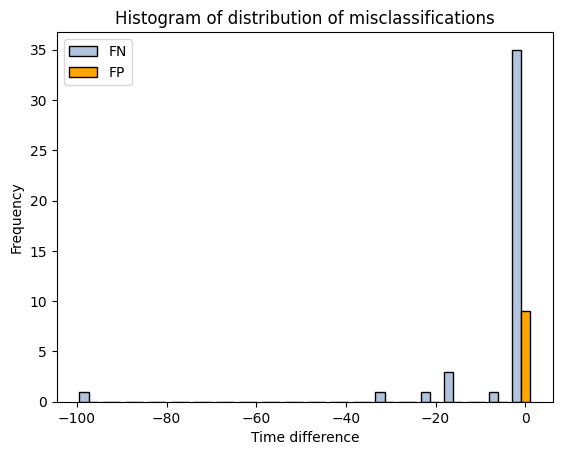

In [85]:
diff_0 = misclass[misclass['pred label'] == 0]['diff rewr-orig']
diff_1 = misclass[misclass['pred label'] == 1]['diff rewr-orig']

# Plotting the histogram
plt.hist([diff_0, diff_1], bins=20, edgecolor='black', color=['lightsteelblue', 'orange'], label=['FN', 'FP'])

# Adding labels and title
plt.xlabel('Time difference')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of misclassifications')
plt.legend(title='')

# Show the plot
plt.show()

In [63]:
bad_misclass = misclass[misclass["pred label"] == 1]
bad_misclass

pred label  true label  bench                query orig/rewr(mean)  \
283            1           0  STATS        022-125-augF1            orig   
1268           1           0  STATS  104-088-augF2-augA1            orig   
1708           1           0  STATS  135-136-augF1-augA3            orig   
1517           1           0  STATS  123-047-augF1-augA1            orig   
1819           1           0  STATS  142-135-augF1-augA3            orig   
290            1           0  STATS  022-125-augF2-augA3            orig   
878            1           0  STATS  072-099-augF2-augA2            orig   
114            1           0  STATS  009-033-augF2-augA1            orig   
1141           1           0  STATS        093-075-augF1            orig   

     orig/rewr+rewr(mean)  orig mean  rewr mean  rewr mean+rewr  \
283                  orig   0.061691   0.122308        1.076514   
1268                 orig   0.112108   0.125313        1.123516   
1708                 orig   0.014632   0.208155        2.460560   
1517                 orig   0.029132   0.081692        1.932292   
1819                 orig   0.043625   0.123188        2.165461   
290                  orig   0.061219   0.091105        1.124679   
878                  orig   0.073269   0.085117        1.912840   
114                  orig   0.040089   0.078045        2.169192   
1141                 orig   0.056881   0.227816        2.147323   

      diff rewr-orig  ...  q75(branching factors)  balancedness factor  \
283         0.060617  ...                    1.75                  1.0   
1268        0.013204  ...                    1.00                  NaN   
1708        0.193523  ...                    2.50                  1.0   
1517        0.052560  ...                    2.50                  1.0   
1819        0.079563  ...                    4.00                  1.0   
290         0.029886  ...                    1.75                  1.0   
878         0.011849  ...                    1.75                  1.0   
114         0.037955  ...                    1.75                  1.0   
1141        0.170935  ...                    3.25                  1.0   

                                  container counts list  \
283   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1268               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
1708  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1517  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1819  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
290   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
878   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
114   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1141  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

      branching factors list                     hypergraph  \
283                   [2, 1]  Hypergraph(num_v=20, num_e=4)   
1268                  [1, 1]  Hypergraph(num_v=14, num_e=3)   
1708                  [3, 1]  Hypergraph(num_v=29, num_e=5)   
1517                  [3, 1]  Hypergraph(num_v=32, num_e=5)   
1819                     [4]  Hypergraph(num_v=29, num_e=5)   
290                   [2, 1]  Hypergraph(num_v=20, num_e=4)   
878                   [2, 1]  Hypergraph(num_v=27, num_e=4)   
114                   [2, 1]  Hypergraph(num_v=22, num_e=4)   
1141                  [4, 1]  Hypergraph(num_v=35, num_e=6)   

                                                   text  orig/rewr/equal 0.5  \
283   SELECT MIN(ph.Id) FROM postHistory as ph, vote...                equal   
1268  SELECT MIN(b.id) FROM comments as c, badges as...                equal   
1708  SELECT MIN(b.id) FROM comments as c, posts as ...                equal   
1517  SELECT MIN(p.id) FROM comments as c, posts as ...                equal   
1819  SELECT MIN(b.id) FROM comments as c, posts as ...                equal   
290   SELECT MIN(b.id) FROM postHistory as ph, votes...                equal   
878   SELECT MIN(v.id) FROM comments as c, posts as

In [86]:
bins = [0, 0.01, 0.1, 1, 10, 100, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']

misclass_1 = misclass[misclass["pred label"] == 1]
misclass_0 = misclass[misclass["pred label"] == 0]

misclass_1["cut"] = pd.cut(abs(misclass_1['diff rewr-orig']), bins=bins, labels=labels)
misclass_0["cut"] = pd.cut(abs(misclass_0['diff rewr-orig']), bins=bins, labels=labels)

table_1 = misclass_1.groupby('cut').size().reset_index(name='count_1')
table_0 = misclass_0.groupby('cut').size().reset_index(name='count_0')

table = pd.merge(table_1, table_0, on='cut', how='outer')
table = table.set_index('cut').T
table.index = ['TP', 'TN']
table

/tmp/ipykernel_342/241884605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclass_1["cut"] = pd.cut(abs(misclass_1['diff rewr-orig']), bins=bins, labels=labels)
/tmp/ipykernel_342/241884605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclass_0["cut"] = pd.cut(abs(misclass_0['diff rewr-orig']), bins=bins, labels=labels)
/tmp/ipykernel_342/241884605.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

cut  0.01  0.1   1  10  100  TO
TP      0    7   2   0    0   0
TN      6   14  13   3    6   0

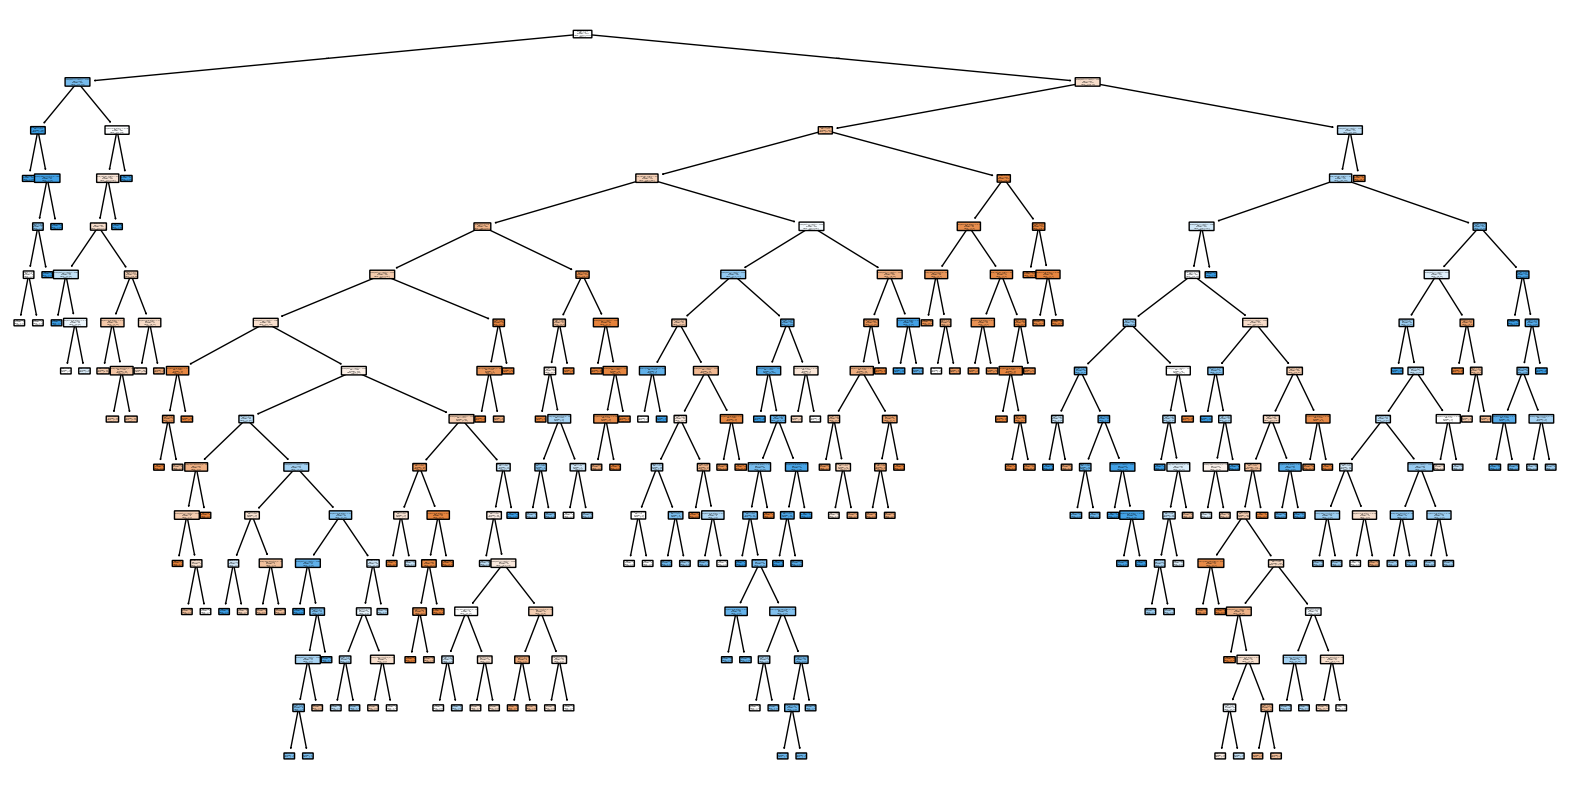

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Customize the size as needed
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0","1"], rounded=True)
plt.show()


In [87]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [90]:
from sklearn.tree import export_text

# Export the tree in textual format
tree_text = export_text(clf, feature_names=X_train.columns)
print(tree_text)


|--- #filters <= 0.50
|   |--- mean(container counts) <= 1.25
|   |   |--- #conditions <= 8.50
|   |   |   |--- class: 1
|   |   |--- #conditions >  8.50
|   |   |   |--- mean(branching factors) <= 1.64
|   |   |   |   |--- depth <= 5.50
|   |   |   |   |   |--- depth <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- depth >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- depth >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- mean(branching factors) >  1.64
|   |   |   |   |--- class: 1
|   |--- mean(container counts) >  1.25
|   |   |--- q75(branching factors) <= 2.62
|   |   |   |--- max(container counts) <= 3.50
|   |   |   |   |--- #joins <= 5.50
|   |   |   |   |   |--- mean(container counts) <= 1.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mean(container counts) >  1.35
|   |   |   |   |   |   |--- q25(branching factors) <= 1.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- q25(branchin

In [98]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree_reg = model.predict(X_val)
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree_reg)
print(mse)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_dec_tree_reg)
print(mae)
r2 = r2_score(y1_diff_log_val, y1_pred_dec_tree_reg)
print(r2)

0.5809370226957652
0.45284540705959314
0.7884991534192294


In [113]:
y1_pred_dec_tree_class = (y1_pred_dec_tree_reg < np.sign(0.1)*np.log(abs(0.1)+1)).astype(int)
accuracy = accuracy_score(y1_val, y1_pred_dec_tree_class)
print(accuracy)
recall = recall_score(y1_val, y1_pred_dec_tree_class)
print(recall)
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree_class)
conf_matrix

0.7103448275862069
0.9754601226993865


array([[ 47,  80],
       [  4, 159]])

In [103]:
int(True)

1

### Decision tree with two classes

In [42]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [43]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
accuracy

0.8241379310344827

In [44]:
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[118,   9],
       [ 42, 121]])

In [46]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                       query  \
248            0           1  STATS         019-130-augF1-augA3   
1209           0           1  STATS               098-124-augA3   
745            0           1  STATS               061-053-augA3   
1207           0           1  STATS               098-124-augA1   
1768           0           1  STATS         138-107-augF2-augA3   
283            1           0  STATS               022-125-augF1   
1277           0           1  STATS         105-085-augF2-augA1   
1268           1           0  STATS         104-088-augF2-augA1   
2463           0           1  HETIO          3-06-CdGuCtD-augA5   
805            0           1  STATS               065-012-augF2   
755            0           1  STATS         061-053-augF2-augA3   
1760           0           1  STATS               138-107-augA3   
750            0           1  STATS         061-053-augF1-augA3   
2518           0           1  HETIO          3-14-CtDpSpD-augA4   
2774           0           1  HETIO  12-02-SpDlApCcSEiPC-augA10   
620            0           1  STATS               050-106-augF1   
2770           0           1  HETIO   12-02-SpDlApCcSEiPC-augA6   
2162           0           1    JOB              2c-augF2-augA2   
780            0           1  STATS         063-109-augF1-augA3   
1708           1           0  STATS         135-136-augF1-augA3   
2771           0           1  HETIO   12-02-SpDlApCcSEiPC-augA7   
1210           0           1  STATS               098-124-augF1   
1517           1           0  STATS         123-047-augF1-augA1   
744            0           1  STATS               061-053-augA2   
2490           0           1  HETIO          3-10-CrCbGaD-augA4   
1819           1           0  STATS         142-135-augF1-augA3   
2488           0           1  HETIO          3-10-CrCbGaD-augA2   
1276           0           1  STATS               105-085-augF2   
1167           0           1  STATS               095-139-augA5   
945            0           1  STATS         076-073-augF2-augA5   
1237           0           1  STATS               101-043-augA3   
1166           0           1  STATS               095-139-augA4   
810            0           1  STATS               066-094-augA2   
1234           0           1  STATS                     101-043   
2173           0           1    JOB              2d-augF1-augA3   
691            0           1  STATS               056-007-augF2   
1741           0           1  STATS               137-141-augA5   
1028           0           1  STATS               084-044-augA1   
1231           0           1  STATS               100-005-augA1   
1213           0           1  STATS         098-124-augF1-augA3   
1030           0           1  STATS               084-044-augA3   
2554           0           1  HETIO        4-01-CbGiGiGaD-augA5   
2785           0           1  HETIO     13-02-SpDrDlArDlA-augA1   
2478           0           1  HETIO          3-08-CpDpCtD-augA6   
1055           0           1  STATS         086-083-augF2-augA1   
290            1           0  STATS         022-125-augF2-augA3   
878            1           0  STATS         072-099-augF2-augA2   
936            0           1  STATS         076-073-augF1-augA2   
721            0           1  STATS         059-061-augF1-augA3   
114            1           0  STATS         009-033-augF2-augA1   
1141           1           0  STATS               093-075-augF1   

     orig/rewr(mean) orig/rewr+rewr(mean)   orig mean  rewr mean  \
248             rewr                 orig    0.090949   0.081371   
1209            rewr                 orig    0.482762   0.238782   
745             rewr                 orig    0.220134   0.158449   
1207            rewr                 orig    0.470823   0.320942   
1768            rewr                 rewr    3.133107   0.069782   
283             orig                 orig    0.061691   0.122308   
1277            rewr                 orig    

Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1056 and 904, where the differences of the running times are minimal.

### Decision tree with three classes

##### equal cut off: 0.5

In [48]:
y1_equal_05_val.value_counts()

orig/rewr/equal 0.5
 0    169
 1     96
-1     25
Name: count, dtype: int64

In [52]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_val)

In [53]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_dec_tree)
accuracy

0.8620689655172413

In [54]:
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_dec_tree)
conf_matrix

array([[ 21,   4,   0],
       [  4, 151,  14],
       [  0,  18,  78]])

In [55]:
indices_not_equal = np.where(y1_equal_05_val != y1_equal_05_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_05_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_05_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_05_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                       query  \
2161          -1           0    JOB              2c-augF2-augA1   
1768           0           1  STATS         138-107-augF2-augA3   
283            1           0  STATS               022-125-augF1   
1422           0           1  STATS         116-032-augF1-augA3   
2395          -1           0   LSQB                    q4-augA1   
1760           0           1  STATS               138-107-augA3   
1653           1           0  STATS         131-143-augF1-augA6   
2774           0           1  HETIO  12-02-SpDlApCcSEiPC-augA10   
2933           1           0  HETIO      16-03-SpDtCuGrGe-augA8   
1429           0           1  STATS               117-114-augA2   
2770           0           1  HETIO   12-02-SpDlApCcSEiPC-augA6   
1708           1           0  STATS         135-136-augF1-augA3   
2771           0           1  HETIO   12-02-SpDlApCcSEiPC-augA7   
1433           0           1  STATS         117-114-augF1-augA2   
1517           1           0  STATS         123-047-augF1-augA1   
2210           0          -1    JOB              3c-augF1-augA2   
2140           0           1    JOB                    2b-augF1   
1819           1           0  STATS         142-135-augF1-augA3   
2488           0           1  HETIO          3-10-CrCbGaD-augA2   
1394           0           1  STATS         114-049-augF2-augA2   
2659          -1           0  HETIO         9-02-DdGrGpMF-augA4   
1226           0           1  STATS               099-031-augF2   
1133           1           0  STATS         092-103-augF2-augA2   
1237           0           1  STATS               101-043-augA3   
2709           0          -1  HETIO         9-09-DaGcGpMF-augA5   
1234           0           1  STATS                     101-043   
788            1           0  STATS               064-116-augA1   
1741           0           1  STATS               137-141-augA5   
2208           0          -1    JOB                    3c-augF1   
1149           1           0  STATS         093-075-augF2-augA2   
1231           0           1  STATS               100-005-augA1   
1410           1           0  STATS         115-144-augF2-augA1   
2785           0           1  HETIO     13-02-SpDrDlArDlA-augA1   
2682          -1           0  HETIO         9-05-DdGiGpMF-augA6   
290            1           0  STATS         022-125-augF2-augA3   
2660           0          -1  HETIO         9-02-DdGrGpMF-augA5   
1291           0           1  STATS               107-104-augA3   
1141           1           0  STATS               093-075-augF1   
1554           1           0  STATS               125-051-augF2   
2431           1           0  HETIO          3-02-CbGeAlD-augA1   

     orig/rewr(mean) orig/rewr+rewr(mean)   orig mean  rewr mean  \
2161            orig                 orig    0.001469   2.127725   
1768            rewr                 rewr    3.133107   0.069782   
283             orig                 orig    0.061691   0.122308   
1422            rewr                 orig    1.227556   0.260338   
2395            rewr                 rewr  100.000000   7.204414   
1760            rewr                 rewr   31.800800   0.101239   
1653            rewr                 orig    0.356232   0.238157   
2774            rewr                 rewr   16.407725   0.151789   
2933            rewr                 rewr  100.000000   0.837304   
1429            rewr                 orig    1.176054   0.176692   
2770            rewr                 rewr   14.383984   0.153336   
1708            orig                 orig    0.014632   0.208155   
2771            rewr                 rewr   14.269635   0.155382   
1433            rewr                 rewr   13.220535   0.173252   
1517            orig                 orig    0.029132   0.081692   
2210            orig                 orig    0.317585   1.823294   
2140            orig                 orig    0.001484   0.238398   
1819            orig              

##### equal cut off: 0.1

In [56]:
y1_equal_01_val.value_counts()

orig/rewr/equal 0.1
 1    134
 0     97
-1     59
Name: count, dtype: int64

In [59]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_val)

In [60]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_dec_tree)
accuracy

0.7758620689655172

In [61]:
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_dec_tree)
conf_matrix

array([[ 43,  14,   2],
       [ 13,  73,  11],
       [  5,  20, 109]])

In [62]:
indices_not_equal = np.where(y1_equal_01_val != y1_equal_01_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_01_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_01_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_01_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                      query  \
2161          -1           0    JOB             2c-augF2-augA1   
248           -1           0  STATS        019-130-augF1-augA3   
1209           0           1  STATS              098-124-augA3   
2624          -1           0  HETIO  7-01-DaGiGpBP-augF2-augA4   
190            0          -1  STATS              015-026-augA1   
...          ...         ...    ...                        ...   
701            1           0  STATS        057-087-augF2-augA1   
114            1           0  STATS        009-033-augF2-augA1   
2700           0          -1  HETIO        9-08-DdGcGpMF-augA3   
2702           0          -1  HETIO        9-08-DdGcGpMF-augA5   
1141           1          -1  STATS              093-075-augF1   

     orig/rewr(mean) orig/rewr+rewr(mean)  orig mean  rewr mean  \
2161            orig                 orig   0.001469   2.127725   
248             rewr                 orig   0.090949   0.081371   
1209            rewr                 orig   0.482762   0.238782   
2624            orig                 orig   0.105651   0.118511   
190             orig                 orig   0.050904   0.157419   
...              ...                  ...        ...        ...   
701             rewr                 orig   0.060493   0.052510   
114             orig                 orig   0.040089   0.078045   
2700            orig                 orig   0.238391   0.516807   
2702            orig                 orig   0.239682   0.486422   
1141            orig                 orig   0.056881   0.227816   

      rewr mean+rewr  diff rewr-orig  ...  q75(branching factors)  \
2161        4.195069        2.126256  ...                    1.50   
248         2.019172       -0.009578  ...                    2.50   
1209        1.329425       -0.243980  ...                    3.00   
2624        2.200363        0.012860  ...                    2.50   
190         2.156281        0.106515  ...                    3.00   
...              ...             ...  ...                     ...   
701         1.961848       -0.007984  ...                    1.00   
114         2.169192        0.037955  ...                    1.75   
2700        2.482018        0.278415  ...                    2.50   
2702        2.444381        0.246740  ...                    2.50   
1141        2.147323        0.170935  ...                    3.25   

      balancedness factor                              container counts list  \
2161             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
248              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1209             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2624             0.666667                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]   
190              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                   ...                                                ...   
701                   NaN               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
114              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2700             1.000000                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]   
2702             1.000000                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]   
1141             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

      branching factors list                     hypergraph  \
2161               [2, 1, 1]  Hypergraph(num_v=30, num_e=5)   
248                   [3, 1]  Hypergraph(num_v=31, num_e=5)   
1209                     [3]  Hypergraph(num_v=20, num_e=4)   
2624               [1, 2, 3]  Hypergraph(num_v=14, num_e=7)   
190                      [3]  Hypergraph(num_v=26, num_e=4)   
...                      ...                            ...   
701                   [1, 1]  Hypergraph(num_v=14, num_e=3)   
114                   [2, 1]  Hypergraph(num_v=22, num_e=4)   
2700               [1, 1, 4]  Hypergraph(num_v=14, 

##### equal cut off: 0.05

In [63]:
y1_equal_005_val.value_counts()

orig/rewr/equal 0.05
 1    141
-1     93
 0     56
Name: count, dtype: int64

In [64]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [65]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
accuracy

0.7344827586206897

In [66]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

array([[ 80,   5,   8],
       [ 22,  21,  13],
       [ 17,  12, 112]])

In [67]:
indices_not_equal = np.where(y1_equal_005_val != y1_equal_005_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_005_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_005_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_005_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                      query  \
2161          -1           0    JOB             2c-augF2-augA1   
248           -1           0  STATS        019-130-augF1-augA3   
1209           0           1  STATS              098-124-augA3   
2624          -1           0  HETIO  7-01-DaGiGpBP-augF2-augA4   
1239           0          -1  STATS        101-043-augF1-augA1   
...          ...         ...    ...                        ...   
701            1           0  STATS        057-087-augF2-augA1   
721           -1           0  STATS        059-061-augF1-augA3   
114            1           0  STATS        009-033-augF2-augA1   
761           -1           0  STATS              062-129-augA4   
1141           1          -1  STATS              093-075-augF1   

     orig/rewr(mean) orig/rewr+rewr(mean)  orig mean  rewr mean  \
2161            orig                 orig   0.001469   2.127725   
248             rewr                 orig   0.090949   0.081371   
1209            rewr                 orig   0.482762   0.238782   
2624            orig                 orig   0.105651   0.118511   
1239            orig                 orig   0.051325   0.132076   
...              ...                  ...        ...        ...   
701             rewr                 orig   0.060493   0.052510   
721             rewr                 orig   0.121090   0.115758   
114             orig                 orig   0.040089   0.078045   
761             orig                 orig   0.161676   0.196838   
1141            orig                 orig   0.056881   0.227816   

      rewr mean+rewr  diff rewr-orig  ...  q75(branching factors)  \
2161        4.195069        2.126256  ...                    1.50   
248         2.019172       -0.009578  ...                    2.50   
1209        1.329425       -0.243980  ...                    3.00   
2624        2.200363        0.012860  ...                    2.50   
1239        1.976066        0.080752  ...                    1.75   
...              ...             ...  ...                     ...   
701         1.961848       -0.007984  ...                    1.00   
721         2.319084       -0.005332  ...                    3.25   
114         2.169192        0.037955  ...                    1.75   
761         2.105134        0.035162  ...                    2.50   
1141        2.147323        0.170935  ...                    3.25   

      balancedness factor                              container counts list  \
2161             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
248              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1209             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2624             0.666667                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]   
1239             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                   ...                                                ...   
701                   NaN               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
721              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
114              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
761              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1141             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

      branching factors list                     hypergraph  \
2161               [2, 1, 1]  Hypergraph(num_v=30, num_e=5)   
248                   [3, 1]  Hypergraph(num_v=31, num_e=5)   
1209                     [3]  Hypergraph(num_v=20, num_e=4)   
2624               [1, 2, 3]  Hypergraph(num_v=14, num_e=7)   
1239                  [2, 1]  Hypergraph(num_v=24, num_e=4)   
...                      ...                            ...   
701                   [1, 1]  Hypergraph(num_v=14, num_e=3)   
721                   [4, 1]  Hypergraph(num_v=35, num_e=6)   
114                   [2, 1]  Hypergraph(num_v=22, 

Here -1 = orig, 0 = equal and 1 = rewr. We do not want to predict 1 and true = -1. This is never the case.
Since we would also assign equal as orig later, we do not want predict = 0 and true = -1. This is the case for two times, but both in the same order of magnitude.

##### equal cut off: 0.01

In [68]:
y1_equal_001_val.value_counts()

orig/rewr/equal 0.01
 1    152
-1    119
 0     19
Name: count, dtype: int64

In [69]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [70]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
accuracy

0.7620689655172413

In [71]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

array([[107,   2,  10],
       [ 15,   0,   4],
       [ 36,   2, 114]])

In [72]:
indices_not_equal = np.where(y1_equal_001_val != y1_equal_001_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_001_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_001_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_001_pred_dec_tree[indices_not_equal])
misclass

pred label  true label  bench                      query  \
248           -1           0  STATS        019-130-augF1-augA3   
1209          -1           1  STATS              098-124-augA3   
2624          -1           0  HETIO  7-01-DaGiGpBP-augF2-augA4   
745           -1           1  STATS              061-053-augA3   
21            -1           0  STATS        002-048-augF2-augA2   
...          ...         ...    ...                        ...   
701            1           0  STATS        057-087-augF2-augA1   
936           -1           0  STATS        076-073-augF1-augA2   
721           -1           0  STATS        059-061-augF1-augA3   
114            1          -1  STATS        009-033-augF2-augA1   
1141           1          -1  STATS              093-075-augF1   

     orig/rewr(mean) orig/rewr+rewr(mean)  orig mean  rewr mean  \
248             rewr                 orig   0.090949   0.081371   
1209            rewr                 orig   0.482762   0.238782   
2624            orig                 orig   0.105651   0.118511   
745             rewr                 orig   0.220134   0.158449   
21              orig                 orig   0.061888   0.071198   
...              ...                  ...        ...        ...   
701             rewr                 orig   0.060493   0.052510   
936             rewr                 orig   0.324675   0.314977   
721             rewr                 orig   0.121090   0.115758   
114             orig                 orig   0.040089   0.078045   
1141            orig                 orig   0.056881   0.227816   

      rewr mean+rewr  diff rewr-orig  ...  q75(branching factors)  \
248         2.019172       -0.009578  ...                    2.50   
1209        1.329425       -0.243980  ...                    3.00   
2624        2.200363        0.012860  ...                    2.50   
745         2.361368       -0.061686  ...                    4.00   
21          1.884400        0.009310  ...                    2.50   
...              ...             ...  ...                     ...   
701         1.961848       -0.007984  ...                    1.00   
936         2.207094       -0.009698  ...                    3.25   
721         2.319084       -0.005332  ...                    3.25   
114         2.169192        0.037955  ...                    1.75   
1141        2.147323        0.170935  ...                    3.25   

      balancedness factor                              container counts list  \
248              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1209             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2624             0.666667                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]   
745              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
21               1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                   ...                                                ...   
701                   NaN               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]   
936              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
721              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
114              1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1141             1.000000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

      branching factors list                     hypergraph  \
248                   [3, 1]  Hypergraph(num_v=31, num_e=5)   
1209                     [3]  Hypergraph(num_v=20, num_e=4)   
2624               [1, 2, 3]  Hypergraph(num_v=14, num_e=7)   
745                      [4]  Hypergraph(num_v=29, num_e=5)   
21                    [3, 1]  Hypergraph(num_v=25, num_e=5)   
...                      ...                            ...   
701                   [1, 1]  Hypergraph(num_v=14, num_e=3)   
936                   [4, 1]  Hypergraph(num_v=34, num_e=6)   
721                   [4, 1]  Hypergraph(num_v=35, 

### Decision tree with time difference

In [73]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [74]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mse

0.5809370226957652

In [75]:
y1_decision = (y1_pred_dec_tree < 0).astype(int)

In [76]:
accuracy = accuracy_score(y1_val, y1_decision)
accuracy

0.8344827586206897

In [77]:
conf_matrix = confusion_matrix(y1_val, y1_decision)
conf_matrix

array([[ 90,  37],
       [ 11, 152]])

In [78]:
indices_not_equal = np.where(y1_val != y1_decision)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_decision[indices_not_equal])
misclass

pred label  true label  bench                query orig/rewr(mean)  \
2752           1           0  HETIO  11-03-SpDlAdG-augA6            rewr   
248            0           1  STATS  019-130-augF1-augA3            rewr   
944            1           0  STATS  076-073-augF2-augA4            orig   
1239           1           0  STATS  101-043-augF1-augA1            orig   
2698           1           0  HETIO  9-08-DdGcGpMF-augA1            orig   
2725           1           0  HETIO       10-03-SpDaGpPW            rewr   
283            1           0  STATS        022-125-augF1            orig   
1268           1           0  STATS  104-088-augF2-augA1            orig   
0              1           0  STATS              001-014            orig   
805            0           1  STATS        065-012-augF2            rewr   
1217           1           0  STATS  098-124-augF2-augA3            orig   
2458           1           0  HETIO         3-06-CdGuCtD            orig   
1179           1           0  STATS  095-139-augF2-augA5            orig   
2162           0           1    JOB       2c-augF2-augA2            orig   
780            0           1  STATS  063-109-augF1-augA3            rewr   
2578           1           0  HETIO     5-01-DaGaD-augA2            orig   
1708           1           0  STATS  135-136-augF1-augA3            orig   
1756           1           0  STATS  137-141-augF2-augA6            orig   
703            0           1  STATS              058-010            rewr   
1517           1           0  STATS  123-047-augF1-augA1            orig   
1215           1           0  STATS  098-124-augF2-augA1            orig   
1819           1           0  STATS  142-135-augF1-augA3            orig   
285            1           0  STATS  022-125-augF1-augA2            orig   
273            1           0  STATS  021-036-augF1-augA2            orig   
348            1           0  STATS        028-062-augA5            orig   
2689           1           0  HETIO  9-06-DaGiGpMF-augA6            rewr   
2718           1           0  HETIO       10-02-SpDuGpPW            orig   
2511           1           0  HETIO   3-13-CtDlAlD-augA4            rewr   
1109           1           0  STATS  090-079-augF2-augA4            orig   
2710           1           0  HETIO  9-09-DaGcGpMF-augA6            orig   
2734           1           0  HETIO  11-01-SpDlAeG-augA2            rewr   
2709           1           0  HETIO  9-09-DaGcGpMF-augA5            orig   
810            0           1  STATS        066-094-augA2            rewr   
2173           0           1    JOB       2d-augF1-augA3            orig   
691            0           1  STATS        056-007-augF2            rewr   
2732           1           0  HETIO        11-01-SpDlAeG            rewr   
1055           0           1  STATS  086-083-augF2-augA1            rewr   
1180           1           0  STATS              096-095            orig   
353            1           0  STATS  028-062-augF1-augA4            orig   
2425           1           0  HETIO   3-01-CbGbCtD-augA2            rewr   
290            1           0  STATS  022-125-augF2-augA3            orig   
878            1           0  STATS  072-099-augF2-augA2            orig   
934            0           1  STATS        076-073-augF1            rewr   
721            0           1  STATS  059-061-augF1-augA3            rewr   
114            1           0  STATS  009-033-augF2-augA1            orig   
2700           1           0  HETIO  9-08-DdGcGpMF-augA3            orig   
2702           1           0  HETIO  9-08-DdGcGpMF-augA5            orig   
1141           1           0  STATS        093-075-augF1            orig   

     orig/rewr+rewr(mean)  orig mean  rewr mean  rewr mean+rewr  \
2752                 rewr   4.352710   0.192523        2.282980   
248                  orig   0.090949   0.081371        2.019172   
944                  orig   0.208820   0.230911        2.175654   
1239         

Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1268, 944, 1056 and 904, where the differences of the running times are minimal.

## Statistical tests

We are testing the difference between the maximum, mean, median and standard deviation of the runtimes with the original version and the decision version.